In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import random

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

not here


In [2]:
grid_data_file = os.path.join(os.getcwd().split('data')[0], 'bi.pickle')
print(grid_data_file)
with open(grid_data_file,'rb') as f:
    load_array= pickle.load(f)
exc = load_array[0]
inh = load_array[1]
print(len(exc))

/home/lena/Promotion/neurolib/GUI/current/gui/bi.pickle
147


In [3]:
aln = ALNModel()
N = aln.params.N

data.set_parameters(aln)

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
##############################################################               
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [4]:
dur = 500.
t_pen = 0.96

In [5]:
file_ = '2_EI.pickle'
c_var = [0,1]
folder = str(os.getcwd().split('data_2')[1])
print(folder)
case = str(folder[1])

/2


In [6]:
dur_pre = 10
dur_post = 10

n_pre = int(np.around(dur_pre/aln.params.dt + 1.,1))
n_post = int(np.around(dur_post/aln.params.dt + 1.,1))

tol = 1e-10
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

p_var = [0]

wp = 1. / (dur - t_pen * dur)

if case in ['1', '2']:    # low to high
    max_I = [3., -3.]
else:
    max_I = [-3., 3.]
    
if case in ['1', '3']:    # sparsity
    factor_ws = 1.
    factor_we = 0.
else:
    factor_ws = 0.
    factor_we = 1.
    
ind_cost = 2
if case in ['2', '4']:
    ind_cost = 1
    
maxC = [5., -5., 0.18, 0.]
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

In [7]:
bestControl_ = [None] * len(exc) 
bestState_ = [None] * len(exc) 
cost_ = [None] * len(exc) 
costnode_ = [None] * len(exc) 
weights_ = [None] * len(exc) 

if os.path.isfile(file_) :
    print("file found")
    
    with open(file_,'rb') as f:
        load_array = pickle.load(f)

    bestControl_ = load_array[0]
    bestState_ = load_array[1]
    cost_ = load_array[2]
    costnode_ = load_array[3]
    weights_ = load_array[4]

file found


In [8]:
initVars = [None] * len(exc)
target = [None] * len(exc)
cost_uncontrolled = [None] * len(exc)

In [9]:
# get initial parameters and target states

i_range = range(0,83,1)

data.set_parameters(aln)

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    aln.params.duration = 3000.
    
    control0 = aln.getZeroControl()
    control0 = functions.step_control(aln, maxI_ = max_I[0])

    aln.run(control=control0)
    
    target_rates = np.zeros((2))
    target_rates[0] = aln.rates_exc[0,-1] 
    target_rates[1] = aln.rates_inh[0,-1]

    control0 = functions.step_control(aln, maxI_ = max_I[1])
    aln.run(control=control0)

    init_state_vars = np.zeros(( len(state_vars) ))
    for j in range(len(state_vars)):
        if aln.state[state_vars[j]].size == 1:
            init_state_vars[j] = aln.state[state_vars[j]][0]
        else:
            init_state_vars[j] = aln.state[state_vars[j]][0,-1]

    initVars[i] = init_state_vars
    target[i] = [target_rates[0], target_rates[1]]

-------  0 0.4000000000000001 0.3500000000000001
-------  1 0.4250000000000001 0.3500000000000001
-------  2 0.4000000000000001 0.3750000000000001
-------  3 0.4250000000000001 0.3750000000000001
-------  4 0.4500000000000001 0.3750000000000001
-------  5 0.4000000000000001 0.40000000000000013
-------  6 0.4250000000000001 0.40000000000000013
-------  7 0.4500000000000001 0.40000000000000013
-------  8 0.47500000000000014 0.40000000000000013
-------  9 0.4000000000000001 0.42500000000000016
-------  10 0.4250000000000001 0.42500000000000016
-------  11 0.4500000000000001 0.42500000000000016
-------  12 0.47500000000000014 0.42500000000000016
-------  13 0.4000000000000001 0.4500000000000002
-------  14 0.4250000000000001 0.4500000000000002
-------  15 0.4500000000000001 0.4500000000000002
-------  16 0.47500000000000014 0.4500000000000002
-------  17 0.5000000000000002 0.4500000000000002
-------  18 0.4000000000000001 0.4750000000000002
-------  19 0.4250000000000001 0.4750000000000002

In [10]:
# get uncontrolled cost
data.set_parameters(aln)

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    aln.params.duration = dur
    
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[i][0]
    target_[:,1,:] = target[i][1]
            
    cost.setParams(wp, 0.0, 0.0)

    setinit(initVars[i], aln)
    control0 = aln.getZeroControl()

    cgv = None
    max_it = 0

    bestControl_init_, bestState_init_, cost_init_, runtime_init_, grad_init_, phi_init_, phi1_, costnode_init_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)
    
    cost_uncontrolled[i] = cost_init_[0]

-------  0 0.4000000000000001 0.3500000000000001
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  295.1203239619291
RUN  0 , total integrated cost =  295.1203239619291
Gradient descend method:  None
RUN  0 , total integrated cost =  295.1203239619291
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  1 0.4250000000000001 0.3500000000000001
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  490.81359439844215
RUN  0 , total integrated cost =  490.81359439844215
Gradient descend method:  None
RUN  0 , total integrated cost =  490.81359439844215
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  2 0.4000000000000001 0.3750000000000001
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  276.9353881083755
RUN  0 , total integrated cost =  276.9353881083755
Gradient descend method:  None
RUN  0 , total integrated cost =  276.9353881083755
Improved

RUN  0 , total integrated cost =  840.486503578103
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  28 0.5000000000000002 0.5000000000000002
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  1065.654639098131
RUN  0 , total integrated cost =  1065.654639098131
Gradient descend method:  None
RUN  0 , total integrated cost =  1065.654639098131
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  29 0.5250000000000001 0.5000000000000002
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  1299.2487134596593
RUN  0 , total integrated cost =  1299.2487134596593
Gradient descend method:  None
RUN  0 , total integrated cost =  1299.2487134596593
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  30 0.4250000000000001 0.5250000000000002
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  398.9158590893028
RUN  0 , total integrated

-------  60 0.5500000000000003 0.6250000000000003
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  1489.7819922684603
RUN  0 , total integrated cost =  1489.7819922684603
Gradient descend method:  None
RUN  0 , total integrated cost =  1489.7819922684603
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  61 0.5750000000000002 0.6250000000000003
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  1741.7404678036398
RUN  0 , total integrated cost =  1741.7404678036398
Gradient descend method:  None
RUN  0 , total integrated cost =  1741.7404678036398
Improved over  0  iterations in  0.0  seconds by  0.0  percent.
-------  62 0.4250000000000001 0.6500000000000004
set cost params:  0.05 0.0 0.0
interpolate adjoint :  True True True
initial cost =  346.3084589538196
RUN  0 , total integrated cost =  346.3084589538196
Gradient descend method:  None
RUN  0 , total integrated cost =  346.3084589538196
Im

-------  0 0.4000000000000001 0.3500000000000001
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  309.8386676965948
Control only changes marginally.
RUN  1 , total integrated cost =  309.8386676965948
Improved over  1  iterations in  1.0729422270087525  seconds by  0.0  percent.


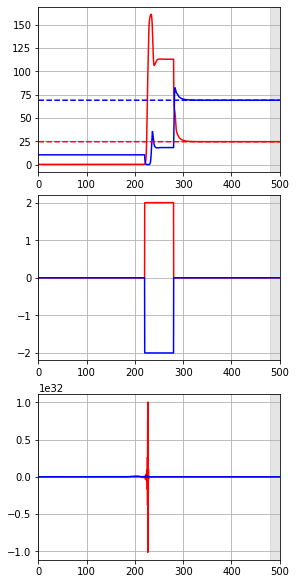

uncontrolled cost :  295.1203239619291
cost splitting :  9.785531520490149e-18 [120. 120.]
-------  1 0.4250000000000001 0.3500000000000001
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  9.838667696594726
RUN  2 , total integrated cost =  8.178511446594767
RUN  3 , total integrated cost =  8.099165743469758
RUN  4 , total integrated cost =  8.097258394837064
RUN  5 , total integrated cost =  8.097111175923208
RUN  6 , total integrated cost =  8.097104990796389
RUN  7 , total integrated cost =  8.09709190699592
RUN  8 , total integrated cost =  8.097086729245197
RUN  9 , total integrated cost =  8.097070440294887
RUN  10 , total integrated cost =  8.097064453303732
RUN  10 , total integrated cost =  8.097064453303732
Improved over  10  iterations in  2.553811636986211  seconds by  97.38668368493222  percent.


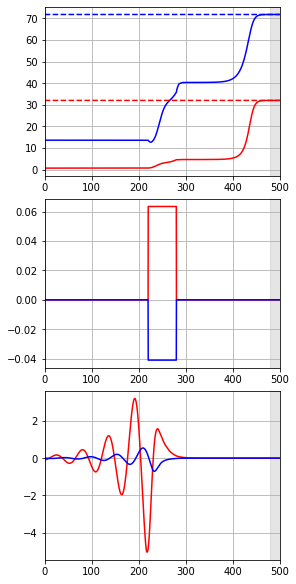

uncontrolled cost :  490.81359439844215
cost splitting :  1.0139547886427259e-05 [0.12099923 0.05048984]
-------  2 0.4000000000000001 0.3750000000000001
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  309.82912973263535
RUN  2 , total integrated cost =  309.82912973263535
Control only changes marginally.
RUN  2 , total integrated cost =  309.82912973263535
Improved over  2  iterations in  2.7414249379653484  seconds by  0.0030783646309799906  percent.


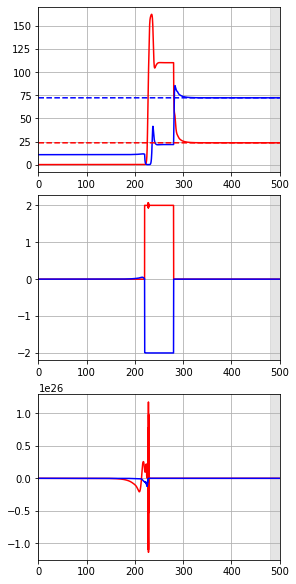

uncontrolled cost :  276.9353881083755
cost splitting :  3.910008357661312e-15 [119.99759969 119.98762449]
-------  3 0.4250000000000001 0.3750000000000001
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  15.307417696594566
RUN  3 , total integrated cost =  14.867964571594563
RUN  4 , total integrated cost =  14.866343325258168
RUN  5 , total integrated cost =  14.866266301157935
RUN  6 , total integrated cost =  14.866257021316693
RUN  7 , total integrated cost =  14.866253991825149
RUN  8 , total integrated cost =  14.866248574168976
RUN  9 , total integrated cost =  14.866246540276547
RUN  10 , total integrated cost =  14.866234373604287
RUN  10 , total integrated cost =  14.866234373604287
Improved over  10  iterations in  3.218480570940301  seconds by  95.2019

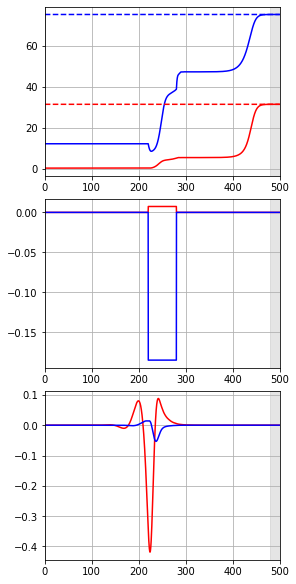

uncontrolled cost :  485.2784447710771
cost splitting :  0.00011157266744822674 [0.00163553 1.02163461]
-------  4 0.4500000000000001 0.3750000000000001
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  9.838667696594726
RUN  2 , total integrated cost =  6.518355196594741
RUN  3 , total integrated cost =  6.335249727844738
RUN  4 , total integrated cost =  6.328764742493182
RUN  5 , total integrated cost =  6.328590065769917
RUN  6 , total integrated cost =  6.328587868394724
RUN  7 , total integrated cost =  6.328581024475655
RUN  8 , total integrated cost =  6.328578073314254
RUN  9 , total integrated cost =  6.328564044669671
RUN  10 , total integrated cost =  6.328558729262833
RUN  10 , total integrated cost =  6.328558729262833
Improved over  10  iterations in  3.521897854981944  seconds by  97.9574664530058  per

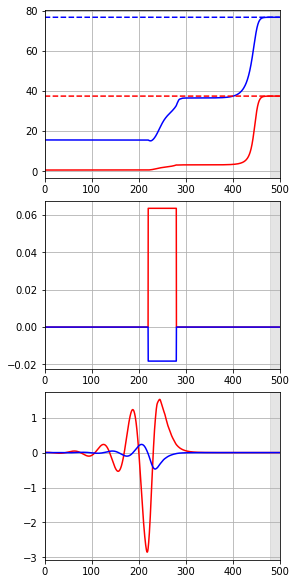

uncontrolled cost :  680.1133312665802
cost splitting :  1.5884639582199487e-05 [0.12099923 0.00992956]
-------  5 0.4000000000000001 0.40000000000000013
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965949
RUN  0 , total integrated cost =  309.8386676965949
Gradient descend method:  None
RUN  1 , total integrated cost =  309.8386676965949
Control only changes marginally.
RUN  1 , total integrated cost =  309.8386676965949
Improved over  1  iterations in  1.4361547369044274  seconds by  0.0  percent.


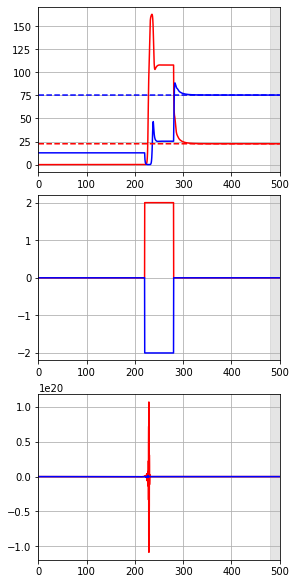

uncontrolled cost :  254.86449140999528
cost splitting :  1.1079570004197824e-12 [120. 120.]
-------  6 0.4250000000000001 0.40000000000000013
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  24.68241769659455
RUN  3 , total integrated cost =  24.648848360657084
RUN  4 , total integrated cost =  24.64779931891818
RUN  5 , total integrated cost =  24.647721974265085
RUN  6 , total integrated cost =  24.647719226617937
RUN  7 , total integrated cost =  24.567751338568737
RUN  8 , total integrated cost =  23.591185435691166
RUN  9 , total integrated cost =  23.539305533834177
RUN  10 , total integrated cost =  23.537970390628544
RUN  10 , total integrated cost =  23.537970390628544
Improved over  10  iterations in  2.689597702003084  seconds by  92.40315272279773  per

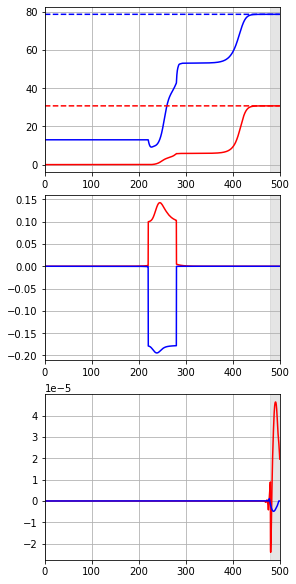

uncontrolled cost :  471.9538368446909
cost splitting :  3.297836005193626e-06 [0.43089588 1.01598183]
-------  7 0.4500000000000001 0.40000000000000013
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  14.526167696594557
RUN  3 , total integrated cost =  13.99516183721953
RUN  4 , total integrated cost =  13.994303530351903
RUN  5 , total integrated cost =  13.994289788744556
RUN  6 , total integrated cost =  13.994289788744556
Control only changes marginally.
RUN  6 , total integrated cost =  13.994289788744556
Improved over  6  iterations in  2.105918777990155  seconds by  95.48336239218267  percent.


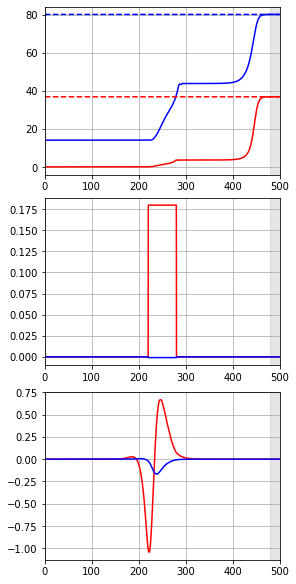

uncontrolled cost :  677.860255446574
cost splitting :  2.3189642533780106e-05 [9.69963039e-01 2.18895115e-05]
-------  8 0.47500000000000014 0.40000000000000013
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  9.838667696594726
RUN  2 , total integrated cost =  4.345503634094749
RUN  3 , total integrated cost =  4.342385876928008
RUN  4 , total integrated cost =  4.342290014949526
RUN  5 , total integrated cost =  4.167429738506909
RUN  6 , total integrated cost =  3.9232890843458845
RUN  7 , total integrated cost =  3.9191953793400027
RUN  8 , total integrated cost =  3.9191069552158053
RUN  9 , total integrated cost =  3.9191063722831108
RUN  10 , total integrated cost =  3.9191059184276384
RUN  10 , total integrated cost =  3.9191059184276384
Improved over  10  iterations in  3.7413503910647705  seconds by  98.73

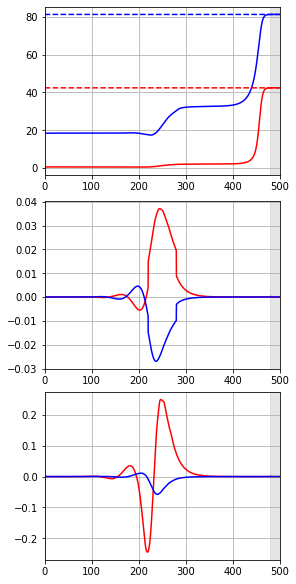

uncontrolled cost :  877.5573911507829
cost splitting :  7.195749529196504e-05 [0.0271998  0.01258856]
-------  9 0.4000000000000001 0.42500000000000016
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676966102
RUN  0 , total integrated cost =  309.8386676966102
Gradient descend method:  None
RUN  1 , total integrated cost =  309.7998278494477
RUN  2 , total integrated cost =  309.7998278494477
Control only changes marginally.
RUN  2 , total integrated cost =  309.7998278494477
Improved over  2  iterations in  2.151189361931756  seconds by  0.01253550676912596  percent.


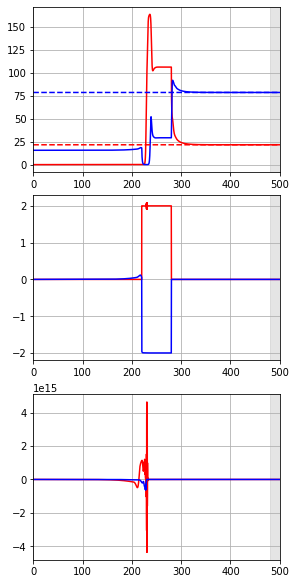

uncontrolled cost :  232.11379765972552
cost splitting :  3.070468722664188e-10 [119.99557347 119.94426261]
-------  10 0.4250000000000001 0.42500000000000016
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  47.33866769659453
RUN  2 , total integrated cost =  35.619917696594534
RUN  3 , total integrated cost =  34.88749582159461
RUN  4 , total integrated cost =  34.87071115428872
RUN  5 , total integrated cost =  34.87066501423645
RUN  6 , total integrated cost =  33.28243585079595
RUN  7 , total integrated cost =  28.98689087904599
RUN  8 , total integrated cost =  28.95779640159474
RUN  9 , total integrated cost =  28.95722459167903
RUN  10 , total integrated cost =  28.957214570693417
RUN  10 , total integrated cost =  28.957214570693417
Improved over  10  iterations in  3.568989639985375  seconds by  90.654099184

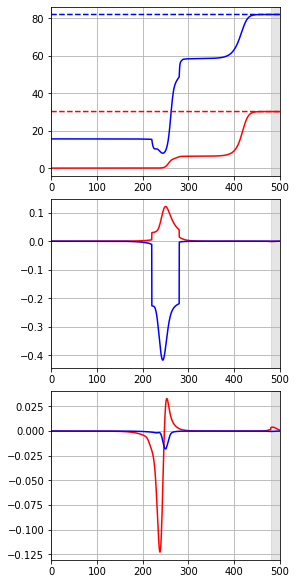

uncontrolled cost :  455.57282451055954
cost splitting :  0.022795481978592273 [0.17462804 2.65565639]
-------  11 0.4500000000000001 0.42500000000000016
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  24.68241769659455
RUN  3 , total integrated cost =  24.548140352844527
RUN  4 , total integrated cost =  24.54451639044231
RUN  5 , total integrated cost =  24.54445981010669
RUN  6 , total integrated cost =  24.54445981010669
Control only changes marginally.
RUN  6 , total integrated cost =  24.54445981010669
Improved over  6  iterations in  2.151115055079572  seconds by  92.07830965948334  percent.


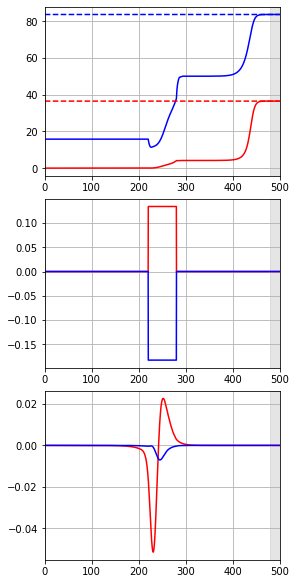

uncontrolled cost :  665.571788546768
cost splitting :  8.815397352582108e-07 [0.53956143 1.0020149 ]
-------  12 0.47500000000000014 0.42500000000000016
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  13.647261446594728
RUN  3 , total integrated cost =  13.305464571594662
RUN  4 , total integrated cost =  13.299361055969701
RUN  5 , total integrated cost =  13.299051121650573
RUN  6 , total integrated cost =  13.299048676304189
RUN  7 , total integrated cost =  13.181178899867117
RUN  8 , total integrated cost =  12.766139837361482
RUN  9 , total integrated cost =  12.76270660982232
RUN  10 , total integrated cost =  12.762647007522444
RUN  10 , total integrated cost =  12.762647007522444
Improved over  10  iterations in  3.5101510429522023  seconds by  95.880873

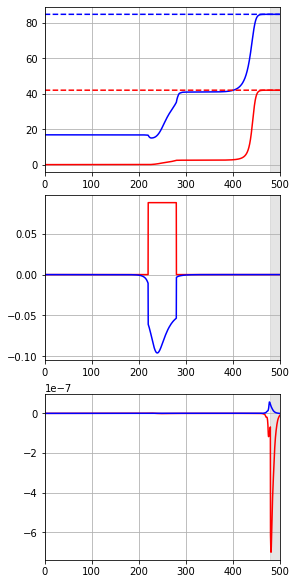

uncontrolled cost :  878.560008314686
cost splitting :  4.727855741458838e-08 [0.23280968 0.17635957]
-------  13 0.4000000000000001 0.4500000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.83866770068227
RUN  0 , total integrated cost =  309.83866770068227
Gradient descend method:  None
RUN  1 , total integrated cost =  303.93817868136296
RUN  2 , total integrated cost =  302.73803926246933
RUN  3 , total integrated cost =  302.73803926246933
Control only changes marginally.
RUN  3 , total integrated cost =  302.73803926246933
Improved over  3  iterations in  1.9089398559881374  seconds by  2.291717974036871  percent.


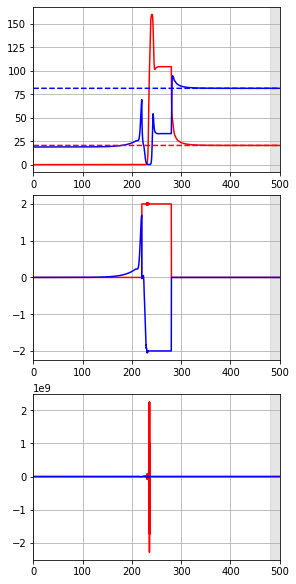

uncontrolled cost :  208.86235665930843
cost splitting :  8.174844382568232e-08 [119.99915176 109.25265771]
-------  14 0.4250000000000001 0.4500000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  309.06807394726866
RUN  2 , total integrated cost =  308.9956326758735
RUN  3 , total integrated cost =  308.9919149361327
RUN  4 , total integrated cost =  308.9908668226145
RUN  5 , total integrated cost =  308.989025466562
RUN  6 , total integrated cost =  308.98814341560694
RUN  7 , total integrated cost =  308.98814341560694
Control only changes marginally.
RUN  7 , total integrated cost =  308.98814341560694
Improved over  7  iterations in  2.955021725036204  seconds by  0.2745055313175868  percent.


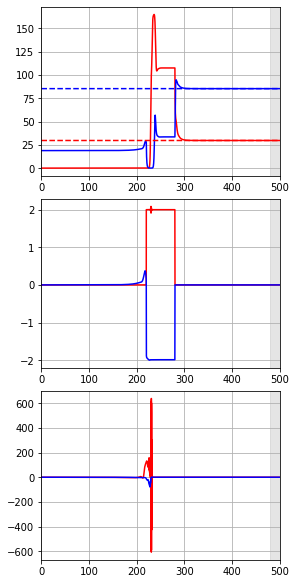

uncontrolled cost :  439.80877803490125
cost splitting :  3.211610517335777e-27 [119.99605262 118.68991618]
-------  15 0.4500000000000001 0.4500000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  47.33866769659453
RUN  2 , total integrated cost =  34.83866769659453
RUN  3 , total integrated cost =  34.594527071594484
RUN  4 , total integrated cost =  34.58842355596958
RUN  5 , total integrated cost =  34.58831627544253
RUN  6 , total integrated cost =  34.58831501654779
RUN  7 , total integrated cost =  34.58831197760617
RUN  8 , total integrated cost =  34.58831197760617
Control only changes marginally.
RUN  8 , total integrated cost =  34.58831197760617
Improved over  8  iterations in  2.7607480640290305  seconds by  88.83667031144212  percent.


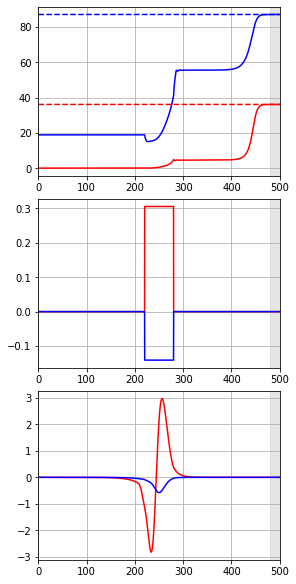

uncontrolled cost :  650.9037320173404
cost splitting :  3.639252048524607e-05 [2.80118573 0.59612072]
-------  16 0.47500000000000014 0.4500000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  23.11991769659464
RUN  3 , total integrated cost =  22.924605196594563
RUN  4 , total integrated cost =  22.915449923157077
RUN  5 , total integrated cost =  22.915139979004277
RUN  6 , total integrated cost =  22.915126712559285
RUN  7 , total integrated cost =  22.915126712559285
Control only changes marginally.
RUN  7 , total integrated cost =  22.915126712559285
Improved over  7  iterations in  2.3117147039156407  seconds by  92.60417465550213  percent.


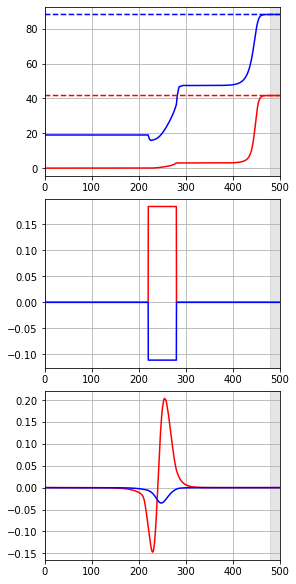

uncontrolled cost :  867.0448977562043
cost splitting :  2.8919964799185844e-06 [1.0216399  0.37159034]
-------  17 0.5000000000000002 0.4500000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  11.010542696594586
RUN  3 , total integrated cost =  10.69315988409458
RUN  4 , total integrated cost =  10.678664034485204
RUN  5 , total integrated cost =  10.678001979662069
RUN  6 , total integrated cost =  10.678000327056944
RUN  7 , total integrated cost =  10.677997814353658
RUN  8 , total integrated cost =  10.677996374059152
RUN  9 , total integrated cost =  10.67799409103687
RUN  10 , total integrated cost =  10.677992713523826
RUN  10 , total integrated cost =  10.677992713523826
Improved over  10  iterations in  2.9318958409130573  seconds by  96.5536926

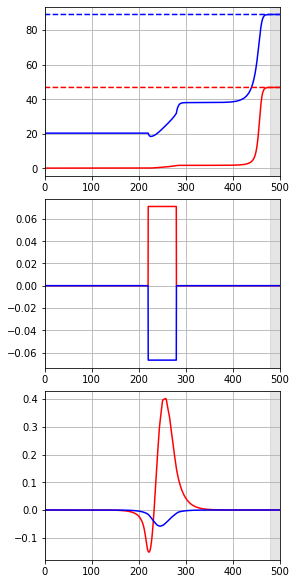

uncontrolled cost :  1088.3381695519752
cost splitting :  4.51759327468733e-05 [0.15154006 0.13378511]
-------  18 0.4000000000000001 0.4750000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.838669395846
RUN  0 , total integrated cost =  309.838669395846
Gradient descend method:  None
RUN  1 , total integrated cost =  308.3229300299943
RUN  2 , total integrated cost =  308.3229300299943
Control only changes marginally.
RUN  2 , total integrated cost =  308.3229300299943
Improved over  2  iterations in  1.1884746060241014  seconds by  0.4892027740782652  percent.


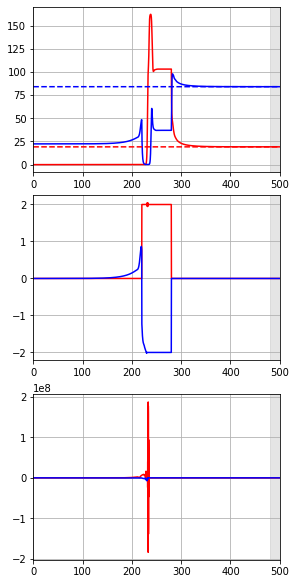

uncontrolled cost :  183.55796221510641
cost splitting :  3.398500555519359e-05 [119.99851755 117.66478196]
-------  19 0.4250000000000001 0.4750000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  62.38393298652659
RUN  2 , total integrated cost =  59.06362048652663
RUN  3 , total integrated cost =  59.0269993927798
RUN  4 , total integrated cost =  59.02619126550961
RUN  5 , total integrated cost =  59.02618605259268
RUN  6 , total integrated cost =  59.0261829220344
RUN  7 , total integrated cost =  59.02617678125909
RUN  8 , total integrated cost =  59.026173539019304
RUN  9 , total integrated cost =  59.02616789426573
RUN  10 , total integrated cost =  59.026164684341175
RUN  10 , total integrated cost =  59.026164684341175
Improved over  10  iterations in  2.4492540099890903  seconds by  80.94938726558

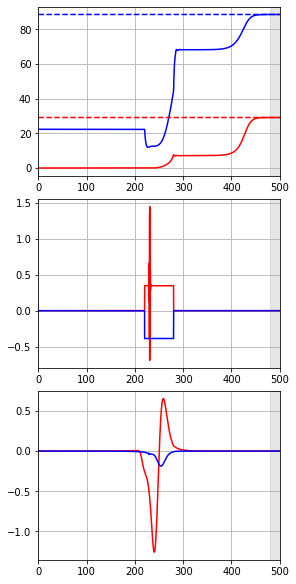

uncontrolled cost :  425.17584252715665
cost splitting :  5.185936450755524e-05 [4.23363399 4.47830373]
-------  20 0.4500000000000001 0.4750000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  47.33866769659453
RUN  2 , total integrated cost =  45.48319894659454
RUN  3 , total integrated cost =  45.4465778528445
RUN  4 , total integrated cost =  45.44576722967928
RUN  5 , total integrated cost =  45.445750151043185
RUN  6 , total integrated cost =  45.445750151043185
Control only changes marginally.
RUN  6 , total integrated cost =  45.445750151043185
Improved over  6  iterations in  1.9798146170796826  seconds by  85.33244720909228  percent.


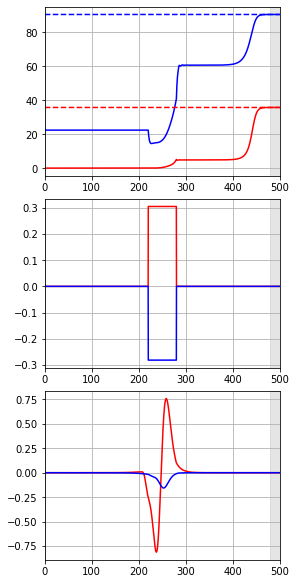

uncontrolled cost :  636.9058225135838
cost splitting :  1.6054862395565237e-05 [2.79252556 2.37904283]
-------  21 0.47500000000000014 0.4750000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  34.83866769659462
RUN  2 , total integrated cost =  33.47148019659471
RUN  3 , total integrated cost =  33.41960031378213
RUN  4 , total integrated cost =  33.41797906749952
RUN  5 , total integrated cost =  33.41797491160007
RUN  6 , total integrated cost =  33.41797491160007
Control only changes marginally.
RUN  6 , total integrated cost =  33.41797491160007
Improved over  6  iterations in  1.9787370250560343  seconds by  89.21439497528303  percent.


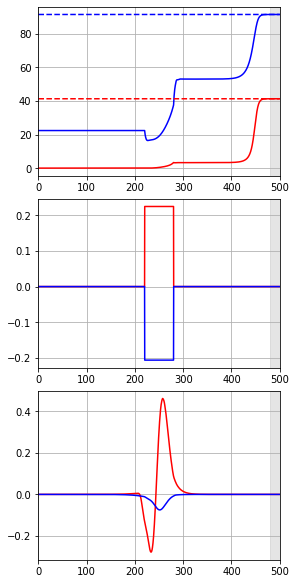

uncontrolled cost :  853.444341989734
cost splitting :  6.284657462236932e-06 [1.51716596 1.27978253]
-------  22 0.5000000000000002 0.4750000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  19.213667696594598
RUN  3 , total integrated cost =  19.14652902471955
RUN  4 , total integrated cost =  19.144430941223508
RUN  5 , total integrated cost =  19.1442762793713
RUN  6 , total integrated cost =  19.144275594487997
RUN  7 , total integrated cost =  19.14427525852904
RUN  8 , total integrated cost =  19.144274724365303
RUN  9 , total integrated cost =  19.144274724365303
Control only changes marginally.
RUN  9 , total integrated cost =  19.144274724365303
Improved over  9  iterations in  2.6219720928929746  seconds by  93.82121190144282  percent.


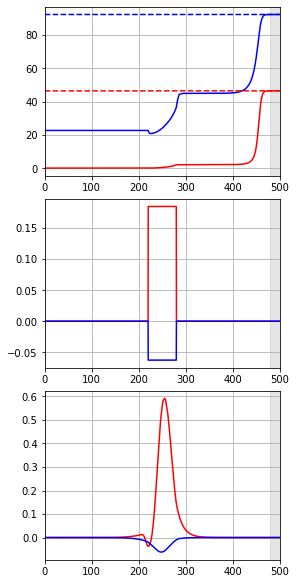

uncontrolled cost :  1078.2588794154944
cost splitting :  2.346532814478376e-05 [1.0216399  0.11760958]
-------  23 0.5250000000000001 0.4750000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  9.838667696594726
RUN  2 , total integrated cost =  5.078125
RUN  3 , total integrated cost =  4.632368868478793
RUN  4 , total integrated cost =  4.6306668997862745
RUN  5 , total integrated cost =  4.630598512898755
RUN  6 , total integrated cost =  4.630547364473167
RUN  7 , total integrated cost =  4.630423123677315
RUN  8 , total integrated cost =  4.6303963417699405
RUN  9 , total integrated cost =  4.630351686182729
RUN  10 , total integrated cost =  4.630319934277388
RUN  10 , total integrated cost =  4.630319934277388
Improved over  10  iterations in  2.7042052219621837  seconds by  98.5055706672443  percent.

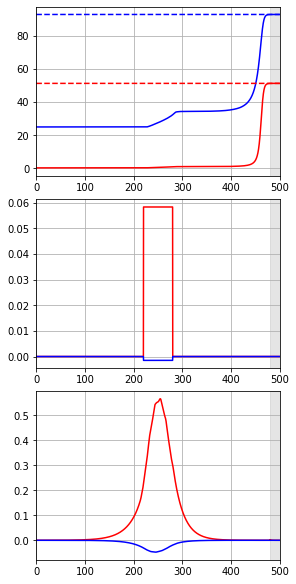

uncontrolled cost :  1305.596837765156
cost splitting :  0.0003750034910444088 [1.01856157e-01 6.82709269e-05]
-------  24 0.4000000000000001 0.5000000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8434770209433
RUN  0 , total integrated cost =  309.8434770209433
Gradient descend method:  None
RUN  1 , total integrated cost =  308.6194210452366
RUN  2 , total integrated cost =  308.6194210452366
Control only changes marginally.
RUN  2 , total integrated cost =  308.6194210452366
Improved over  2  iterations in  1.0435582819627598  seconds by  0.3950562353210074  percent.


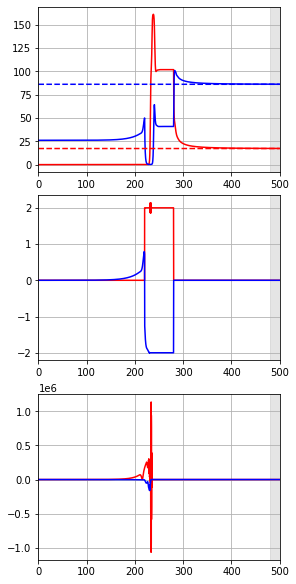

uncontrolled cost :  149.04908161970724
cost splitting :  0.09617623949387752 [119.98913324 118.12197438]
-------  25 0.4250000000000001 0.5000000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  72.33833592841701
RUN  2 , total integrated cost =  67.65083592841691
RUN  3 , total integrated cost =  67.52876561591744
RUN  4 , total integrated cost =  67.52590460365548
RUN  5 , total integrated cost =  67.52578838560694
RUN  6 , total integrated cost =  67.52578538154349
RUN  7 , total integrated cost =  67.52578050159504
RUN  8 , total integrated cost =  67.52577748351901
RUN  9 , total integrated cost =  67.52577264016783
RUN  10 , total integrated cost =  67.52576959317813
RUN  10 , total integrated cost =  67.52576959317813
Improved over  10  iterations in  3.2081472789868712  seconds by  78.2061515771486 

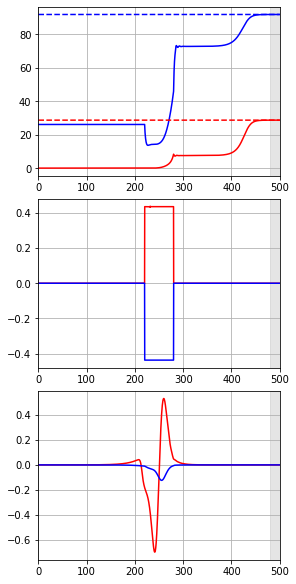

uncontrolled cost :  411.59536107342876
cost splitting :  7.963820618232122e-05 [5.67855312 5.72080859]
-------  26 0.4500000000000001 0.5000000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  59.83866769659463
RUN  2 , total integrated cost =  55.932417696594136
RUN  3 , total integrated cost =  55.81645089971924
RUN  4 , total integrated cost =  55.813208407043504
RUN  5 , total integrated cost =  55.81307767860287
RUN  6 , total integrated cost =  55.81307767860287
Control only changes marginally.
RUN  6 , total integrated cost =  55.81307767860287
Improved over  6  iterations in  1.6087002230342478  seconds by  81.98640663751593  percent.


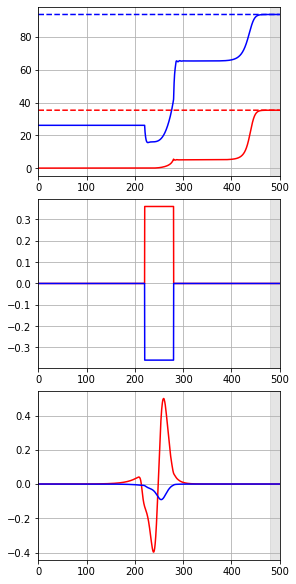

uncontrolled cost :  623.98423067335
cost splitting :  8.035555492952025e-06 [3.91054419 3.87724041]
-------  27 0.47500000000000014 0.5000000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  47.33866769659453
RUN  2 , total integrated cost =  43.432417696594655
RUN  3 , total integrated cost =  43.06620675909468
RUN  4 , total integrated cost =  43.046370333313405
RUN  5 , total integrated cost =  43.045512026428625
RUN  6 , total integrated cost =  43.04547030326008
RUN  7 , total integrated cost =  43.045468490009135
RUN  8 , total integrated cost =  43.045468490009135
Control only changes marginally.
RUN  8 , total integrated cost =  43.045468490009135
Improved over  8  iterations in  2.4235035959864035  seconds by  86.1071347840416  percent.


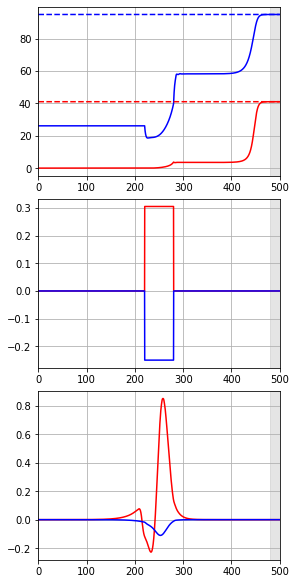

uncontrolled cost :  840.486503578103
cost splitting :  4.707492284225441e-06 [2.80118682 1.87717292]
-------  28 0.5000000000000002 0.5000000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  309.8386676965948
Control only changes marginally.
RUN  1 , total integrated cost =  309.8386676965948
Improved over  1  iterations in  0.7149380120681599  seconds by  0.0  percent.


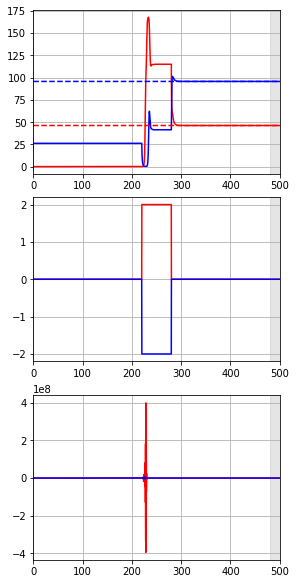

uncontrolled cost :  1065.654639098131
cost splitting :  4.5438388140730445e-27 [120. 120.]
-------  29 0.5250000000000001 0.5000000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  14.526167696594557
RUN  3 , total integrated cost =  12.306013888000932
RUN  4 , total integrated cost =  12.266341036438384
RUN  5 , total integrated cost =  12.262526339206923
RUN  6 , total integrated cost =  12.262409254176546
RUN  7 , total integrated cost =  12.262402455741128
RUN  8 , total integrated cost =  12.262389433368433
RUN  9 , total integrated cost =  12.262382020425248
RUN  10 , total integrated cost =  11.765328845441779
RUN  10 , total integrated cost =  11.765328845441779
Improved over  10  iterations in  2.6426623590523377  seconds by  96.20275644324587  p

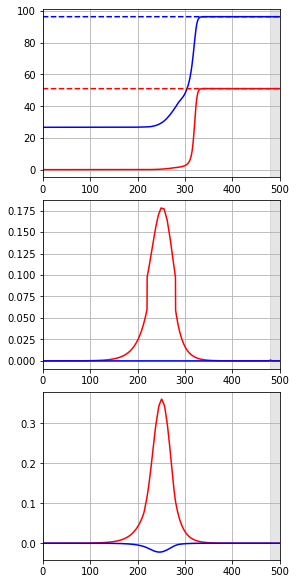

uncontrolled cost :  1299.2487134596593
cost splitting :  0.0010987923978932077 [6.91867081e-01 2.10303787e-08]
-------  30 0.4250000000000001 0.5250000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  84.838667732631
RUN  2 , total integrated cost =  77.80741773263102
RUN  3 , total integrated cost =  77.70976148263111
RUN  4 , total integrated cost =  77.70594679801498
RUN  5 , total integrated cost =  77.70578558558427
RUN  6 , total integrated cost =  77.70577960544519
RUN  7 , total integrated cost =  77.70577578266955
RUN  8 , total integrated cost =  77.70577029898939
RUN  9 , total integrated cost =  77.7057666237341
RUN  10 , total integrated cost =  77.70576077085168
RUN  10 , total integrated cost =  77.70576077085168
Improved over  10  iterations in  2.620285665965639  seconds by  74.920573552509

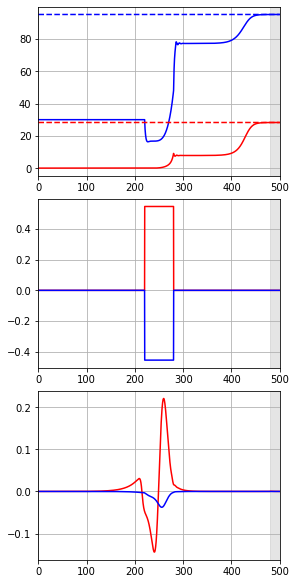

uncontrolled cost :  398.9158590893028
cost splitting :  0.0002876894714740237 [8.99699943 6.22565454]
-------  31 0.4500000000000001 0.5250000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  66.0886676965949
RUN  2 , total integrated cost =  65.82011300909446
RUN  3 , total integrated cost =  65.80180246221988
RUN  4 , total integrated cost =  65.80123025763018
RUN  5 , total integrated cost =  65.80118854641586
RUN  6 , total integrated cost =  65.80118671794357
RUN  7 , total integrated cost =  65.31690353844117
RUN  8 , total integrated cost =  63.16846603825521
RUN  9 , total integrated cost =  63.12955612614566
RUN  10 , total integrated cost =  63.12930280654708
RUN  10 , total integrated cost =  63.12930280654708
Improved over  10  iterations in  2.7336396970786154  seconds by  79.6251051310466  per

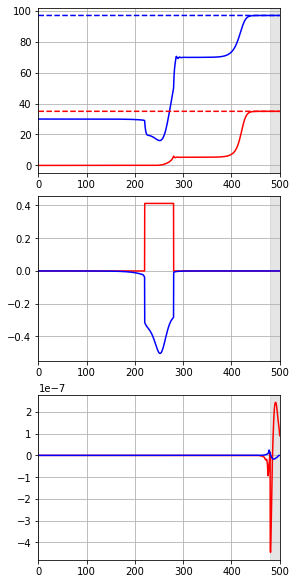

uncontrolled cost :  611.9840098576404
cost splitting :  3.022795805403673e-09 [5.10418295 4.86057828]
-------  32 0.47500000000000014 0.5250000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  59.83866769659463
RUN  2 , total integrated cost =  52.02616769659471
RUN  3 , total integrated cost =  51.891890352844705
RUN  4 , total integrated cost =  51.88616830694611
RUN  5 , total integrated cost =  51.8858345209353
RUN  6 , total integrated cost =  51.88582275520609
RUN  7 , total integrated cost =  51.36146496203384
RUN  8 , total integrated cost =  50.091933712024804
RUN  9 , total integrated cost =  50.04005382921192
RUN  10 , total integrated cost =  50.039994224542454
RUN  10 , total integrated cost =  50.039994224542454
Improved over  10  iterations in  3.591074166004546  seconds by  83.84966131033606

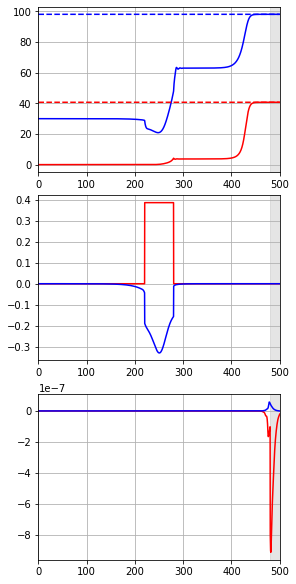

uncontrolled cost :  828.4109189821265
cost splitting :  1.7191634029073886e-10 [4.47583269 2.02420487]
-------  33 0.5000000000000002 0.5250000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  47.33866769659453
RUN  2 , total integrated cost =  37.18241769659461
RUN  3 , total integrated cost =  37.133589571594484
RUN  4 , total integrated cost =  37.133184260010026
RUN  5 , total integrated cost =  37.13317758905416
RUN  6 , total integrated cost =  37.13317758905416
Control only changes marginally.
RUN  6 , total integrated cost =  37.13317758905416
Improved over  6  iterations in  2.1713654190534726  seconds by  88.01531846715262  percent.


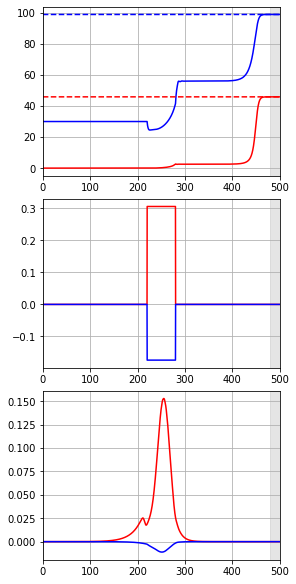

uncontrolled cost :  1053.4566176891283
cost splitting :  6.913272434862948e-07 [2.80118682 0.90637544]
-------  34 0.5250000000000001 0.5250000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  23.11991769659464
RUN  3 , total integrated cost =  22.875777071594612
RUN  4 , total integrated cost =  22.871199434875827
RUN  5 , total integrated cost =  22.87093717529801
RUN  6 , total integrated cost =  22.87092502760233
RUN  7 , total integrated cost =  22.86962282401593
RUN  8 , total integrated cost =  22.81163942557843
RUN  9 , total integrated cost =  22.810304281552472
RUN  10 , total integrated cost =  22.810281214929184
RUN  10 , total integrated cost =  22.810281214929184
Improved over  10  iterations in  3.4912640209076926  seconds by  92.6380133943

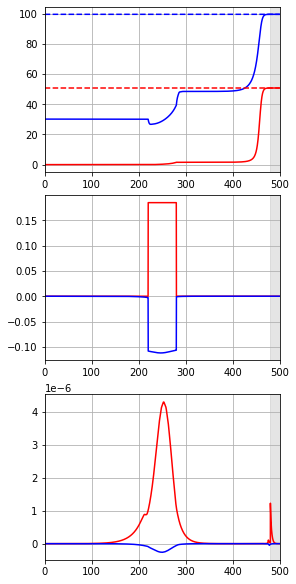

uncontrolled cost :  1287.9845155276914
cost splitting :  1.5502506722188584e-05 [1.0216399  0.36260673]
-------  35 0.5500000000000003 0.5250000000000002
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  9.838667696594726
RUN  2 , total integrated cost =  5.078125
RUN  3 , total integrated cost =  4.895019531250027
RUN  4 , total integrated cost =  4.827785520707991
RUN  5 , total integrated cost =  4.8259135440551555
RUN  6 , total integrated cost =  4.825837782003821
RUN  7 , total integrated cost =  4.825724978831687
RUN  8 , total integrated cost =  4.825650900348878
RUN  9 , total integrated cost =  4.825535967047002
RUN  10 , total integrated cost =  4.825461972371006
RUN  10 , total integrated cost =  4.825461972371006
Improved over  10  iterations in  3.0684209199389443  seconds by  98.44258884527083  percent

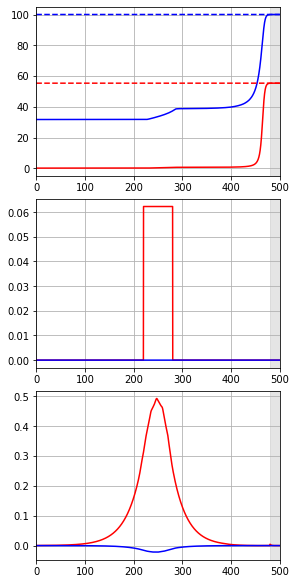

uncontrolled cost :  1527.32144921191
cost splitting :  0.001474728555791405 [1.16421854e-01 4.28102904e-17]
-------  36 0.4250000000000001 0.5500000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  97.3386676965927
RUN  2 , total integrated cost =  87.96366769659292
RUN  3 , total integrated cost =  87.28007394659261
RUN  4 , total integrated cost =  87.25871164200701
RUN  5 , total integrated cost =  87.25737743203615
RUN  6 , total integrated cost =  87.25733271833391
RUN  7 , total integrated cost =  87.25731948012343
RUN  8 , total integrated cost =  87.25722685199857
RUN  9 , total integrated cost =  87.2572177352237
RUN  10 , total integrated cost =  87.25719460412245
RUN  10 , total integrated cost =  87.25719460412245
Improved over  10  iterations in  3.015398857067339  seconds by  71.83786153845463

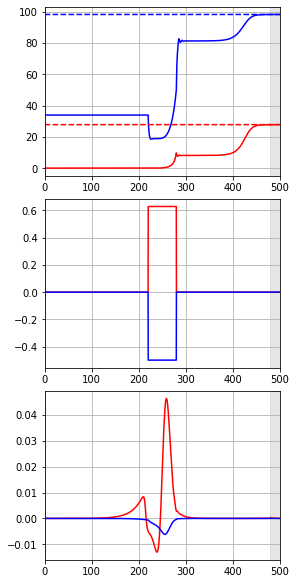

uncontrolled cost :  387.0833866640474
cost splitting :  0.00028346881199957906 [11.84352029  7.44510952]
-------  37 0.4500000000000001 0.5500000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  84.83866769659465
RUN  2 , total integrated cost =  74.6824176965946
RUN  3 , total integrated cost =  73.99882394659463
RUN  4 , total integrated cost =  73.9591510950322
RUN  5 , total integrated cost =  73.95824510750035
RUN  6 , total integrated cost =  73.95824004254382
RUN  7 , total integrated cost =  72.6584380113715
RUN  8 , total integrated cost =  70.51000051120943
RUN  9 , total integrated cost =  70.36351613619908
RUN  10 , total integrated cost =  70.35703115084675
RUN  10 , total integrated cost =  70.35703115084675
Improved over  10  iterations in  3.318378826021217  seconds by  77.29236583868128  pe

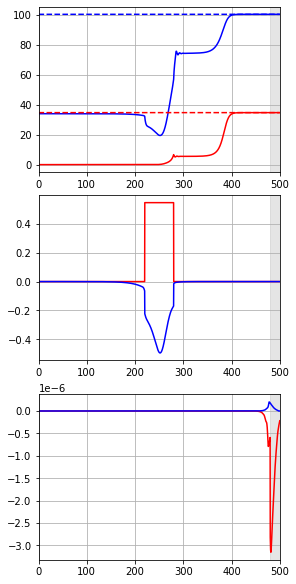

uncontrolled cost :  600.8741453799756
cost splitting :  9.530295172376584e-09 [8.99699942 3.90257465]
-------  38 0.47500000000000014 0.5500000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  66.0886676965949
RUN  2 , total integrated cost =  61.40116769659484
RUN  3 , total integrated cost =  61.29130441534473
RUN  4 , total integrated cost =  61.28920633184859
RUN  5 , total integrated cost =  61.289128845820734
RUN  6 , total integrated cost =  61.28912517702151
RUN  7 , total integrated cost =  61.28912517702151
Control only changes marginally.
RUN  7 , total integrated cost =  61.28912517702151
Improved over  7  iterations in  1.6561195639660582  seconds by  80.21901990714792  percent.


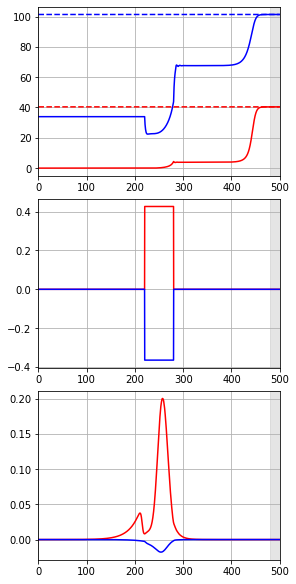

uncontrolled cost :  817.2314097109169
cost splitting :  1.1289929418038798e-06 [5.45964    3.98884117]
-------  39 0.5000000000000002 0.5500000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  59.83866769659463
RUN  2 , total integrated cost =  44.21366769659457
RUN  3 , total integrated cost =  43.23710519659456
RUN  4 , total integrated cost =  43.215742891907155
RUN  5 , total integrated cost =  43.214693850159016
RUN  6 , total integrated cost =  43.214616364561735
RUN  7 , total integrated cost =  43.214616364561735
Control only changes marginally.
RUN  7 , total integrated cost =  43.214616364561735
Improved over  7  iterations in  1.9277594180312008  seconds by  86.05254254227589  percent.


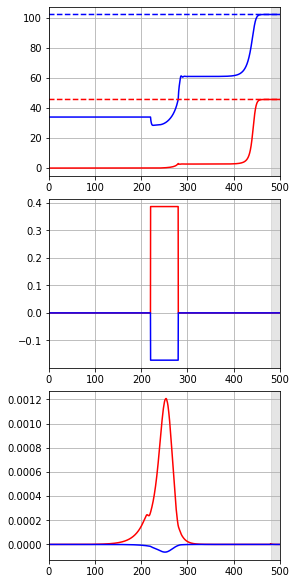

uncontrolled cost :  1042.0431472829491
cost splitting :  8.8181363768961e-09 [4.47583269 0.88382269]
-------  40 0.5250000000000001 0.5500000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  34.83866769659462
RUN  2 , total integrated cost =  31.713667696594584
RUN  3 , total integrated cost =  31.664839571594566
RUN  4 , total integrated cost =  31.662741488100636
RUN  5 , total integrated cost =  31.662733532671876
RUN  6 , total integrated cost =  31.662733532671876
Control only changes marginally.
RUN  6 , total integrated cost =  31.662733532671876
Improved over  6  iterations in  1.4328317359322682  seconds by  89.78089669437995  percent.


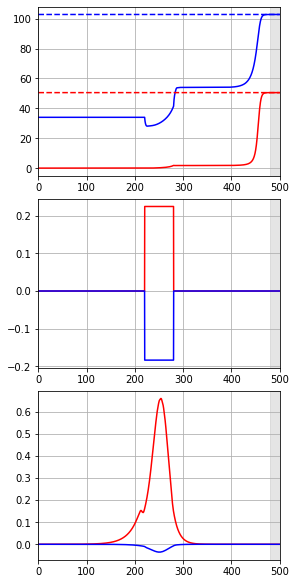

uncontrolled cost :  1276.5738852746529
cost splitting :  4.8039572454427525e-06 [1.51716596 1.01437214]
-------  41 0.5500000000000003 0.5500000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  14.526167696594557
RUN  3 , total integrated cost =  11.01054269659462
RUN  4 , total integrated cost =  10.87626535284462
RUN  5 , total integrated cost =  10.874741215814621
RUN  6 , total integrated cost =  10.8747242470041
RUN  7 , total integrated cost =  10.874718983567947
RUN  8 , total integrated cost =  10.874710472852039
RUN  9 , total integrated cost =  10.87470494541894
RUN  10 , total integrated cost =  10.874407148671043
RUN  10 , total integrated cost =  10.874407148671043
Improved over  10  iterations in  3.038685616920702  seconds by  96.4903001844

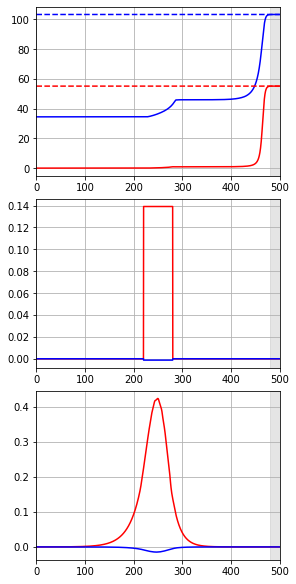

uncontrolled cost :  1519.6476109133644
cost splitting :  0.0019558103863853015 [5.80861169e-01 4.60674754e-05]
-------  42 0.4250000000000001 0.5750000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  103.58866769659393
RUN  2 , total integrated cost =  96.94804269659426
RUN  3 , total integrated cost =  96.92973216062876
RUN  4 , total integrated cost =  96.92918723837896
RUN  5 , total integrated cost =  96.92918070200074
RUN  6 , total integrated cost =  96.9291705937466
RUN  7 , total integrated cost =  96.92916414937156
RUN  8 , total integrated cost =  96.92915409465725
RUN  9 , total integrated cost =  96.92914762494966
RUN  10 , total integrated cost =  96.92913735803984
RUN  10 , total integrated cost =  96.92913735803984
Improved over  10  iterations in  2.3549657070543617  seconds by  68.71625543

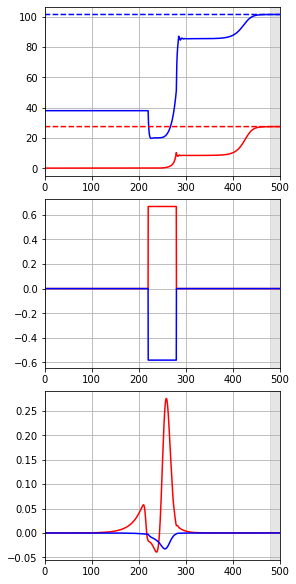

uncontrolled cost :  375.9591752519903
cost splitting :  0.0005702497360354989 [13.41326509 10.18573957]
-------  43 0.4500000000000001 0.5750000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  84.83866769659465
RUN  2 , total integrated cost =  84.49687082159471
RUN  3 , total integrated cost =  84.48008615362578
RUN  4 , total integrated cost =  84.47875100965639
RUN  5 , total integrated cost =  84.4787386065642
RUN  6 , total integrated cost =  84.4787386065642
Control only changes marginally.
RUN  6 , total integrated cost =  84.4787386065642
Improved over  6  iterations in  1.9889123099856079  seconds by  72.73460435568074  percent.


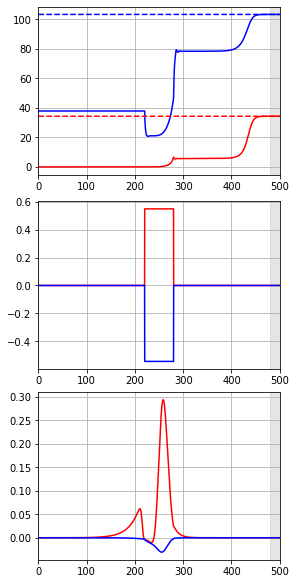

uncontrolled cost :  590.5339574936078
cost splitting :  5.253893451410427e-06 [8.99699942 8.84496753]
-------  44 0.47500000000000014 0.5750000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  72.33866769659429
RUN  2 , total integrated cost =  70.38554269659457
RUN  3 , total integrated cost =  70.2756794153442
RUN  4 , total integrated cost =  70.27186471807897
RUN  5 , total integrated cost =  70.27168590414426
RUN  6 , total integrated cost =  70.27167705424567
RUN  7 , total integrated cost =  69.7482204385131
RUN  8 , total integrated cost =  64.67009540056397
RUN  9 , total integrated cost =  64.47478289954384
RUN  10 , total integrated cost =  64.46486468660227
RUN  10 , total integrated cost =  64.46486468660227
Improved over  10  iterations in  3.011542128981091  seconds by  79.19405438777301  per

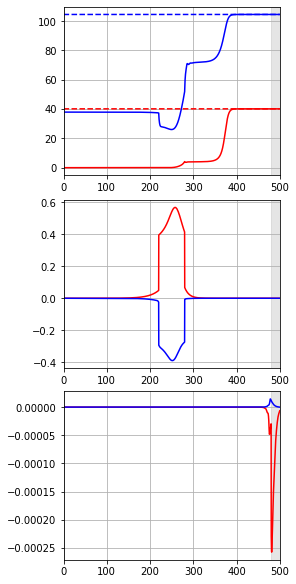

uncontrolled cost :  806.8509744931607
cost splitting :  5.259620451763345e-05 [7.22467549 3.49868969]
-------  45 0.5000000000000002 0.5750000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  59.83866769659463
RUN  2 , total integrated cost =  54.369917696594655
RUN  3 , total integrated cost =  54.339400118469676
RUN  4 , total integrated cost =  54.337111300110294
RUN  5 , total integrated cost =  54.33703977453777
RUN  6 , total integrated cost =  54.337034967603856
RUN  7 , total integrated cost =  54.337034967603856
Control only changes marginally.
RUN  7 , total integrated cost =  54.337034967603856
Improved over  7  iterations in  2.309790335013531  seconds by  82.4627973740151  percent.


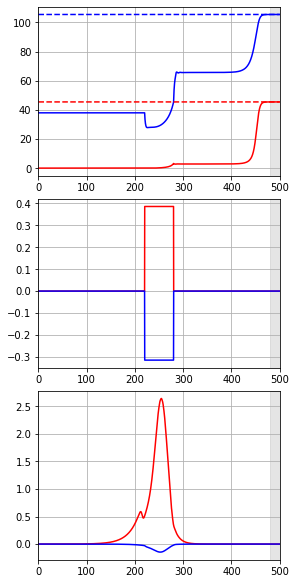

uncontrolled cost :  1031.3953947060102
cost splitting :  8.169307969760214e-06 [4.47583269 2.98112054]
-------  46 0.5250000000000001 0.5750000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  47.33866769659453
RUN  2 , total integrated cost =  35.619917696594534
RUN  3 , total integrated cost =  35.47343332159455
RUN  4 , total integrated cost =  35.47238427984644
RUN  5 , total integrated cost =  35.47229498879661
RUN  6 , total integrated cost =  35.47229498879661
Control only changes marginally.
RUN  6 , total integrated cost =  35.47229498879661
Improved over  6  iterations in  1.8866844810545444  seconds by  88.55136602138622  percent.


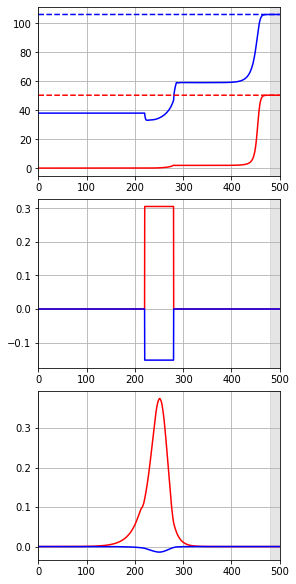

uncontrolled cost :  1265.7355655437036
cost splitting :  2.3183470911543478e-06 [2.80118682 0.69654944]
-------  47 0.5500000000000003 0.5750000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  18.4324176965946
RUN  3 , total integrated cost =  17.69999582159459
RUN  4 , total integrated cost =  17.654219454407063
RUN  5 , total integrated cost =  17.651930638458502
RUN  6 , total integrated cost =  17.651837449553494
RUN  7 , total integrated cost =  17.509517163769953
RUN  8 , total integrated cost =  17.399653882515498
RUN  9 , total integrated cost =  17.396411389814745
RUN  10 , total integrated cost =  17.3962596324657
RUN  10 , total integrated cost =  17.3962596324657
Improved over  10  iterations in  2.6563948220573366  seconds by  94.38538134643

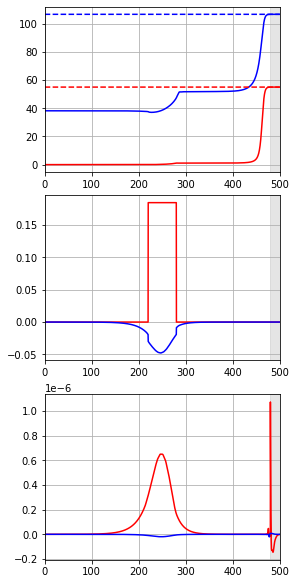

uncontrolled cost :  1509.5617137521951
cost splitting :  0.0003027118063429701 [1.0216399  0.04810925]
-------  48 0.4250000000000001 0.6000000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  109.83866769659345
RUN  2 , total integrated cost =  106.3230426965941
RUN  3 , total integrated cost =  106.3025664215569
RUN  4 , total integrated cost =  106.30173753613235
RUN  5 , total integrated cost =  106.30168850031227
RUN  6 , total integrated cost =  106.3016614945356
RUN  7 , total integrated cost =  106.30164439803521
RUN  8 , total integrated cost =  106.30163381095426
RUN  9 , total integrated cost =  106.30161637792467
RUN  10 , total integrated cost =  106.30160610649817
RUN  10 , total integrated cost =  106.30160610649817
Improved over  10  iterations in  2.0510575289372355  seconds by  65.69130415

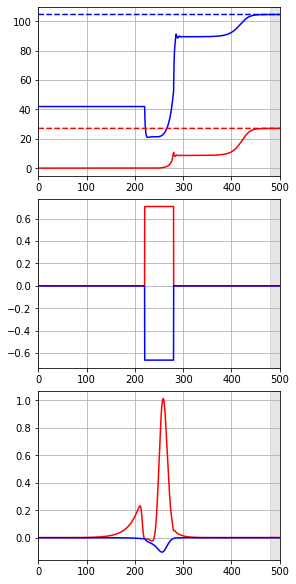

uncontrolled cost :  365.51076705497655
cost splitting :  0.0003131103536356384 [15.08061676 13.20072768]
-------  49 0.4500000000000001 0.6000000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  97.3386676965942
RUN  2 , total integrated cost =  92.26054269659417
RUN  3 , total integrated cost =  91.99198800909423
RUN  4 , total integrated cost =  91.98969919166382
RUN  5 , total integrated cost =  91.98969035052481
RUN  6 , total integrated cost =  91.98969035052481
Control only changes marginally.
RUN  6 , total integrated cost =  91.98969035052481
Improved over  6  iterations in  1.2988786878995597  seconds by  70.31045510413684  percent.


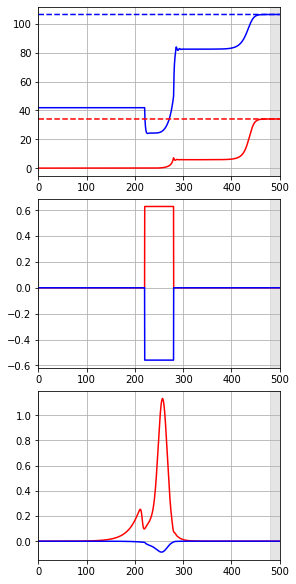

uncontrolled cost :  580.8726224508954
cost splitting :  1.684682352082035e-05 [11.84352029  9.38326607]
-------  50 0.47500000000000014 0.6000000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  84.83866769659465
RUN  2 , total integrated cost =  76.24491769659461
RUN  3 , total integrated cost =  76.19303781378193
RUN  4 , total integrated cost =  76.19122583258087
RUN  5 , total integrated cost =  76.19115430703647
RUN  6 , total integrated cost =  76.19115128390419
RUN  7 , total integrated cost =  75.5974860761004
RUN  8 , total integrated cost =  73.74201732609342
RUN  9 , total integrated cost =  73.65046459171808
RUN  10 , total integrated cost =  73.64664989445241
RUN  10 , total integrated cost =  73.64664989445241
Improved over  10  iterations in  3.049392481101677  seconds by  76.23064595456825  

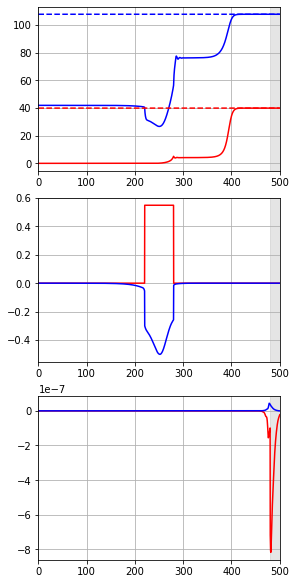

uncontrolled cost :  797.1477718037709
cost splitting :  5.473113149778203e-10 [8.99699942 4.87572634]
-------  51 0.5000000000000002 0.6000000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  66.0886676965949
RUN  2 , total integrated cost =  62.182417696594726
RUN  3 , total integrated cost =  61.97489816534481
RUN  4 , total integrated cost =  61.97184640753208
RUN  5 , total integrated cost =  61.97183795382399
RUN  6 , total integrated cost =  61.97183795382399
Control only changes marginally.
RUN  6 , total integrated cost =  61.97183795382399
Improved over  6  iterations in  1.5915041830157861  seconds by  79.99867530591467  percent.


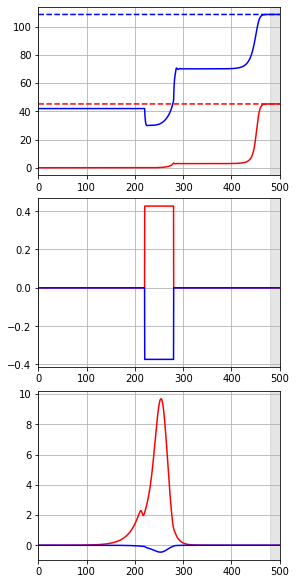

uncontrolled cost :  1021.4835077649523
cost splitting :  9.739772999632114e-06 [5.45964    4.18400233]
-------  52 0.5250000000000001 0.6000000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  47.33866769659453
RUN  2 , total integrated cost =  46.85038644659451
RUN  3 , total integrated cost =  46.82749826300074
RUN  4 , total integrated cost =  46.8274148198651
RUN  5 , total integrated cost =  46.827412918218776
RUN  6 , total integrated cost =  45.586611747406984
RUN  7 , total integrated cost =  44.75653362239496
RUN  8 , total integrated cost =  44.74432659114474
RUN  9 , total integrated cost =  44.744159738892535
RUN  10 , total integrated cost =  44.744159738892535
Control only changes marginally.
RUN  10 , total integrated cost =  44.744159738892535
Improved over  10  iterations in  2.572754352004

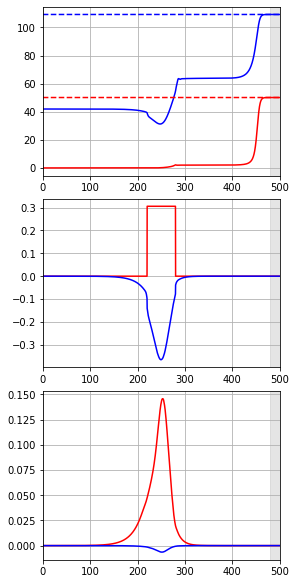

uncontrolled cost :  1255.5484151263772
cost splitting :  8.165232973335479e-07 [2.80118682 2.22074142]
-------  53 0.5500000000000003 0.6000000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  34.83866769659462
RUN  2 , total integrated cost =  23.90116769659461
RUN  3 , total integrated cost =  23.461714571594584
RUN  4 , total integrated cost =  23.448744600891473
RUN  5 , total integrated cost =  23.448387158966927
RUN  6 , total integrated cost =  23.44838313199689
RUN  7 , total integrated cost =  23.31747264875037
RUN  8 , total integrated cost =  23.097746086248964
RUN  9 , total integrated cost =  23.093168449530108
RUN  10 , total integrated cost =  23.093025903115876
RUN  10 , total integrated cost =  23.093025903115876
Improved over  10  iterations in  3.569584201090038  seconds by  92.5467579386

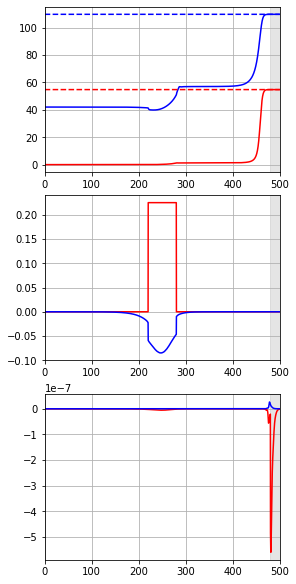

uncontrolled cost :  1499.45071686005
cost splitting :  1.0094847579597944e-05 [1.51716596 0.16095388]
-------  54 0.5750000000000002 0.6000000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  9.838667696594726
RUN  2 , total integrated cost =  5.932417696594727
RUN  3 , total integrated cost =  5.8110631139050355
RUN  4 , total integrated cost =  5.74541637229453
RUN  5 , total integrated cost =  5.725226364362494
RUN  6 , total integrated cost =  5.353404552516306
RUN  7 , total integrated cost =  4.572166715042825
RUN  8 , total integrated cost =  4.45755890915516
RUN  9 , total integrated cost =  4.4544615454514895
RUN  10 , total integrated cost =  4.454322331859439
RUN  10 , total integrated cost =  4.454322331859439
Improved over  10  iterations in  3.4973422940820456  seconds by  98.56237364917239  p

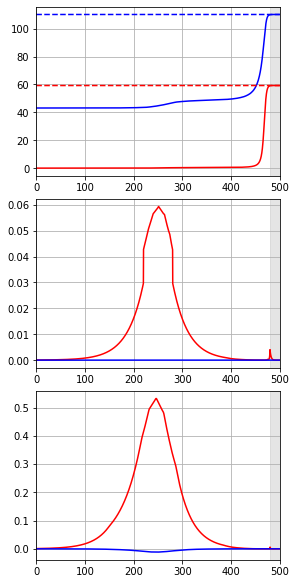

uncontrolled cost :  1749.4018925696892
cost splitting :  0.002644644319154892 [9.91969420e-02 1.11692178e-11]
-------  55 0.4250000000000001 0.6250000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  122.33866769659441
RUN  2 , total integrated cost =  113.74491769659426
RUN  3 , total integrated cost =  113.69608982569183
RUN  4 , total integrated cost =  113.6956381299275
RUN  5 , total integrated cost =  109.16436004566263
RUN  6 , total integrated cost =  106.42882026103185
RUN  7 , total integrated cost =  106.36164772089373
RUN  8 , total integrated cost =  106.34609786921563
RUN  9 , total integrated cost =  106.28363843188163
RUN  10 , total integrated cost =  106.28363843188163
Control only changes marginally.
RUN  10 , total integrated cost =  106.28363843188163
Improved over  10  iterations in  3

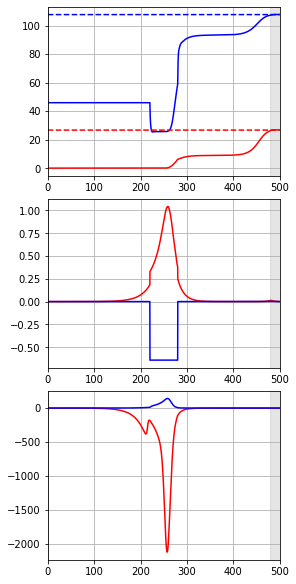

uncontrolled cost :  355.64566789762387
cost splitting :  0.2666492435382418 [15.98770684 12.36213181]
-------  56 0.4500000000000001 0.6250000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  103.588667696594
RUN  2 , total integrated cost =  100.4636676965941
RUN  3 , total integrated cost =  100.34159738409429
RUN  4 , total integrated cost =  100.33816415655596
RUN  5 , total integrated cost =  100.33808083558912
RUN  6 , total integrated cost =  100.33807954782334
RUN  7 , total integrated cost =  100.33807911025647
RUN  8 , total integrated cost =  100.33807816478232
RUN  9 , total integrated cost =  100.33139275370985
RUN  10 , total integrated cost =  99.96518181620974
RUN  10 , total integrated cost =  99.96518181620974
Improved over  10  iterations in  3.3473548520123586  seconds by  67.73637630210

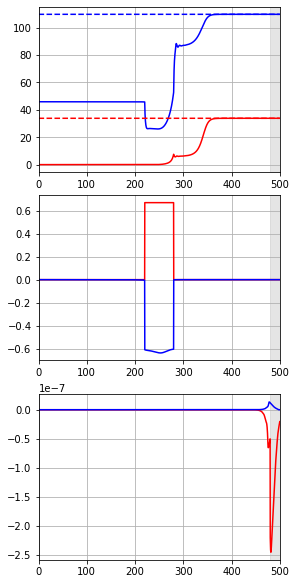

uncontrolled cost :  571.8584743356153
cost splitting :  5.859582391521656e-11 [13.41326509 11.60215297]
-------  57 0.47500000000000014 0.6250000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  97.3386676965942
RUN  2 , total integrated cost =  80.15116769659417
RUN  3 , total integrated cost =  79.51640207159427
RUN  4 , total integrated cost =  79.47978097784409
RUN  5 , total integrated cost =  79.47787362921157
RUN  6 , total integrated cost =  79.47771895767048
RUN  7 , total integrated cost =  79.47771895767048
Control only changes marginally.
RUN  7 , total integrated cost =  79.47771895767048
Improved over  7  iterations in  2.3174374649534  seconds by  74.34867650686584  percent.


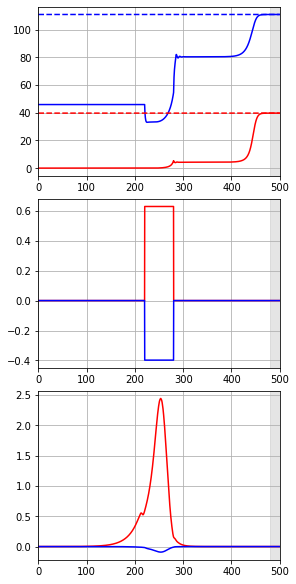

uncontrolled cost :  788.100083052238
cost splitting :  6.010708181915209e-06 [11.84352029  4.74578287]
-------  58 0.5000000000000002 0.6250000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  72.33866769659429
RUN  2 , total integrated cost =  68.82304269659429
RUN  3 , total integrated cost =  68.81846505987546
RUN  4 , total integrated cost =  68.81824177382778
RUN  5 , total integrated cost =  68.81824177382778
Control only changes marginally.
RUN  5 , total integrated cost =  68.81824177382778
Improved over  5  iterations in  1.2780471259029582  seconds by  77.78900797455756  percent.


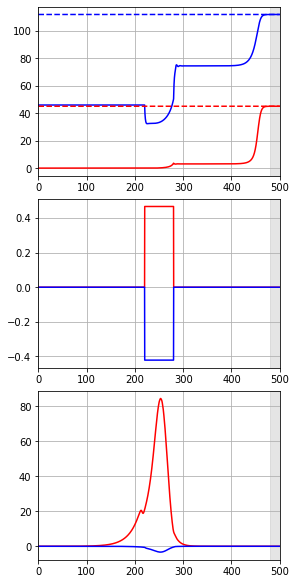

uncontrolled cost :  1012.236377049588
cost splitting :  6.423204768717884e-05 [6.54110356 5.3297549 ]
-------  59 0.5250000000000001 0.6250000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  59.83866769659463
RUN  2 , total integrated cost =  47.33866769659449
RUN  3 , total integrated cost =  46.89921457159471
RUN  4 , total integrated cost =  46.89730722296186
RUN  5 , total integrated cost =  46.89715225088561
RUN  6 , total integrated cost =  46.897147083137675
RUN  7 , total integrated cost =  46.332555279354644
RUN  8 , total integrated cost =  42.42630526658283
RUN  9 , total integrated cost =  42.34695956333721
RUN  10 , total integrated cost =  42.34514758036205
RUN  10 , total integrated cost =  42.34514758036205
Improved over  10  iterations in  2.733013104996644  seconds by  86.3331623857136  p

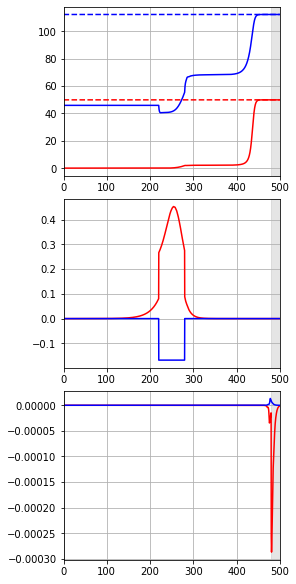

uncontrolled cost :  1246.0201531879043
cost splitting :  4.90527299220083e-05 [4.30850369 0.84375318]
-------  60 0.5500000000000003 0.6250000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  47.33866769659453
RUN  2 , total integrated cost =  23.901167696594527
RUN  3 , total integrated cost =  22.314253634094623
RUN  4 , total integrated cost =  22.271529024719648
RUN  5 , total integrated cost =  22.268441504120336
RUN  6 , total integrated cost =  22.268340962399485
RUN  7 , total integrated cost =  22.268312296126435
RUN  8 , total integrated cost =  22.268269440657942
RUN  9 , total integrated cost =  22.268267841592756
RUN  10 , total integrated cost =  22.268267841592756
Control only changes marginally.
RUN  10 , total integrated cost =  22.268267841592756
Improved over  10  iterations in  2.5960942

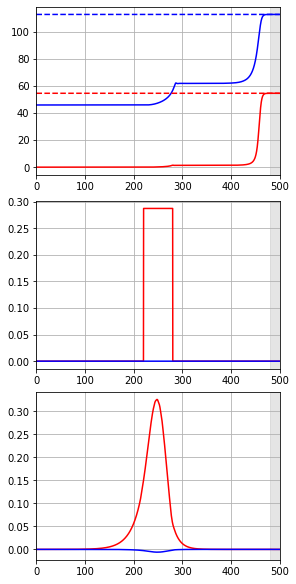

uncontrolled cost :  1489.7819922684603
cost splitting :  6.279838010997487e-06 [2.47937867e+00 4.87951768e-17]
-------  61 0.5750000000000002 0.6250000000000003
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  13.012495821594646
RUN  3 , total integrated cost =  11.254683321594673
RUN  4 , total integrated cost =  11.218071784215525
RUN  5 , total integrated cost =  11.217744354332437
RUN  6 , total integrated cost =  11.217651577355852
RUN  7 , total integrated cost =  10.746110589206982
RUN  8 , total integrated cost =  9.476579067335338
RUN  9 , total integrated cost =  9.433849968363342
RUN  10 , total integrated cost =  9.431332322676145
RUN  10 , total integrated cost =  9.431332322676145
Improved over  10  iterations in  3.093886903952807  seconds by  96.95

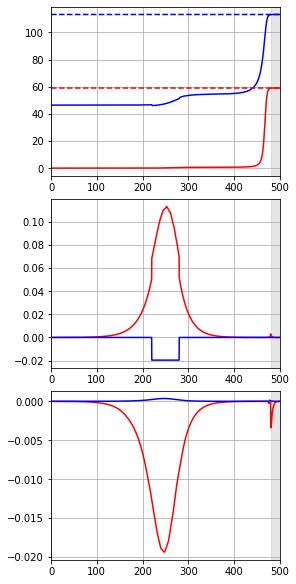

uncontrolled cost :  1741.7404678036398
cost splitting :  0.0013306129433415036 [0.31320902 0.0115005 ]
-------  62 0.4250000000000001 0.6500000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  131.71366769659463
RUN  2 , total integrated cost =  120.77616769659411
RUN  3 , total integrated cost =  120.66630443948716
RUN  4 , total integrated cost =  120.66440917092085
RUN  5 , total integrated cost =  120.66428392076126
RUN  6 , total integrated cost =  120.66421592483444
RUN  7 , total integrated cost =  120.66417476890909
RUN  8 , total integrated cost =  120.66411818854111
RUN  9 , total integrated cost =  120.66408325740564
RUN  10 , total integrated cost =  120.66404969568184
RUN  10 , total integrated cost =  120.66404969568184
Improved over  10  iterations in  3.2118779049487785  seconds by  61.05584

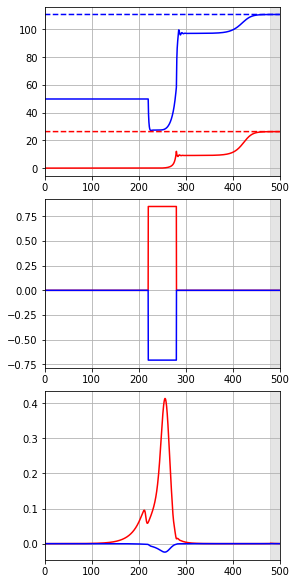

uncontrolled cost :  346.3084589538196
cost splitting :  0.0014190165264269335 [21.68546289 15.01924043]
-------  63 0.4500000000000001 0.6500000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  109.83866769659345
RUN  2 , total integrated cost =  108.17851144659383
RUN  3 , total integrated cost =  108.14189035284372
RUN  4 , total integrated cost =  108.14127046460791
RUN  5 , total integrated cost =  108.14123494319072
RUN  6 , total integrated cost =  108.14123381358327
RUN  7 , total integrated cost =  108.14123341011256
RUN  8 , total integrated cost =  108.14123272549422
RUN  9 , total integrated cost =  108.14123235884256
RUN  10 , total integrated cost =  108.14123171294825
RUN  10 , total integrated cost =  108.14123171294825
Improved over  10  iterations in  2.9250711189815775  seconds by  65.0975

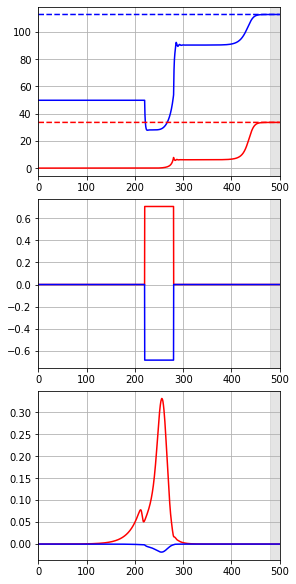

uncontrolled cost :  563.4077876032045
cost splitting :  2.362468509986996e-05 [15.08066615 14.16285143]
-------  64 0.47500000000000014 0.6500000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  97.3386676965942
RUN  2 , total integrated cost =  90.30741769659411
RUN  3 , total integrated cost =  90.17314035284446
RUN  4 , total integrated cost =  90.16245920050069
RUN  5 , total integrated cost =  90.16228038657523
RUN  6 , total integrated cost =  90.16227427251245
RUN  7 , total integrated cost =  90.16227411134987
RUN  8 , total integrated cost =  90.16227411134987
Control only changes marginally.
RUN  8 , total integrated cost =  90.16227411134987
Improved over  8  iterations in  2.6146598160266876  seconds by  70.90025115921296  percent.


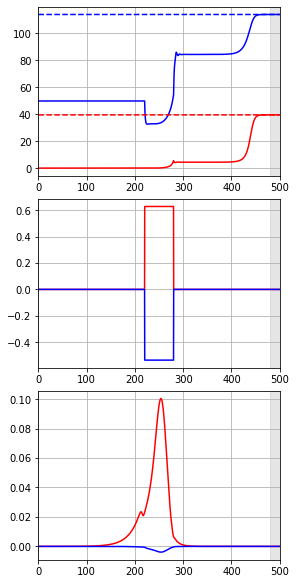

uncontrolled cost :  779.6432321693527
cost splitting :  4.299424046984441e-07 [11.84352029  8.60832045]
-------  65 0.5000000000000002 0.6500000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  84.83866769659465
RUN  2 , total integrated cost =  69.21366769659468
RUN  3 , total integrated cost =  68.57890207159456
RUN  4 , total integrated cost =  68.53922922003224
RUN  5 , total integrated cost =  68.53875238287385
RUN  6 , total integrated cost =  68.53873603009053
RUN  7 , total integrated cost =  68.53873603009053
Control only changes marginally.
RUN  7 , total integrated cost =  68.53873603009053
Improved over  7  iterations in  2.1939861440332606  seconds by  77.8792180654462  percent.


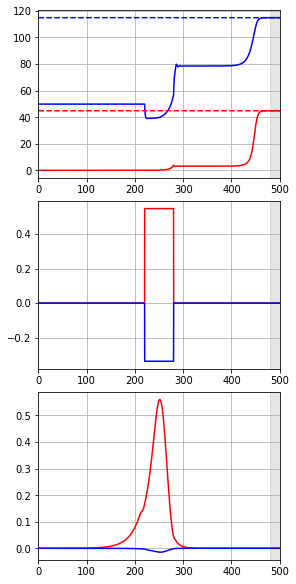

uncontrolled cost :  1003.5557556832827
cost splitting :  7.698788868302713e-07 [8.99699942 3.41111584]
-------  66 0.5250000000000001 0.6500000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  59.83866769659463
RUN  2 , total integrated cost =  58.178511446594754
RUN  3 , total integrated cost =  58.08695871221945
RUN  4 , total integrated cost =  58.08371621954393
RUN  5 , total integrated cost =  58.08356124746777
RUN  6 , total integrated cost =  58.08355609620126
RUN  7 , total integrated cost =  49.123011595951624
RUN  8 , total integrated cost =  35.793035786383314
RUN  9 , total integrated cost =  35.10944165437163
RUN  10 , total integrated cost =  35.09876049773762
RUN  10 , total integrated cost =  35.09876049773762
Improved over  10  iterations in  3.363949651014991  seconds by  88.67192375997834

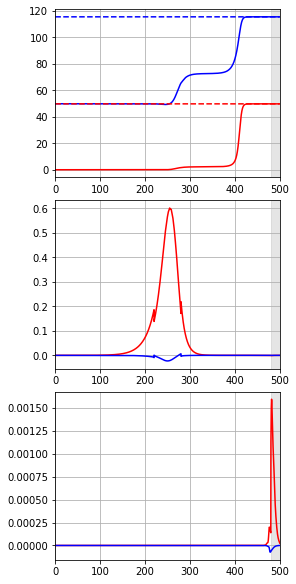

uncontrolled cost :  1237.1014764099714
cost splitting :  0.0022582415561910587 [5.76500358 0.00652977]
-------  67 0.5500000000000003 0.6500000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  47.33866769659453
RUN  2 , total integrated cost =  30.151167696594555
RUN  3 , total integrated cost =  29.71171457159452
RUN  4 , total integrated cost =  29.70027047979768
RUN  5 , total integrated cost =  29.700067826347688
RUN  6 , total integrated cost =  29.70006386656471
RUN  7 , total integrated cost =  29.70006243056855
RUN  8 , total integrated cost =  29.70006243056855
Control only changes marginally.
RUN  8 , total integrated cost =  29.70006243056855
Improved over  8  iterations in  2.654906459036283  seconds by  90.41434606875733  percent.


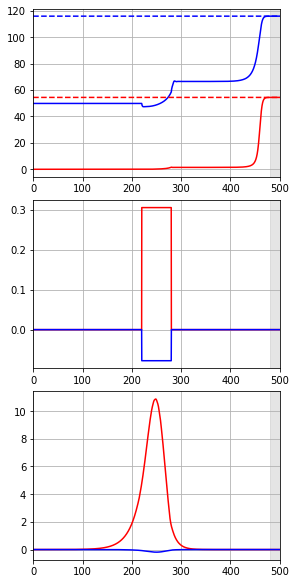

uncontrolled cost :  1480.6481391436553
cost splitting :  3.7689190780667154e-05 [2.80118682 0.18184832]
-------  68 0.5750000000000002 0.6500000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  14.526167696594557
RUN  3 , total integrated cost =  12.158003634094687
RUN  4 , total integrated cost =  12.072172945618128
RUN  5 , total integrated cost =  12.068328446830915
RUN  6 , total integrated cost =  12.068222539362894
RUN  7 , total integrated cost =  12.068220941424602
RUN  8 , total integrated cost =  12.068218772504052
RUN  9 , total integrated cost =  12.068217160402
RUN  10 , total integrated cost =  12.068214981865378
RUN  10 , total integrated cost =  12.068214981865378
Improved over  10  iterations in  2.8949104190105572  seconds by  96.1050003

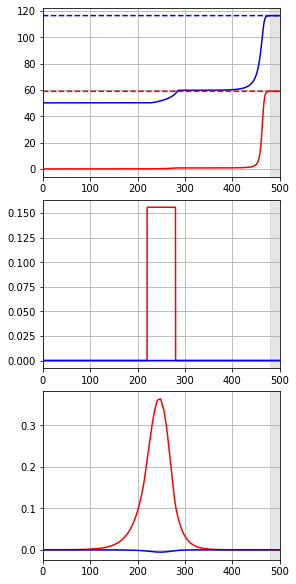

uncontrolled cost :  1733.2138872070445
cost splitting :  0.0001775948059999426 [7.28207869e-01 5.24418746e-15]
-------  69 0.4250000000000001 0.6750000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  131.71366769659465
RUN  2 , total integrated cost =  130.981245823059
RUN  3 , total integrated cost =  130.9740207592828
RUN  4 , total integrated cost =  130.97395554950205
RUN  5 , total integrated cost =  130.9739255972478
RUN  6 , total integrated cost =  130.97387176453404
RUN  7 , total integrated cost =  130.97383920331447
RUN  8 , total integrated cost =  130.97377589460518
RUN  9 , total integrated cost =  130.97374868697312
RUN  10 , total integrated cost =  130.97369738841556
RUN  10 , total integrated cost =  130.97369738841556
Improved over  10  iterations in  2.796962802996859  seconds by  57.72

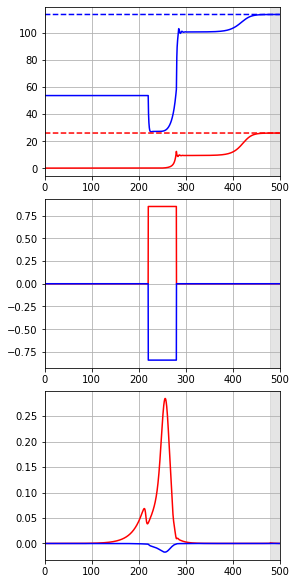

uncontrolled cost :  337.479567507888
cost splitting :  0.0016176206503733478 [21.68561282 21.20097692]
-------  70 0.4500000000000001 0.6750000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  122.33866769659441
RUN  2 , total integrated cost =  111.40116769659454
RUN  3 , total integrated cost =  111.21806222784429
RUN  4 , total integrated cost =  111.21577341049317
RUN  5 , total integrated cost =  111.2157479293492
RUN  6 , total integrated cost =  110.68323995879416
RUN  7 , total integrated cost =  108.14417745872792
RUN  8 , total integrated cost =  107.96107198997325
RUN  9 , total integrated cost =  107.95878329633554
RUN  10 , total integrated cost =  107.95878067025478
RUN  10 , total integrated cost =  107.95878067025478
Improved over  10  iterations in  3.7492325380444527  seconds by  65.156453

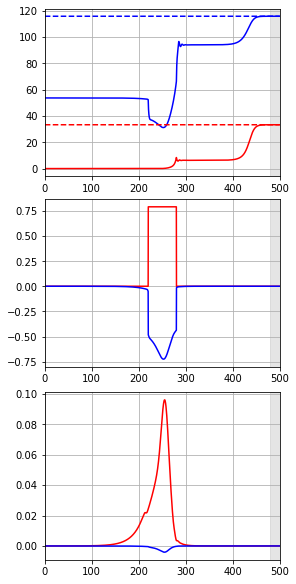

uncontrolled cost :  555.4524528078139
cost splitting :  2.686507174873438e-05 [18.70843702 10.94626104]
-------  71 0.47500000000000014 0.6750000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  103.588667696594
RUN  2 , total integrated cost =  95.77616769659404
RUN  3 , total integrated cost =  95.76243478643804
RUN  4 , total integrated cost =  95.76207715856899
RUN  5 , total integrated cost =  95.76206422437471
RUN  6 , total integrated cost =  95.76206422437471
Control only changes marginally.
RUN  6 , total integrated cost =  95.76206422437471
Improved over  6  iterations in  2.3075119700515643  seconds by  69.09292667171279  percent.


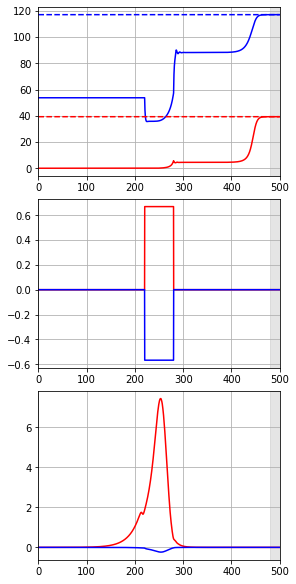

uncontrolled cost :  771.6969104453199
cost splitting :  9.537000101458223e-06 [13.41326509  9.66580636]
-------  72 0.5000000000000002 0.6750000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  84.83866769659465
RUN  2 , total integrated cost =  79.76054269659475
RUN  3 , total integrated cost =  79.41874582159481
RUN  4 , total integrated cost =  79.41588479864552
RUN  5 , total integrated cost =  79.4158132967495
RUN  6 , total integrated cost =  79.4158132967495
Control only changes marginally.
RUN  6 , total integrated cost =  79.4158132967495
Improved over  6  iterations in  1.8420470380224288  seconds by  74.36865647301443  percent.


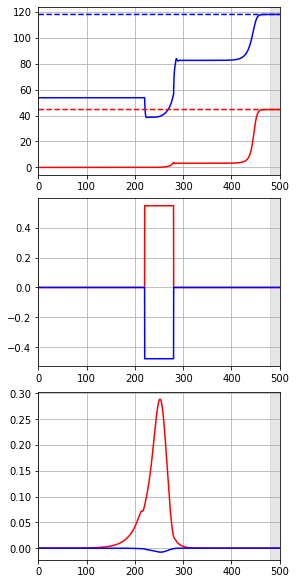

uncontrolled cost :  995.4164939619873
cost splitting :  4.7355548512020593e-07 [8.99699942 6.84369745]
-------  73 0.5250000000000001 0.6750000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  66.0886676965949
RUN  2 , total integrated cost =  61.79179269659459
RUN  3 , total integrated cost =  61.65751535284477
RUN  4 , total integrated cost =  61.65293771612595
RUN  5 , total integrated cost =  61.65260393011531
RUN  6 , total integrated cost =  61.652592248360094
RUN  7 , total integrated cost =  61.652592248360094
Control only changes marginally.
RUN  7 , total integrated cost =  61.652592248360094
Improved over  7  iterations in  2.2479058069875464  seconds by  80.10171141429883  percent.


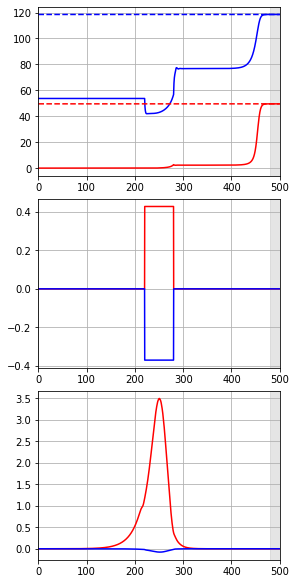

uncontrolled cost :  1228.7327114182663
cost splitting :  4.783477310645231e-06 [5.45964    4.09216218]
-------  74 0.5500000000000003 0.6750000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  47.33866769659453
RUN  2 , total integrated cost =  41.86991769659461
RUN  3 , total integrated cost =  41.50370675909464
RUN  4 , total integrated cost =  41.48997384893838
RUN  5 , total integrated cost =  41.489353960632656
RUN  6 , total integrated cost =  41.48932744672524
RUN  7 , total integrated cost =  41.48932744672524
Control only changes marginally.
RUN  7 , total integrated cost =  41.48932744672524
Improved over  7  iterations in  1.6765047650551423  seconds by  86.60937714612396  percent.


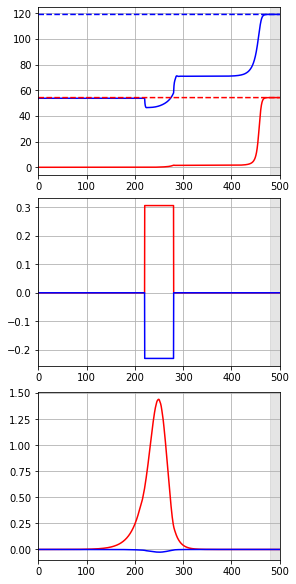

uncontrolled cost :  1472.0503179189525
cost splitting :  6.1636502026266624e-06 [2.80118682 1.5877608 ]
-------  75 0.5750000000000002 0.6750000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  28.588667696594555
RUN  2 , total integrated cost =  16.08866769659456
RUN  3 , total integrated cost =  15.868941134094577
RUN  4 , total integrated cost =  15.867067315279714
RUN  5 , total integrated cost =  15.867046964609616
RUN  6 , total integrated cost =  15.867013984544245
RUN  7 , total integrated cost =  15.866996066083054
RUN  8 , total integrated cost =  15.866956400092134
RUN  9 , total integrated cost =  15.866937462572825
RUN  10 , total integrated cost =  15.86689497940718
RUN  10 , total integrated cost =  15.86689497940718
Improved over  10  iterations in  3.1688061919994652  seconds by  94.8789816

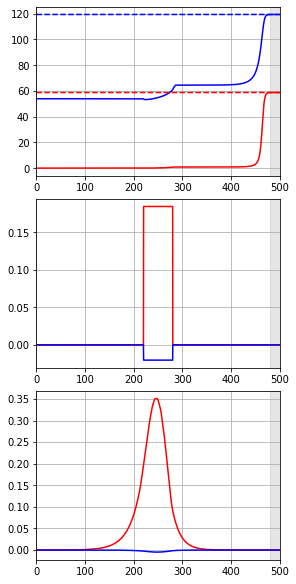

uncontrolled cost :  1724.7914491906026
cost splitting :  0.0005057114909772655 [1.02164119 0.0123642 ]
-------  76 0.4250000000000001 0.7000000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  141.08866769659343
RUN  2 , total integrated cost =  136.7917926965941
RUN  3 , total integrated cost =  136.59648019918578
RUN  4 , total integrated cost =  136.585879220778
RUN  5 , total integrated cost =  120.82930388215885
RUN  6 , total integrated cost =  112.23482116160842
RUN  7 , total integrated cost =  111.69767161237081
RUN  8 , total integrated cost =  111.6870556592142
RUN  9 , total integrated cost =  111.67488293076205
RUN  10 , total integrated cost =  111.67471621988052
RUN  10 , total integrated cost =  111.67471621988052
Improved over  10  iterations in  3.784166172030382  seconds by  63.9571403239

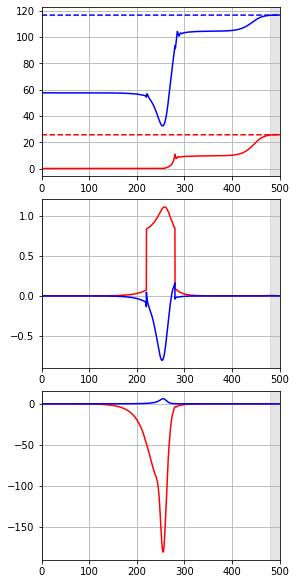

uncontrolled cost :  329.04521873539363
cost splitting :  0.05245275037028175 [28.56609686  6.5110881 ]
-------  77 0.4500000000000001 0.7000000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  122.33866769659441
RUN  2 , total integrated cost =  121.65507394659396
RUN  3 , total integrated cost =  121.62760812628196
RUN  4 , total integrated cost =  121.6261776148403
RUN  5 , total integrated cost =  121.62612009138856
RUN  6 , total integrated cost =  121.62612009138856
Control only changes marginally.
RUN  6 , total integrated cost =  121.62612009138856
Improved over  6  iterations in  1.564693458029069  seconds by  60.74533853518592  percent.


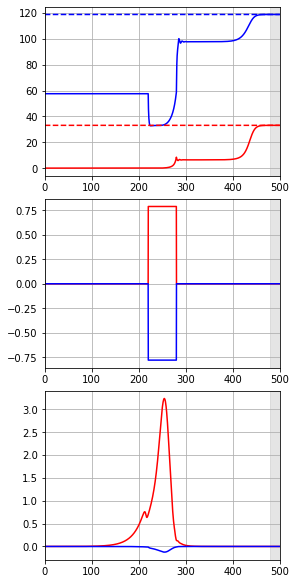

uncontrolled cost :  547.9805088984016
cost splitting :  4.162199157980342e-05 [18.70843702 18.27511376]
-------  78 0.47500000000000014 0.7000000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  109.83866769659345
RUN  2 , total integrated cost =  100.46366769659386
RUN  3 , total integrated cost =  100.12187082159397
RUN  4 , total integrated cost =  100.11271554815644
RUN  5 , total integrated cost =  100.11231023671257
RUN  6 , total integrated cost =  100.11230738040133
RUN  7 , total integrated cost =  100.11230738040133
Control only changes marginally.
RUN  7 , total integrated cost =  100.11230738040133
Improved over  7  iterations in  2.1453150910092518  seconds by  67.68889173044246  percent.


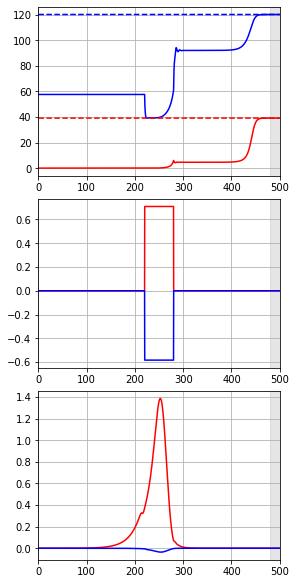

uncontrolled cost :  764.21978919591
cost splitting :  2.4706870523822308e-06 [15.08066615 10.21202423]
-------  79 0.5000000000000002 0.7000000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  97.3386676965942
RUN  2 , total integrated cost =  73.9011676965942
RUN  3 , total integrated cost =  72.82694894659414
RUN  4 , total integrated cost =  72.75370675909434
RUN  5 , total integrated cost =  72.74836618292251
RUN  6 , total integrated cost =  72.74831849964099
RUN  7 , total integrated cost =  72.74831690639473
RUN  8 , total integrated cost =  72.74831690639473
Control only changes marginally.
RUN  8 , total integrated cost =  72.74831690639473
Improved over  8  iterations in  1.8296366120921448  seconds by  76.52058167974292  percent.


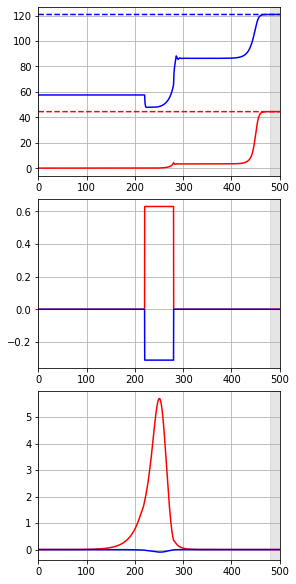

uncontrolled cost :  987.7747943519569
cost splitting :  5.360824327375099e-06 [11.84352029  2.89898706]
-------  80 0.5250000000000001 0.7000000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  72.33866769659429
RUN  2 , total integrated cost =  63.74491769659455
RUN  3 , total integrated cost =  63.305464571594484
RUN  4 , total integrated cost =  63.30012399542262
RUN  5 , total integrated cost =  63.29998094469788
RUN  6 , total integrated cost =  63.29997910652154
RUN  7 , total integrated cost =  63.21249371216893
RUN  8 , total integrated cost =  62.48007183716879
RUN  9 , total integrated cost =  62.45718365357502
RUN  10 , total integrated cost =  62.45665913270097
RUN  10 , total integrated cost =  62.45665913270097
Improved over  10  iterations in  3.292649404029362  seconds by  79.84219994327475 

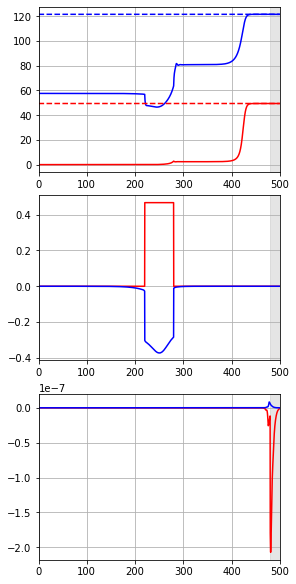

uncontrolled cost :  1220.8433126041011
cost splitting :  2.663224145071029e-11 [6.54110356 3.45511735]
-------  81 0.5500000000000003 0.7000000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  59.83866769659463
RUN  2 , total integrated cost =  31.250000000000004
RUN  3 , total integrated cost =  29.467573946594438
RUN  4 , total integrated cost =  29.211425781250004
RUN  5 , total integrated cost =  29.20598983764649
RUN  6 , total integrated cost =  29.20590806596158
RUN  7 , total integrated cost =  29.20590632456348
RUN  8 , total integrated cost =  29.20590632456348
Control only changes marginally.
RUN  8 , total integrated cost =  29.20590632456348
Improved over  8  iterations in  2.140732559026219  seconds by  90.5738342661727  percent.


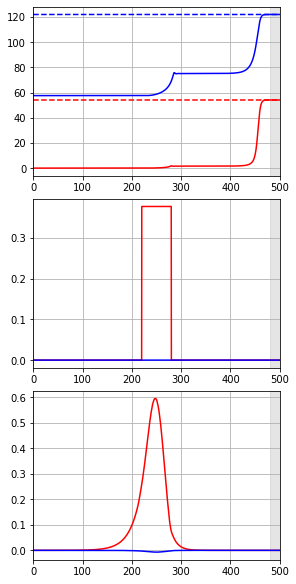

uncontrolled cost :  1463.94854782607
cost splitting :  2.4207742810730985e-06 [4.26492476e+00 4.26216598e-17]
-------  82 0.5750000000000002 0.7000000000000004
set cost params:  0.05 0.0 10.0
interpolate adjoint :  True True True
initial cost =  309.8386676965948
RUN  0 , total integrated cost =  309.8386676965948
Gradient descend method:  None
RUN  1 , total integrated cost =  34.83866769659462
RUN  2 , total integrated cost =  17.65116769659462
RUN  3 , total integrated cost =  16.758528536438508
RUN  4 , total integrated cost =  16.706848144531193
RUN  5 , total integrated cost =  16.702365875244162
RUN  6 , total integrated cost =  16.70174598695896
RUN  7 , total integrated cost =  16.701723168943587
RUN  8 , total integrated cost =  16.701722650296905
RUN  9 , total integrated cost =  16.701722650296905
Control only changes marginally.
RUN  9 , total integrated cost =  16.701722650296905
Improved over  9  iterations in  2.6353695180732757  seconds by  94.60954219353543  percent.

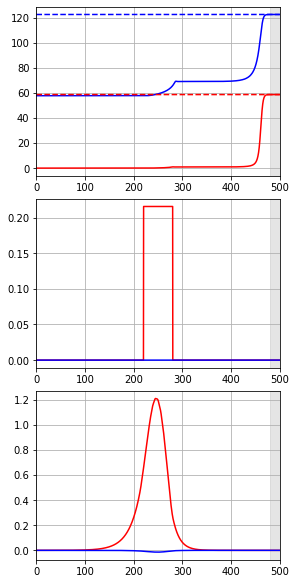

uncontrolled cost :  1716.6770456793977
cost splitting :  3.674666303030487e-05 [1.39473738e+00 4.26266399e-17]


In [47]:
cgv = None
j = 0

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    aln.params.duration = dur
    setinit(initVars[i], aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[i][0]
    target_[:,1,:] = target[i][1]

    control0 = aln.getZeroControl()
    cost.setParams(wp, 0., 10.)
    max_it = int(10)

    control0[0,0,2200:2800] = 2.
    control0[0,1,2200:2800] = -2.

    bestControl_[i], bestState_[i], cost_[i], runtime_, grad_, phi_, phi1_, costnode_[i] = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if True:
        plot_time_array = np.arange(0.,round(dur+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[i][0]
        target_[:,1,:] = target[i][1]

        fig, ax = plt.subplots(3,1, constrained_layout=True, figsize = (4,8) )
        ax[1].plot(plot_time_array, bestControl_[i][0,0,n_pre-1:-n_post+1], color = 'red')
        ax[0].plot(plot_time_array, bestState_[i][0,0,n_pre-1:-n_post+1], color= 'red')
        ax[1].plot(plot_time_array, bestControl_[i][0,1,n_pre-1:-n_post+1], color = 'blue')
        ax[0].plot(plot_time_array, bestState_[i][0,1,n_pre-1:-n_post+1], color= 'blue')
        ax[0].plot(plot_time_array, target_[0,0,n_pre-1:-n_post+1], linestyle = '--', color='red')
        ax[0].plot(plot_time_array, target_[0,1,n_pre-1:-n_post+1], linestyle = '--', color='blue')


        ax[2].plot(plot_time_array, phi_[0,0,:], color = 'red')
        ax[2].plot(plot_time_array, phi_[0,1,:], color = 'blue')
        for k in range(3):
            ax[k].set_xlim(0.,dur)
            ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[i][0][0][0], costnode_[i][ind_cost][0][:2])    

-------  0 0.4000000000000001 0.3500000000000001
set cost params:  0.05 0.037005397869027415 0.0
interpolate adjoint :  True True True
initial cost =  8.881295488566346
RUN  0 , total integrated cost =  8.881295488566346
Gradient descend method:  None
RUN  1 , total integrated cost =  8.881295488566346
Control only changes marginally.
RUN  1 , total integrated cost =  8.881295488566346
Improved over  1  iterations in  24.76374417403713  seconds by  0.0  percent.
cost splitting :  9.785531520490149e-18 [120. 120.]


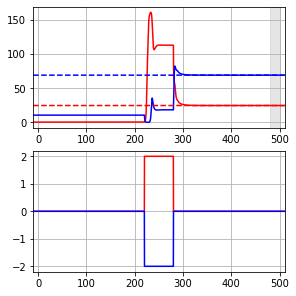

-------  1 0.4250000000000001 0.3500000000000001
set cost params:  0.05 7870.405672392111 0.0
interpolate adjoint :  True True True
initial cost =  486.66423552321334
RUN  0 , total integrated cost =  486.66423552321334
Gradient descend method:  None
RUN  1 , total integrated cost =  486.66423552321334
Control only changes marginally.
RUN  1 , total integrated cost =  486.66423552321334
Improved over  1  iterations in  0.6614132649847306  seconds by  0.0  percent.
cost splitting :  0.0009843004787278582 [0.02447934 0.03735536]


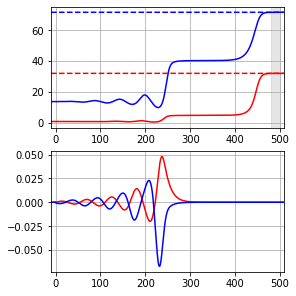

-------  2 0.4000000000000001 0.3750000000000001
set cost params:  0.05 0.8203181274511655 0.0
interpolate adjoint :  True True True
initial cost =  196.8642297159884
RUN  0 , total integrated cost =  196.8642297159884
Gradient descend method:  None
RUN  1 , total integrated cost =  196.8642297159884
Control only changes marginally.
RUN  1 , total integrated cost =  196.8642297159884
Improved over  1  iterations in  1.9522639460046776  seconds by  0.0  percent.
cost splitting :  3.910008357661312e-15 [119.99759969 119.98762449]


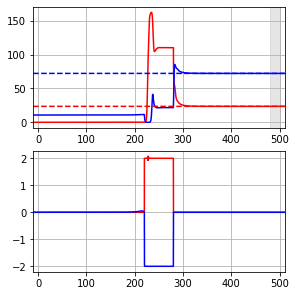

-------  3 0.4250000000000001 0.3750000000000001
set cost params:  0.05 645.2333245688269 0.0
interpolate adjoint :  True True True
initial cost =  198.67569497824934
RUN  0 , total integrated cost =  198.67569497824934
Gradient descend method:  None
RUN  1 , total integrated cost =  198.67569497824934
Control only changes marginally.
RUN  1 , total integrated cost =  198.67569497824934
Improved over  1  iterations in  0.6779655530117452  seconds by  0.0  percent.
cost splitting :  0.0003262522257038866 [0.1119254  0.19598752]


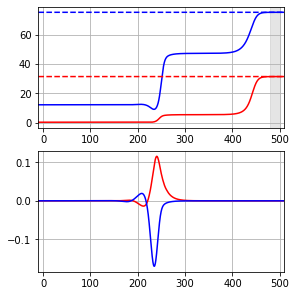

-------  4 0.4500000000000001 0.3750000000000001
set cost params:  0.05 6047.462322778198 0.0
interpolate adjoint :  True True True
initial cost =  372.40525659761386
RUN  0 , total integrated cost =  372.40525659761386
Gradient descend method:  None
RUN  1 , total integrated cost =  372.40525659761386
Control only changes marginally.
RUN  1 , total integrated cost =  372.40525659761386
Improved over  1  iterations in  0.7112663570442237  seconds by  0.0  percent.
cost splitting :  0.0011209421056553462 [0.02794094 0.03363947]


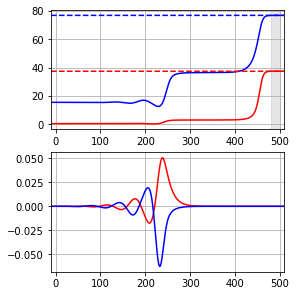

-------  5 0.4000000000000001 0.40000000000000013
set cost params:  0.05 0.004559402373603612 0.0
interpolate adjoint :  True True True
initial cost =  1.0942565696649114
RUN  0 , total integrated cost =  1.0942565696649114
Gradient descend method:  None
RUN  1 , total integrated cost =  1.0942565696649114
Control only changes marginally.
RUN  1 , total integrated cost =  1.0942565696649114
Improved over  1  iterations in  1.7609870900050737  seconds by  0.0  percent.
cost splitting :  1.1079570004197824e-12 [120. 120.]


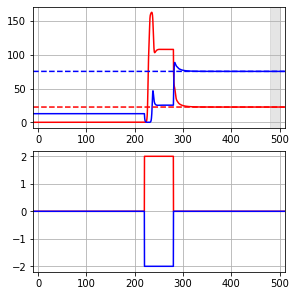

-------  6 0.4250000000000001 0.40000000000000013
set cost params:  0.05 471.2049771286004 0.0
interpolate adjoint :  True True True
initial cost =  409.93499438243316
RUN  0 , total integrated cost =  409.93499438243316
Gradient descend method:  None
RUN  1 , total integrated cost =  409.93499438243316
Control only changes marginally.
RUN  1 , total integrated cost =  409.93499438243316
Improved over  1  iterations in  0.6982832229696214  seconds by  0.0  percent.
cost splitting :  1.2385576086615927e-05 [0.30622186 0.56374983]


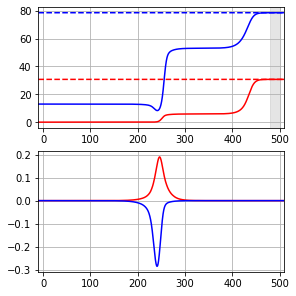

-------  7 0.4500000000000001 0.40000000000000013
set cost params:  0.05 1930.3605318685904 0.0
interpolate adjoint :  True True True
initial cost =  637.8340693601363
RUN  0 , total integrated cost =  637.8340693601363
Gradient descend method:  None
RUN  1 , total integrated cost =  637.8340693601363
Control only changes marginally.
RUN  1 , total integrated cost =  637.8340693601363
Improved over  1  iterations in  0.7246399219729938  seconds by  0.0  percent.
cost splitting :  0.00018061912835827003 [0.13329303 0.19712922]


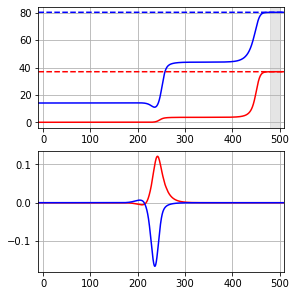

-------  8 0.47500000000000014 0.40000000000000013
set cost params:  0.05 15786.752838651508 0.0
interpolate adjoint :  True True True
initial cost =  594.5084134888903
RUN  0 , total integrated cost =  594.5084134888903
Gradient descend method:  None
RUN  1 , total integrated cost =  594.5084134888903
Control only changes marginally.
RUN  1 , total integrated cost =  594.5084134888903
Improved over  1  iterations in  0.6973082270123996  seconds by  0.0  percent.
cost splitting :  0.02084824107162798 [0.02129413 0.01636449]


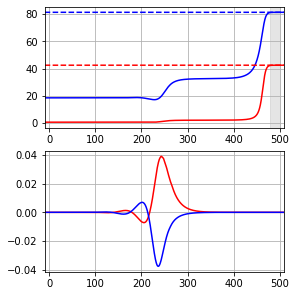

-------  9 0.4000000000000001 0.42500000000000016
set cost params:  0.05 0.10557307434930492 0.0
interpolate adjoint :  True True True
initial cost =  25.331186154064536
RUN  0 , total integrated cost =  25.331186154064536
Gradient descend method:  None
RUN  1 , total integrated cost =  25.331186154064536
Control only changes marginally.
RUN  1 , total integrated cost =  25.331186154064536
Improved over  1  iterations in  1.1296453349641524  seconds by  0.0  percent.
cost splitting :  3.070468722664188e-10 [119.99557347 119.94426261]


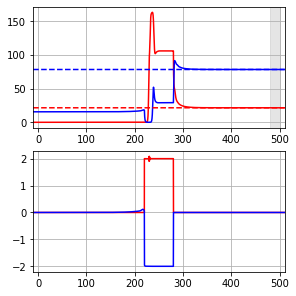

-------  10 0.4250000000000001 0.42500000000000016
set cost params:  0.05 208.54662776419877 0.0
interpolate adjoint :  True True True
initial cost =  397.5562303966647
RUN  0 , total integrated cost =  397.5562303966647
Gradient descend method:  None
RUN  1 , total integrated cost =  397.5562303966647
Control only changes marginally.
RUN  1 , total integrated cost =  397.5562303966647
Improved over  1  iterations in  0.6393398009822704  seconds by  0.0  percent.
cost splitting :  0.00019691366115779467 [0.66065239 1.24566576]


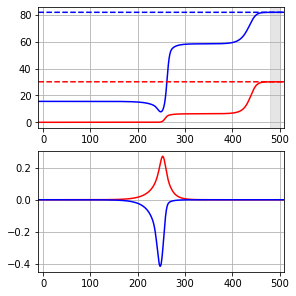

-------  11 0.4500000000000001 0.42500000000000016
set cost params:  0.05 605.916432952016 0.0
interpolate adjoint :  True True True
initial cost =  582.841125752709
RUN  0 , total integrated cost =  582.841125752709
Gradient descend method:  None
RUN  1 , total integrated cost =  582.841125752709
Control only changes marginally.
RUN  1 , total integrated cost =  582.841125752709
Improved over  1  iterations in  0.7452447959803976  seconds by  0.0  percent.
cost splitting :  5.9816231588802346e-05 [0.36841691 0.59349977]


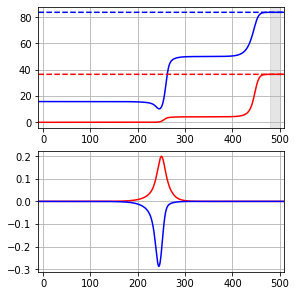

-------  12 0.47500000000000014 0.42500000000000016
set cost params:  0.05 1498.762095967632 0.0
interpolate adjoint :  True True True
initial cost =  484.0979597786415
RUN  0 , total integrated cost =  484.0979597786415
Gradient descend method:  None
RUN  1 , total integrated cost =  484.0979597786415
Control only changes marginally.
RUN  1 , total integrated cost =  484.0979597786415
Improved over  1  iterations in  0.5254074279800989  seconds by  0.0  percent.
cost splitting :  0.00046647269777858367 [0.15450267 0.16849585]


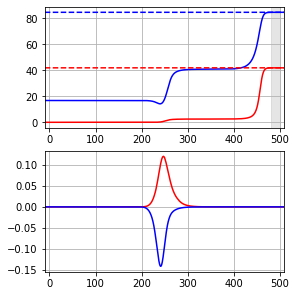

-------  13 0.4000000000000001 0.4500000000000002
set cost params:  0.05 0.15431325659476444 0.0
interpolate adjoint :  True True True
initial cost =  35.376593303674
RUN  0 , total integrated cost =  35.376593303674
Gradient descend method:  None
RUN  1 , total integrated cost =  35.376593303674
Control only changes marginally.
RUN  1 , total integrated cost =  35.376593303674
Improved over  1  iterations in  0.7376695470302366  seconds by  0.0  percent.
cost splitting :  8.174844382568232e-08 [119.99915176 109.25265771]


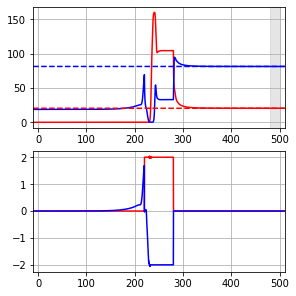

-------  14 0.4250000000000001 0.4500000000000002
set cost params:  0.05 46.60762686361958 0.0
interpolate adjoint :  True True True
initial cost =  159.50153475983535
RUN  0 , total integrated cost =  159.50153475983535
Gradient descend method:  None
RUN  1 , total integrated cost =  159.50153475983535
Control only changes marginally.
RUN  1 , total integrated cost =  159.50153475983535
Improved over  1  iterations in  0.48087426798883826  seconds by  0.0  percent.
cost splitting :  0.0004328078685047795 [1.19943769 2.22278145]


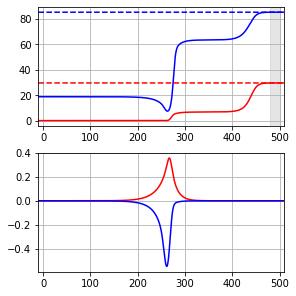

-------  15 0.4500000000000001 0.4500000000000002
set cost params:  0.05 282.736145239001 0.0
interpolate adjoint :  True True True
initial cost =  579.2233502042254
RUN  0 , total integrated cost =  579.2233502042254
Gradient descend method:  None
RUN  1 , total integrated cost =  579.2233502042254
Control only changes marginally.
RUN  1 , total integrated cost =  579.2233502042254
Improved over  1  iterations in  0.4305194700136781  seconds by  0.0  percent.
cost splitting :  4.199425696433884e-05 [0.7829891  1.26564656]


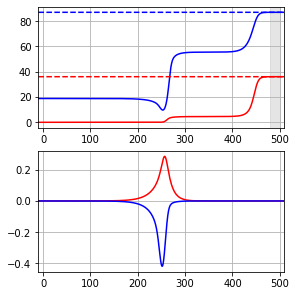

-------  16 0.47500000000000014 0.4500000000000002
set cost params:  0.05 789.2779966471505 0.0
interpolate adjoint :  True True True
initial cost =  776.7301559259646
RUN  0 , total integrated cost =  776.7301559259646
Gradient descend method:  None
RUN  1 , total integrated cost =  776.7301559259646
Control only changes marginally.
RUN  1 , total integrated cost =  776.7301559259646
Improved over  1  iterations in  0.36856203305069357  seconds by  0.0  percent.
cost splitting :  0.000125234641338356 [0.44814524 0.53595688]


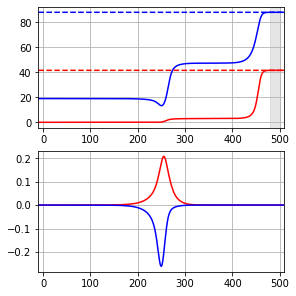

-------  17 0.5000000000000002 0.4500000000000002
set cost params:  0.05 2983.8726712427538 0.0
interpolate adjoint :  True True True
initial cost =  704.6679282753303
RUN  0 , total integrated cost =  704.6679282753303
Gradient descend method:  None
RUN  1 , total integrated cost =  704.6679282753303
Control only changes marginally.
RUN  1 , total integrated cost =  704.6679282753303
Improved over  1  iterations in  0.3920945990248583  seconds by  0.0  percent.
cost splitting :  0.007494933854076099 [0.14338966 0.09276906]


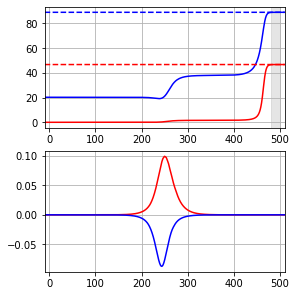

-------  18 0.4000000000000001 0.4750000000000002
set cost params:  0.05 0.13302548587167706 0.0
interpolate adjoint :  True True True
initial cost =  31.615277589821694
RUN  0 , total integrated cost =  31.615277589821694
Gradient descend method:  None
RUN  1 , total integrated cost =  31.615277589821694
Control only changes marginally.
RUN  1 , total integrated cost =  31.615277589821694
Improved over  1  iterations in  0.6631279099965468  seconds by  0.0  percent.
cost splitting :  3.398500555519359e-05 [119.99851755 117.66478196]


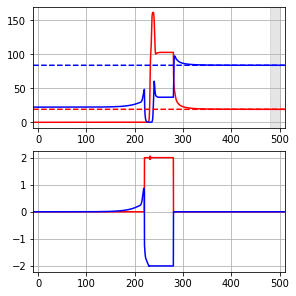

-------  19 0.4250000000000001 0.4750000000000002
set cost params:  0.05 75.03406089480151 0.0
interpolate adjoint :  True True True
initial cost =  401.3792717984016
RUN  0 , total integrated cost =  401.3792717984016
Gradient descend method:  None
RUN  1 , total integrated cost =  401.3792717984016
Control only changes marginally.
RUN  1 , total integrated cost =  401.3792717984016
Improved over  1  iterations in  0.3517530710087158  seconds by  0.0  percent.
cost splitting :  0.00022125729029918921 [1.91888383 3.43041029]


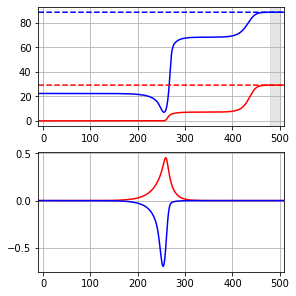

-------  20 0.4500000000000001 0.4750000000000002
set cost params:  0.05 59.97497461171341 0.0
interpolate adjoint :  True True True
initial cost =  213.009055766483
RUN  0 , total integrated cost =  213.009055766483
Gradient descend method:  None
RUN  1 , total integrated cost =  213.009055766483
Control only changes marginally.
RUN  1 , total integrated cost =  213.009055766483
Improved over  1  iterations in  0.3889057679916732  seconds by  0.0  percent.
cost splitting :  4.452140829419535e-05 [1.38352752 2.16810472]


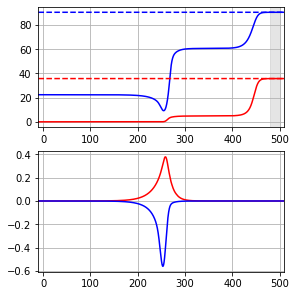

-------  21 0.47500000000000014 0.4750000000000002
set cost params:  0.05 118.9500315570502 0.0
interpolate adjoint :  True True True
initial cost =  243.98934456775658
RUN  0 , total integrated cost =  243.98934456775658
Gradient descend method:  None
RUN  1 , total integrated cost =  243.98934456775658
Control only changes marginally.
RUN  1 , total integrated cost =  243.98934456775658
Improved over  1  iterations in  0.46623191196704283  seconds by  0.0  percent.
cost splitting :  6.811158561932555e-05 [0.93869516 1.11249674]


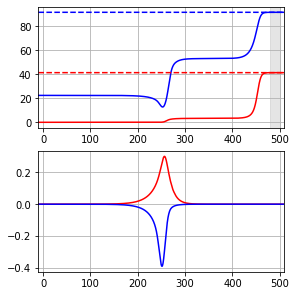

-------  22 0.5000000000000002 0.4750000000000002
set cost params:  0.05 1219.834840417405 0.0
interpolate adjoint :  True True True
initial cost =  1030.154059207891
RUN  0 , total integrated cost =  1030.154059207891
Gradient descend method:  None
RUN  1 , total integrated cost =  1030.154059207891
Control only changes marginally.
RUN  1 , total integrated cost =  1030.154059207891
Improved over  1  iterations in  0.3465355320367962  seconds by  0.0  percent.
cost splitting :  0.0006673043773838745 [0.49713616 0.34736671]


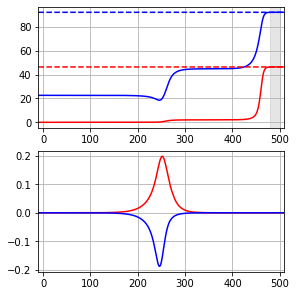

-------  23 0.5250000000000001 0.4750000000000002
set cost params:  0.05 12900.974811974842 0.0
interpolate adjoint :  True True True
initial cost =  794.3317048777409
RUN  0 , total integrated cost =  794.3317048777409
Gradient descend method:  None
RUN  1 , total integrated cost =  794.3317048777409
Control only changes marginally.
RUN  1 , total integrated cost =  794.3317048777409
Improved over  1  iterations in  0.4255924039753154  seconds by  0.0  percent.
cost splitting :  0.7814202309670041 [0.04526778 0.01630064]


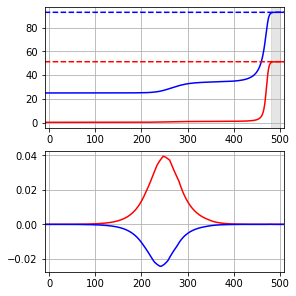

-------  24 0.4000000000000001 0.5000000000000002
set cost params:  0.05 0.440513187194952 0.0
interpolate adjoint :  True True True
initial cost =  104.89589173545947
RUN  0 , total integrated cost =  104.89589173545947
Gradient descend method:  None
RUN  1 , total integrated cost =  104.89589173545947
Control only changes marginally.
RUN  1 , total integrated cost =  104.89589173545947
Improved over  1  iterations in  0.9264780529774725  seconds by  0.0  percent.
cost splitting :  0.09617623949387752 [119.98913324 118.12197438]


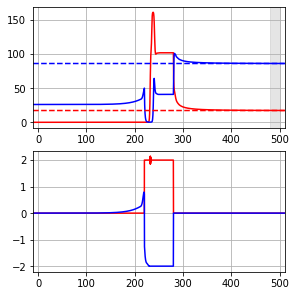

-------  25 0.4250000000000001 0.5000000000000002
set cost params:  0.05 18.704314259858933 0.0
interpolate adjoint :  True True True
initial cost =  142.30078067385824
RUN  0 , total integrated cost =  142.30078067385824
Gradient descend method:  None
RUN  1 , total integrated cost =  142.30078067385824
Control only changes marginally.
RUN  1 , total integrated cost =  142.30078067385824
Improved over  1  iterations in  0.6167264860123396  seconds by  0.0  percent.
cost splitting :  3.074283537767686e-05 [2.80769484 4.80021728]


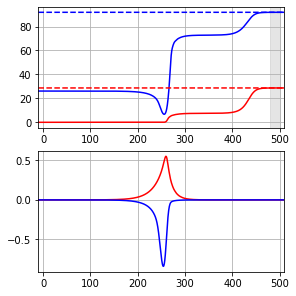

-------  26 0.4500000000000001 0.5000000000000002
set cost params:  0.05 19.941692084998593 0.0
interpolate adjoint :  True True True
initial cost =  107.52957214154789
RUN  0 , total integrated cost =  107.52957214154789
Gradient descend method:  None
RUN  1 , total integrated cost =  107.52957214154789
Control only changes marginally.
RUN  1 , total integrated cost =  107.52957214154789
Improved over  1  iterations in  0.5252710020286031  seconds by  0.0  percent.
cost splitting :  6.252590101179885e-06 [2.13742176 3.25477723]


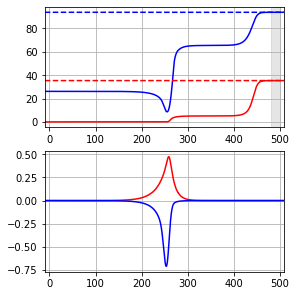

-------  27 0.47500000000000014 0.5000000000000002
set cost params:  0.05 100.95258255342797 0.0
interpolate adjoint :  True True True
initial cost =  349.4637900262406
RUN  0 , total integrated cost =  349.4637900262406
Gradient descend method:  None
RUN  1 , total integrated cost =  349.4637900262406
Control only changes marginally.
RUN  1 , total integrated cost =  349.4637900262406
Improved over  1  iterations in  0.6131408280343749  seconds by  0.0  percent.
cost splitting :  9.367205933395555e-06 [1.66722057 1.79444213]


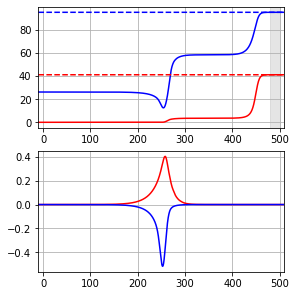

-------  28 0.5000000000000002 0.5000000000000002
set cost params:  0.05 2.417657786318602 0.0
interpolate adjoint :  True True True
initial cost =  580.2378687164799
RUN  0 , total integrated cost =  580.2378687164799
Gradient descend method:  None
RUN  1 , total integrated cost =  580.2378687164799
Control only changes marginally.
RUN  1 , total integrated cost =  580.2378687164799
Improved over  1  iterations in  0.6949758009868674  seconds by  0.0  percent.
cost splitting :  4.5438388140730445e-27 [120. 120.]


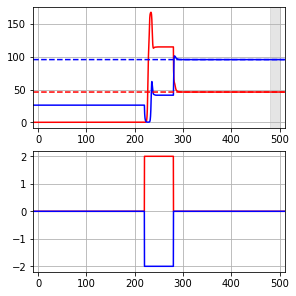

-------  29 0.5250000000000001 0.5000000000000002
set cost params:  0.05 2252.407643352135 0.0
interpolate adjoint :  True True True
initial cost =  1105.5594479550548
RUN  0 , total integrated cost =  1105.5594479550548
Gradient descend method:  None
RUN  1 , total integrated cost =  1105.5594479550548
Control only changes marginally.
RUN  1 , total integrated cost =  1105.5594479550548
Improved over  1  iterations in  0.49013624800136313  seconds by  0.0  percent.
cost splitting :  0.00399932185125645 [0.36082347 0.13001097]


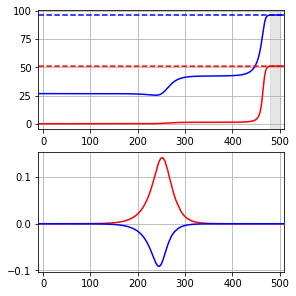

-------  30 0.4250000000000001 0.5250000000000002
set cost params:  0.05 12.084152486861134 0.0
interpolate adjoint :  True True True
initial cost =  125.17476026891003
RUN  0 , total integrated cost =  125.17476026891003
Gradient descend method:  None
RUN  1 , total integrated cost =  125.17476026891003
Control only changes marginally.
RUN  1 , total integrated cost =  125.17476026891003
Improved over  1  iterations in  0.42569228197680786  seconds by  0.0  percent.
cost splitting :  0.027826537061201962 [5.63683774 4.7216354 ]


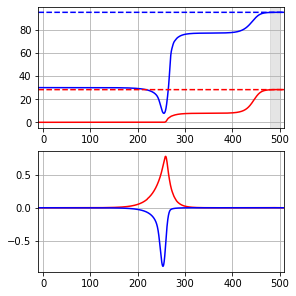

-------  31 0.4500000000000001 0.5250000000000002
set cost params:  0.05 26.860624459935927 0.0
interpolate adjoint :  True True True
initial cost =  201.13663979497127
RUN  0 , total integrated cost =  201.13663979497127
Gradient descend method:  None
RUN  1 , total integrated cost =  201.13663979497127
Control only changes marginally.
RUN  1 , total integrated cost =  201.13663979497127
Improved over  1  iterations in  0.682164048019331  seconds by  0.0  percent.
cost splitting :  2.863073078779414e-05 [3.09578858 4.39237085]


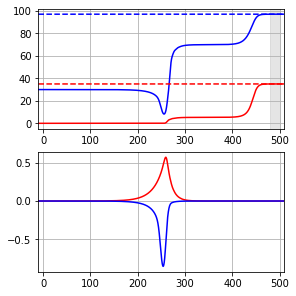

-------  32 0.47500000000000014 0.5250000000000002
set cost params:  0.05 85.0318883750354 0.0
interpolate adjoint :  True True True
initial cost =  436.34853771390823
RUN  0 , total integrated cost =  436.34853771390823
Gradient descend method:  None
RUN  1 , total integrated cost =  436.34853771390823
Control only changes marginally.
RUN  1 , total integrated cost =  436.34853771390823
Improved over  1  iterations in  0.3991946689784527  seconds by  0.0  percent.
cost splitting :  6.133017950471993e-06 [2.59138166 2.54020539]


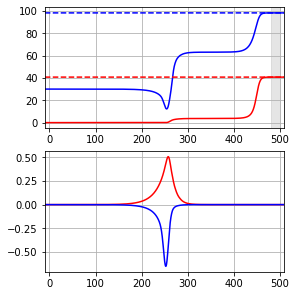

-------  33 0.5000000000000002 0.5250000000000002
set cost params:  0.05 113.1589340519996 0.0
interpolate adjoint :  True True True
initial cost =  337.3534769283505
RUN  0 , total integrated cost =  337.3534769283505
Gradient descend method:  None
RUN  1 , total integrated cost =  337.3534769283505
Control only changes marginally.
RUN  1 , total integrated cost =  337.3534769283505
Improved over  1  iterations in  0.6896421709679998  seconds by  0.0  percent.
cost splitting :  4.238878041770311e-05 [1.94813471 1.03310117]


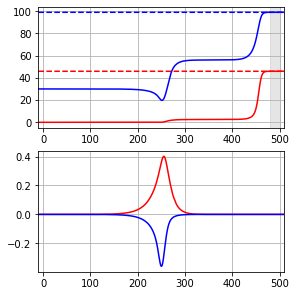

-------  34 0.5250000000000001 0.5250000000000002
set cost params:  0.05 224.37905355980075 0.0
interpolate adjoint :  True True True
initial cost =  264.72436957501327
RUN  0 , total integrated cost =  264.72436957501327
Gradient descend method:  None
RUN  1 , total integrated cost =  264.72436957501327
Control only changes marginally.
RUN  1 , total integrated cost =  264.72436957501327
Improved over  1  iterations in  0.4187240559840575  seconds by  0.0  percent.
cost splitting :  0.0002841859259686166 [0.9028594  0.27694928]


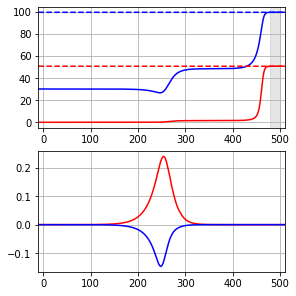

-------  35 0.5500000000000003 0.5250000000000002
set cost params:  0.05 12185.866839053904 0.0
interpolate adjoint :  True True True
initial cost =  872.0365571984181
RUN  0 , total integrated cost =  872.0365571984181
Gradient descend method:  None
RUN  1 , total integrated cost =  872.0328436127229
RUN  2 , total integrated cost =  872.0328436127229
Control only changes marginally.
RUN  2 , total integrated cost =  872.0328436127229
Improved over  2  iterations in  0.9524135689716786  seconds by  0.0004258520660158638  percent.
cost splitting :  1.6623493171407233 [0.06003716 0.01151702]
set cost params:  0.05 6593.541561825769 0.0
interpolate adjoint :  True True True
initial cost =  471.8785863566327
RUN  0 , total integrated cost =  471.8785863566327
Gradient descend method:  None
RUN  1 , total integrated cost =  471.86780955051387
RUN  2 , total integrated cost =  471.86780955051387
Control only changes marginally.
RUN  2 , total integrated cost =  471.86780955051387
Improved o

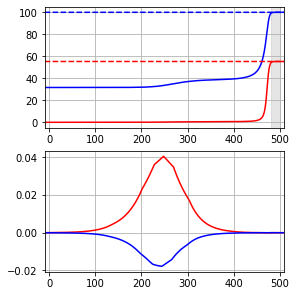

-------  36 0.4250000000000001 0.5500000000000003
set cost params:  0.05 5.445657158464237 0.0
interpolate adjoint :  True True True
initial cost =  69.75411384887744
RUN  0 , total integrated cost =  69.75411384887744
Gradient descend method:  None
RUN  1 , total integrated cost =  69.75411384887744
Control only changes marginally.
RUN  1 , total integrated cost =  69.75411384887744
Improved over  1  iterations in  0.47122289502294734  seconds by  0.0  percent.
cost splitting :  0.00014897322829552137 [5.13537914 7.67374644]


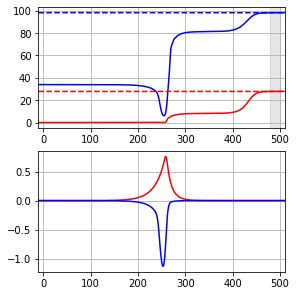

-------  37 0.4500000000000001 0.5500000000000003
set cost params:  0.05 12.425922368124503 0.0
interpolate adjoint :  True True True
initial cost =  121.94241721880492
RUN  0 , total integrated cost =  121.94241721880492
Gradient descend method:  None
RUN  1 , total integrated cost =  121.94241721880492
Control only changes marginally.
RUN  1 , total integrated cost =  121.94241721880492
Improved over  1  iterations in  0.4031532909721136  seconds by  0.0  percent.
cost splitting :  0.0038820920393431145 [5.03566848 4.77786644]


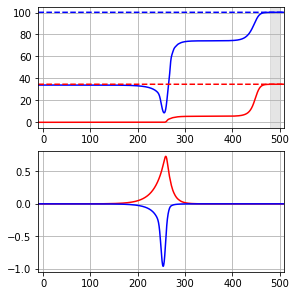

-------  38 0.47500000000000014 0.5500000000000003
set cost params:  0.05 51.62576349218714 0.0
interpolate adjoint :  True True True
initial cost =  360.3884100567337
RUN  0 , total integrated cost =  360.3884100567337
Gradient descend method:  None
RUN  1 , total integrated cost =  360.3884100567337
Control only changes marginally.
RUN  1 , total integrated cost =  360.3884100567337
Improved over  1  iterations in  0.6149025280028582  seconds by  0.0  percent.
cost splitting :  1.3152389067768302e-05 [3.77506718 3.20571887]


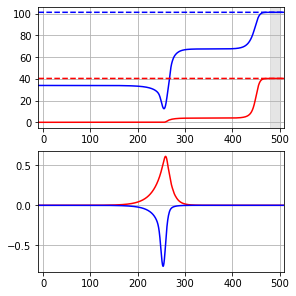

-------  39 0.5000000000000002 0.5500000000000003
set cost params:  0.05 51.90778356460251 0.0
interpolate adjoint :  True True True
initial cost =  224.8505149929386
RUN  0 , total integrated cost =  224.8505149929386
Gradient descend method:  None
RUN  1 , total integrated cost =  224.8505149929386
Control only changes marginally.
RUN  1 , total integrated cost =  224.8505149929386
Improved over  1  iterations in  0.6259448829805478  seconds by  0.0  percent.
cost splitting :  2.474027257782879e-05 [3.10495495 1.22677525]


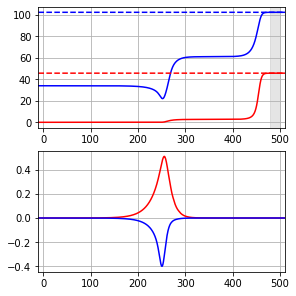

-------  40 0.5250000000000001 0.5500000000000003
set cost params:  0.05 109.23580775382938 0.0
interpolate adjoint :  True True True
initial cost =  221.32850493015826
RUN  0 , total integrated cost =  221.32850493015826
Gradient descend method:  None
RUN  1 , total integrated cost =  221.32850493015826
Control only changes marginally.
RUN  1 , total integrated cost =  221.32850493015826
Improved over  1  iterations in  0.739614344027359  seconds by  0.0  percent.
cost splitting :  0.00018546817913613834 [1.6259349  0.40021843]


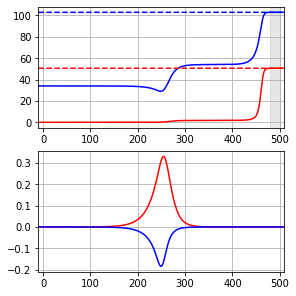

-------  41 0.5500000000000003 0.5500000000000003
set cost params:  0.05 1881.6811956063966 0.0
interpolate adjoint :  True True True
initial cost =  807.6037325725215
RUN  0 , total integrated cost =  807.6037325725215
Gradient descend method:  None
RUN  1 , total integrated cost =  807.6037325725215
Control only changes marginally.
RUN  1 , total integrated cost =  807.6037325725215
Improved over  1  iterations in  0.625467733014375  seconds by  0.0  percent.
cost splitting :  0.035712053829962745 [0.37178098 0.05741072]


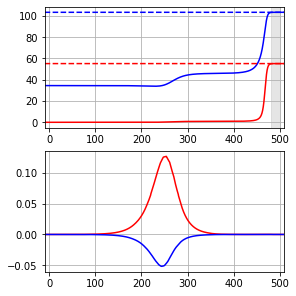

-------  42 0.4250000000000001 0.5750000000000003
set cost params:  0.05 12.790068542002034 0.0
interpolate adjoint :  True True True
initial cost =  227.0527498110281
RUN  0 , total integrated cost =  227.0527498110281
Gradient descend method:  None
RUN  1 , total integrated cost =  227.0527498110281
Control only changes marginally.
RUN  1 , total integrated cost =  227.0527498110281
Improved over  1  iterations in  0.5963158730301075  seconds by  0.0  percent.
cost splitting :  1.4869127585559385 [8.86687001 8.8795872 ]


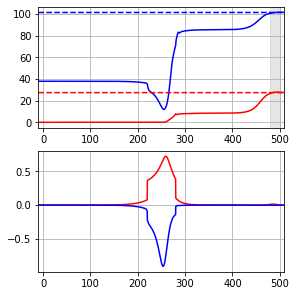

-------  43 0.4500000000000001 0.5750000000000003
set cost params:  0.05 28.320733802333518 0.0
interpolate adjoint :  True True True
initial cost =  349.25973291756276
RUN  0 , total integrated cost =  349.25973291756276
Gradient descend method:  None
RUN  1 , total integrated cost =  349.25973291756276
Control only changes marginally.
RUN  1 , total integrated cost =  349.25973291756276
Improved over  1  iterations in  0.45636883104452863  seconds by  0.0  percent.
cost splitting :  0.010057850678303162 [7.19463144 5.13764894]


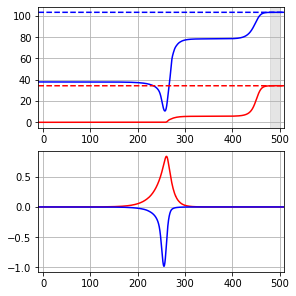

-------  44 0.47500000000000014 0.5750000000000003
set cost params:  0.05 20.734480042329558 0.0
interpolate adjoint :  True True True
initial cost =  185.224532080088
RUN  0 , total integrated cost =  185.224532080088
Gradient descend method:  None
RUN  1 , total integrated cost =  185.224532080088
Control only changes marginally.
RUN  1 , total integrated cost =  185.224532080088
Improved over  1  iterations in  0.6730554059613496  seconds by  0.0  percent.
cost splitting :  5.008823951176198e-06 [5.36189708 3.57126794]


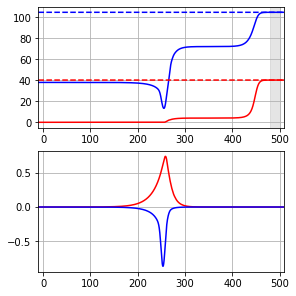

-------  45 0.5000000000000002 0.5750000000000003
set cost params:  0.05 138.9306133572959 0.0
interpolate adjoint :  True True True
initial cost =  796.563737003071
RUN  0 , total integrated cost =  796.563737003071
Gradient descend method:  None
RUN  1 , total integrated cost =  796.563737003071
Control only changes marginally.
RUN  1 , total integrated cost =  796.563737003071
Improved over  1  iterations in  0.4778316789888777  seconds by  0.0  percent.
cost splitting :  2.9218627976393078e-05 [4.42952463 1.30401182]


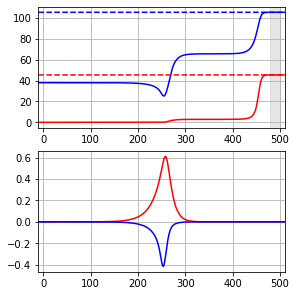

-------  46 0.5250000000000001 0.5750000000000003
set cost params:  0.05 273.9984055958774 0.0
interpolate adjoint :  True True True
initial cost =  805.8416328663164
RUN  0 , total integrated cost =  805.8416328663164
Gradient descend method:  None
RUN  1 , total integrated cost =  805.8416328663164
Control only changes marginally.
RUN  1 , total integrated cost =  805.8416328663164
Improved over  1  iterations in  0.6207133419811726  seconds by  0.0  percent.
cost splitting :  8.287238037726877e-05 [2.51475772 0.42628723]


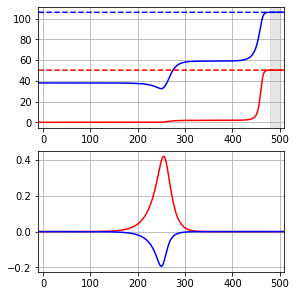

-------  47 0.5500000000000003 0.5750000000000003
set cost params:  0.05 1210.288074645722 0.0
interpolate adjoint :  True True True
initial cost =  1112.5671125643964
RUN  0 , total integrated cost =  1112.5671125643964
Gradient descend method:  None
RUN  1 , total integrated cost =  1112.5671125643964
Control only changes marginally.
RUN  1 , total integrated cost =  1112.5671125643964
Improved over  1  iterations in  0.5835477400105447  seconds by  0.0  percent.
cost splitting :  0.007829949292968163 [0.82008542 0.09917235]


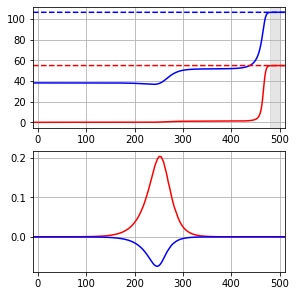

-------  48 0.4250000000000001 0.6000000000000003
set cost params:  0.05 0.2787505255014885 0.0
interpolate adjoint :  True True True
initial cost =  5.153746167271626
RUN  0 , total integrated cost =  5.153746167271626
Gradient descend method:  None
RUN  1 , total integrated cost =  5.153746167271626
Control only changes marginally.
RUN  1 , total integrated cost =  5.153746167271626
Improved over  1  iterations in  0.6339955409639515  seconds by  0.0  percent.
cost splitting :  0.00014492754031323734 [ 8.16992661 10.31878803]


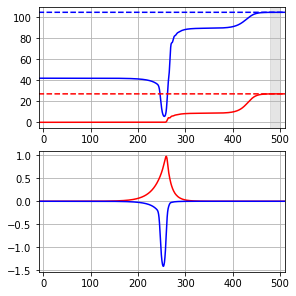

-------  49 0.4500000000000001 0.6000000000000003
set cost params:  0.05 26.222572604593438 0.0
interpolate adjoint :  True True True
initial cost =  385.8658909015172
RUN  0 , total integrated cost =  385.8658909015172
Gradient descend method:  None
RUN  1 , total integrated cost =  385.8658909015172
Control only changes marginally.
RUN  1 , total integrated cost =  385.8658909015172
Improved over  1  iterations in  0.4285986630129628  seconds by  0.0  percent.
cost splitting :  0.002847709821840333 [8.79439363 5.92062897]


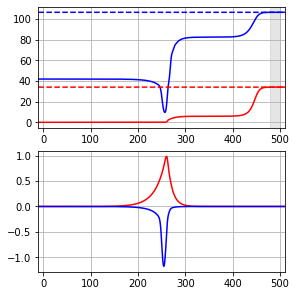

-------  50 0.47500000000000014 0.6000000000000003
set cost params:  0.05 12.281005570648484 0.0
interpolate adjoint :  True True True
initial cost =  135.3450214193285
RUN  0 , total integrated cost =  135.3450214193285
Gradient descend method:  None
RUN  1 , total integrated cost =  135.3450214193285
Control only changes marginally.
RUN  1 , total integrated cost =  135.3450214193285
Improved over  1  iterations in  0.5677942699985579  seconds by  0.0  percent.
cost splitting :  0.0010049207139121866 [8.15642872 2.86424628]


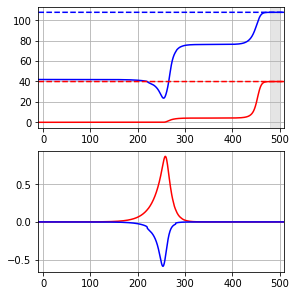

-------  51 0.5000000000000002 0.6000000000000003
set cost params:  0.05 60.90833717511599 0.0
interpolate adjoint :  True True True
initial cost =  431.7156025661306
RUN  0 , total integrated cost =  431.7156025661306
Gradient descend method:  None
RUN  1 , total integrated cost =  431.7156025661306
Control only changes marginally.
RUN  1 , total integrated cost =  431.7156025661306
Improved over  1  iterations in  0.4554257109994069  seconds by  0.0  percent.
cost splitting :  7.577614661236782e-06 [5.90567657 1.18227924]


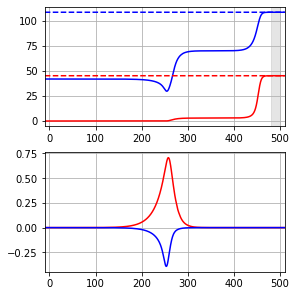

-------  52 0.5250000000000001 0.6000000000000003
set cost params:  0.05 133.29054604970344 0.0
interpolate adjoint :  True True True
initial cost =  514.0368644006128
RUN  0 , total integrated cost =  514.0368644006128
Gradient descend method:  None
RUN  1 , total integrated cost =  514.0368644006128
Control only changes marginally.
RUN  1 , total integrated cost =  514.0368644006128
Improved over  1  iterations in  0.5457897890009917  seconds by  0.0  percent.
cost splitting :  0.0001020411348830748 [3.43195276 0.42456125]


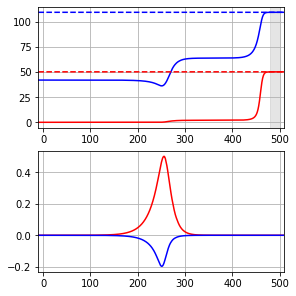

-------  53 0.5500000000000003 0.6000000000000003
set cost params:  0.05 294.0822924637012 0.0
interpolate adjoint :  True True True
initial cost =  431.1075525602414
RUN  0 , total integrated cost =  431.1075525602414
Gradient descend method:  None
RUN  1 , total integrated cost =  431.1075525602414
Control only changes marginally.
RUN  1 , total integrated cost =  431.1075525602414
Improved over  1  iterations in  0.44043338601477444  seconds by  0.0  percent.
cost splitting :  0.0009931334099882588 [1.3429638  0.12297792]


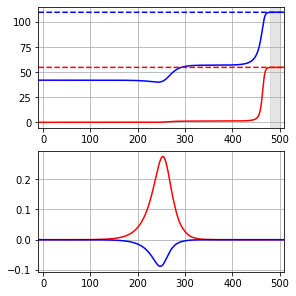

-------  54 0.5750000000000002 0.6000000000000003
set cost params:  0.05 12015.440844555607 0.0
interpolate adjoint :  True True True
initial cost =  1050.6740294754675
RUN  0 , total integrated cost =  1050.6740294754675
Gradient descend method:  None
RUN  1 , total integrated cost =  1050.6668205293233
RUN  2 , total integrated cost =  1050.6668205293233
Control only changes marginally.
RUN  2 , total integrated cost =  1050.6668205293233
Improved over  2  iterations in  0.9298166800290346  seconds by  0.0006861258527379732  percent.
cost splitting :  2.5917397900663643 [0.08159956 0.0058327 ]
set cost params:  0.05 12197.828647295371 0.0
interpolate adjoint :  True True True
initial cost =  1066.613399618707
RUN  0 , total integrated cost =  1066.613399618707
Gradient descend method:  None
RUN  1 , total integrated cost =  1066.613399618707
Control only changes marginally.
RUN  1 , total integrated cost =  1066.613399618707
Improved over  1  iterations in  0.49949687300249934  secon

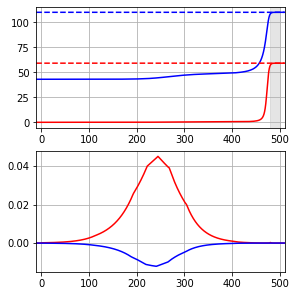

-------  55 0.4250000000000001 0.6250000000000003
set cost params:  0.05 10.114358803704095 0.0
interpolate adjoint :  True True True
initial cost =  286.7532504241635
RUN  0 , total integrated cost =  286.7532504241635
Gradient descend method:  None
RUN  1 , total integrated cost =  286.7532504241635
Control only changes marginally.
RUN  1 , total integrated cost =  286.7532504241635
Improved over  1  iterations in  0.5616582109942101  seconds by  0.0  percent.
cost splitting :  0.25623863497062443 [15.98770677 12.36213172]


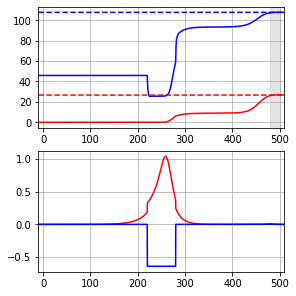

-------  56 0.4500000000000001 0.6250000000000003
set cost params:  0.05 29.34690855004062 0.0
interpolate adjoint :  True True True
initial cost =  504.06639564968833
RUN  0 , total integrated cost =  504.06639564968833
Gradient descend method:  None
RUN  1 , total integrated cost =  504.06639564968833
Control only changes marginally.
RUN  1 , total integrated cost =  504.06639564968833
Improved over  1  iterations in  0.6811730119516142  seconds by  0.0  percent.
cost splitting :  0.0009446365858889871 [11.00067601  6.17545508]


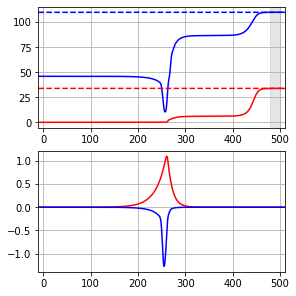

-------  57 0.47500000000000014 0.6250000000000003
set cost params:  0.05 29.324865272158437 0.0
interpolate adjoint :  True True True
initial cost =  372.9029433440489
RUN  0 , total integrated cost =  372.9029433440489
Gradient descend method:  None
RUN  1 , total integrated cost =  372.9029433440489
Control only changes marginally.
RUN  1 , total integrated cost =  372.9029433440489
Improved over  1  iterations in  0.6378725779941306  seconds by  0.0  percent.
cost splitting :  6.605548988386857e-06 [11.02162837  1.69464294]


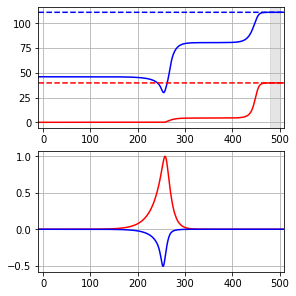

-------  58 0.5000000000000002 0.6250000000000003
set cost params:  0.05 111.33259929918344 0.0
interpolate adjoint :  True True True
initial cost =  926.936526245479
RUN  0 , total integrated cost =  926.936526245479
Gradient descend method:  None
RUN  1 , total integrated cost =  926.936526245479
Control only changes marginally.
RUN  1 , total integrated cost =  926.936526245479
Improved over  1  iterations in  0.6607979859691113  seconds by  0.0  percent.
cost splitting :  1.572345090439828e-05 [7.39745675 0.92837532]


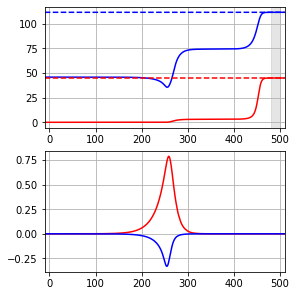

-------  59 0.5250000000000001 0.6250000000000003
set cost params:  0.05 74.9265042567081 0.0
interpolate adjoint :  True True True
initial cost =  354.4097065465576
RUN  0 , total integrated cost =  354.4097065465576
Gradient descend method:  None
RUN  1 , total integrated cost =  354.4097065465576
Control only changes marginally.
RUN  1 , total integrated cost =  354.4097065465576
Improved over  1  iterations in  0.6449339750106446  seconds by  0.0  percent.
cost splitting :  3.232140432961654e-05 [4.37104635 0.35905161]


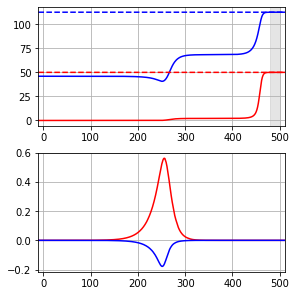

-------  60 0.5500000000000003 0.6250000000000003
set cost params:  0.05 562.6858437328113 0.0
interpolate adjoint :  True True True
initial cost =  1138.9592564953293
RUN  0 , total integrated cost =  1138.9592564953293
Gradient descend method:  None
RUN  1 , total integrated cost =  1138.9592564953293
Control only changes marginally.
RUN  1 , total integrated cost =  1138.9592564953293
Improved over  1  iterations in  0.6221219500293955  seconds by  0.0  percent.
cost splitting :  0.0006239836286077692 [1.89774306 0.12640458]


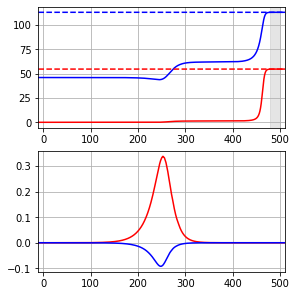

-------  61 0.5750000000000002 0.6250000000000003
set cost params:  0.05 4279.506426503836 0.0
interpolate adjoint :  True True True
initial cost =  1350.00479422859
RUN  0 , total integrated cost =  1350.00479422859
Gradient descend method:  None
RUN  1 , total integrated cost =  1350.00479422859
Control only changes marginally.
RUN  1 , total integrated cost =  1350.00479422859
Improved over  1  iterations in  0.5509134960011579  seconds by  0.0  percent.
cost splitting :  0.3060388168071308 [0.29895847 0.01649601]


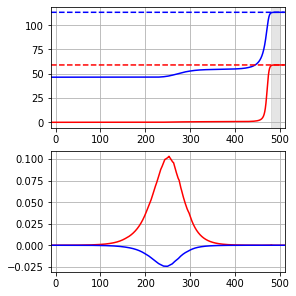

-------  62 0.4250000000000001 0.6500000000000004
set cost params:  0.05 8.250943226762097 0.0
interpolate adjoint :  True True True
initial cost =  205.8885567764456
RUN  0 , total integrated cost =  205.8885567764456
Gradient descend method:  None
RUN  1 , total integrated cost =  205.8885567764456
Control only changes marginally.
RUN  1 , total integrated cost =  205.8885567764456
Improved over  1  iterations in  0.46868337999330834  seconds by  0.0  percent.
cost splitting :  1.3338634028732372 [17.73581825  7.20943443]


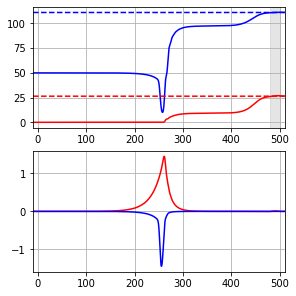

-------  63 0.4500000000000001 0.6500000000000004
set cost params:  0.05 11.0453056096899 0.0
interpolate adjoint :  True True True
initial cost =  215.34716638427417
RUN  0 , total integrated cost =  215.34716638427417
Gradient descend method:  None
RUN  1 , total integrated cost =  215.34716638427417
Control only changes marginally.
RUN  1 , total integrated cost =  215.34716638427417
Improved over  1  iterations in  0.48263727396260947  seconds by  0.0  percent.
cost splitting :  0.021795202670574863 [12.01708509  7.47953042]


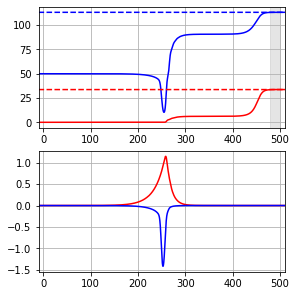

-------  64 0.47500000000000014 0.6500000000000004
set cost params:  0.05 34.89243595169096 0.0
interpolate adjoint :  True True True
initial cost =  544.3038535919532
RUN  0 , total integrated cost =  544.3038535919532
Gradient descend method:  None
RUN  1 , total integrated cost =  544.3038535919532
Control only changes marginally.
RUN  1 , total integrated cost =  544.3038535919532
Improved over  1  iterations in  0.5493329609744251  seconds by  0.0  percent.
cost splitting :  5.89253423647098e-05 [10.74618609  4.85329373]


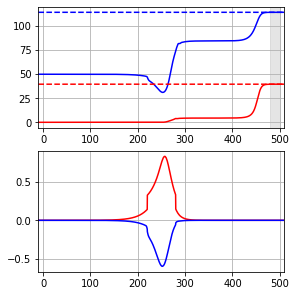

-------  65 0.5000000000000002 0.6500000000000004
set cost params:  0.05 53.672264548523884 0.0
interpolate adjoint :  True True True
initial cost =  506.28488825948136
RUN  0 , total integrated cost =  506.28488825948136
Gradient descend method:  None
RUN  1 , total integrated cost =  506.28488825948136
Control only changes marginally.
RUN  1 , total integrated cost =  506.28488825948136
Improved over  1  iterations in  0.6048999479971826  seconds by  0.0  percent.
cost splitting :  7.99981088581249e-06 [8.80319848 0.62969749]


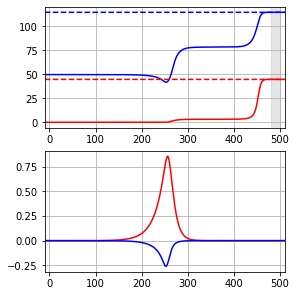

-------  66 0.5250000000000001 0.6500000000000004
set cost params:  0.05 108.47279648481387 0.0
interpolate adjoint :  True True True
initial cost =  601.1219833158423
RUN  0 , total integrated cost =  601.1219833158423
Gradient descend method:  None
RUN  1 , total integrated cost =  601.1219833158423
Control only changes marginally.
RUN  1 , total integrated cost =  601.1219833158423
Improved over  1  iterations in  0.3630312369787134  seconds by  0.0  percent.
cost splitting :  8.177894672911716e-05 [5.25902421 0.28265996]


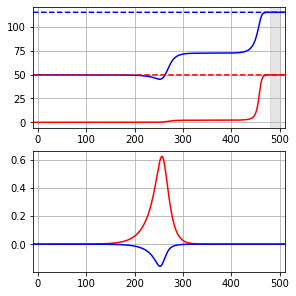

-------  67 0.5500000000000003 0.6500000000000004
set cost params:  0.05 107.33161056700818 0.0
interpolate adjoint :  True True True
initial cost =  275.72975971697474
RUN  0 , total integrated cost =  275.72975971697474
Gradient descend method:  None
RUN  1 , total integrated cost =  275.72975971697474
Control only changes marginally.
RUN  1 , total integrated cost =  275.72975971697474
Improved over  1  iterations in  0.5448710820055567  seconds by  0.0  percent.
cost splitting :  0.0002774578121594869 [2.44834174 0.12061017]


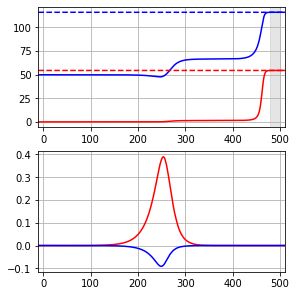

-------  68 0.5750000000000002 0.6500000000000004
set cost params:  0.05 2797.888263398805 0.0
interpolate adjoint :  True True True
initial cost =  1653.6476501810228
RUN  0 , total integrated cost =  1653.6476501810228
Gradient descend method:  None
RUN  1 , total integrated cost =  1653.6476501810228
Control only changes marginally.
RUN  1 , total integrated cost =  1653.6476501810228
Improved over  1  iterations in  0.36367630801396444  seconds by  0.0  percent.
cost splitting :  0.03803866793906032 [0.56701875 0.02401477]


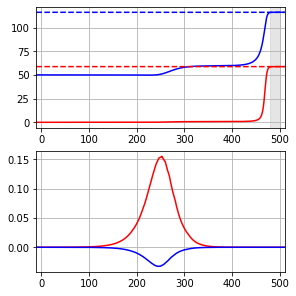

-------  69 0.4250000000000001 0.6750000000000004
set cost params:  0.05 10.4064607674017 0.0
interpolate adjoint :  True True True
initial cost =  293.8683405398359
RUN  0 , total integrated cost =  293.8683405398359
Gradient descend method:  None
RUN  1 , total integrated cost =  293.8683405398359
Control only changes marginally.
RUN  1 , total integrated cost =  293.8683405398359
Improved over  1  iterations in  0.44045914500020444  seconds by  0.0  percent.
cost splitting :  0.4966630800082286 [22.47404334  5.76259868]


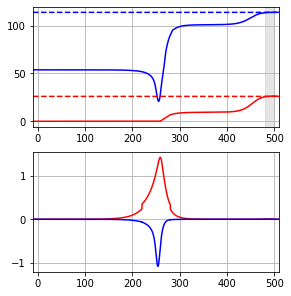

-------  70 0.4500000000000001 0.6750000000000004
set cost params:  0.05 17.71395480370324 0.0
interpolate adjoint :  True True True
initial cost =  379.5502971159132
RUN  0 , total integrated cost =  379.5502971159132
Gradient descend method:  None
RUN  1 , total integrated cost =  379.5502971159132
Control only changes marginally.
RUN  1 , total integrated cost =  379.5502971159132
Improved over  1  iterations in  0.31237901496933773  seconds by  0.0  percent.
cost splitting :  0.07545008010748586 [19.6573983   1.76901544]


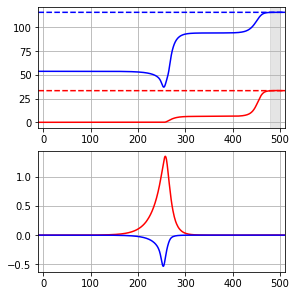

-------  71 0.47500000000000014 0.6750000000000004
set cost params:  0.05 10.016544428309727 0.0
interpolate adjoint :  True True True
initial cost =  188.84723619923997
RUN  0 , total integrated cost =  188.84723619923997
Gradient descend method:  None
RUN  1 , total integrated cost =  188.84723619923997
Control only changes marginally.
RUN  1 , total integrated cost =  188.84723619923997
Improved over  1  iterations in  0.4418006429914385  seconds by  0.0  percent.
cost splitting :  6.509974413322109e-05 [11.26278755  7.59074365]


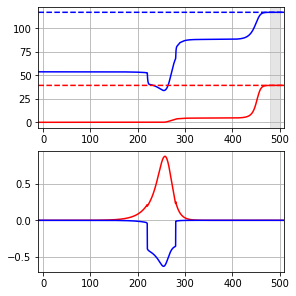

-------  72 0.5000000000000002 0.6750000000000004
set cost params:  0.05 59.559888299567874 0.0
interpolate adjoint :  True True True
initial cost =  620.6630033201762
RUN  0 , total integrated cost =  620.6630033201762
Gradient descend method:  None
RUN  1 , total integrated cost =  620.6630033201762
Control only changes marginally.
RUN  1 , total integrated cost =  620.6630033201762
Improved over  1  iterations in  0.5344438410247676  seconds by  0.0  percent.
cost splitting :  7.60729397486758e-06 [9.91089014 0.509932  ]


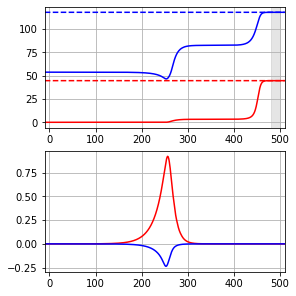

-------  73 0.5250000000000001 0.6750000000000004
set cost params:  0.05 150.841834646522 0.0
interpolate adjoint :  True True True
initial cost =  948.0833221165559
RUN  0 , total integrated cost =  948.0833221165559
Gradient descend method:  None
RUN  1 , total integrated cost =  948.0833221165559
Control only changes marginally.
RUN  1 , total integrated cost =  948.0833221165559
Improved over  1  iterations in  0.6371577260433696  seconds by  0.0  percent.
cost splitting :  1.89351921456347e-05 [6.03870852 0.24657251]


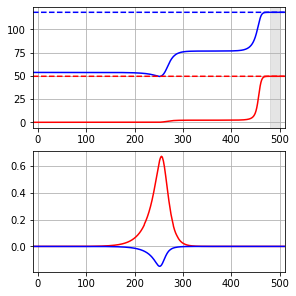

-------  74 0.5500000000000003 0.6750000000000004
set cost params:  0.05 81.6555425032236 0.0
interpolate adjoint :  True True True
initial cost =  252.0270933095106
RUN  0 , total integrated cost =  252.0270933095106
Gradient descend method:  None
RUN  1 , total integrated cost =  252.0270933095106
Control only changes marginally.
RUN  1 , total integrated cost =  252.0270933095106
Improved over  1  iterations in  0.6558178820414469  seconds by  0.0  percent.
cost splitting :  9.434236413591727e-05 [2.97817424 0.10829217]


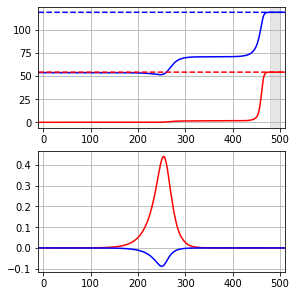

-------  75 0.5750000000000002 0.6750000000000004
set cost params:  0.05 1217.9674529845058 0.0
interpolate adjoint :  True True True
initial cost =  1075.251584148383
RUN  0 , total integrated cost =  1075.251584148383
Gradient descend method:  None
RUN  1 , total integrated cost =  1075.251584148383
Control only changes marginally.
RUN  1 , total integrated cost =  1075.251584148383
Improved over  1  iterations in  0.6053625119966455  seconds by  0.0  percent.
cost splitting :  0.017157474587854615 [0.85497098 0.02785288]


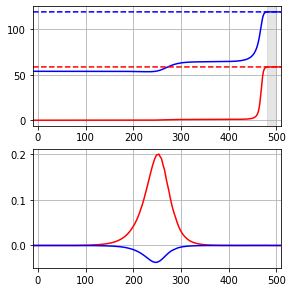

-------  76 0.4250000000000001 0.7000000000000004
set cost params:  0.05 5.42673176675477 0.0
interpolate adjoint :  True True True
initial cost =  166.69386521103186
RUN  0 , total integrated cost =  166.69386521103186
Gradient descend method:  None
RUN  1 , total integrated cost =  166.69386521103186
Control only changes marginally.
RUN  1 , total integrated cost =  166.69386521103186
Improved over  1  iterations in  0.4510521510383114  seconds by  0.0  percent.
cost splitting :  11.387268037731168 [27.979549    2.63270695]


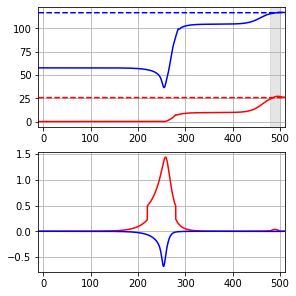

-------  77 0.4500000000000001 0.7000000000000004
set cost params:  0.05 20.267630048073286 0.0
interpolate adjoint :  True True True
initial cost =  463.9978381573389
RUN  0 , total integrated cost =  463.9978381573389
Gradient descend method:  None
RUN  1 , total integrated cost =  463.9978381573389
Control only changes marginally.
RUN  1 , total integrated cost =  463.9978381573389
Improved over  1  iterations in  0.4073519880184904  seconds by  0.0  percent.
cost splitting :  0.007873807722352822 [22.44758039  0.44594211]


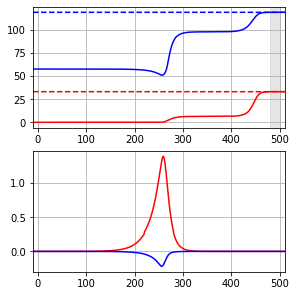

-------  78 0.47500000000000014 0.7000000000000004
set cost params:  0.05 12.719878489254624 0.0
interpolate adjoint :  True True True
initial cost =  213.0726291531924
RUN  0 , total integrated cost =  213.0726291531924
Gradient descend method:  None
RUN  1 , total integrated cost =  213.0726291531924
Control only changes marginally.
RUN  1 , total integrated cost =  213.0726291531924
Improved over  1  iterations in  0.5345264850184321  seconds by  0.0  percent.
cost splitting :  0.00012363597655458828 [15.9287809   0.82237149]


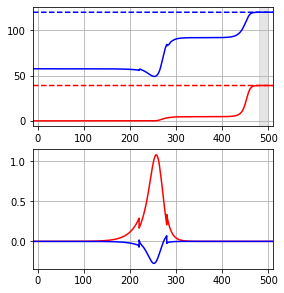

-------  79 0.5000000000000002 0.7000000000000004
set cost params:  0.05 21.571691281073544 0.0
interpolate adjoint :  True True True
initial cost =  243.8549026546582
RUN  0 , total integrated cost =  243.8549026546582
Gradient descend method:  None
RUN  1 , total integrated cost =  243.8549026546582
Control only changes marginally.
RUN  1 , total integrated cost =  243.8549026546582
Improved over  1  iterations in  0.5685360069619492  seconds by  0.0  percent.
cost splitting :  6.497019261461847e-06 [10.95930478  0.34508944]


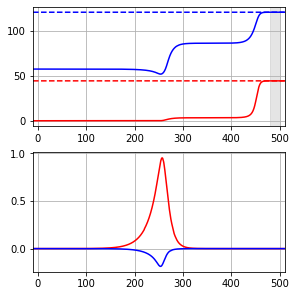

-------  80 0.5250000000000001 0.7000000000000004
set cost params:  0.05 169.25147526315968 0.0
interpolate adjoint :  True True True
initial cost =  1178.1786180079553
RUN  0 , total integrated cost =  1178.1786180079553
Gradient descend method:  None
RUN  1 , total integrated cost =  1178.1786180079553
Control only changes marginally.
RUN  1 , total integrated cost =  1178.1786180079553
Improved over  1  iterations in  0.6572669650195166  seconds by  0.0  percent.
cost splitting :  7.4959811864734135e-06 [6.75168818 0.20942466]


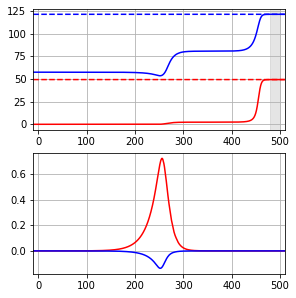

-------  81 0.5500000000000003 0.7000000000000004
set cost params:  0.05 281.9666898553399 0.0
interpolate adjoint :  True True True
initial cost =  1007.0078533724675
RUN  0 , total integrated cost =  1007.0078533724675
Gradient descend method:  None
RUN  1 , total integrated cost =  1007.0078533724675
Control only changes marginally.
RUN  1 , total integrated cost =  1007.0078533724675
Improved over  1  iterations in  0.6542024340014905  seconds by  0.0  percent.
cost splitting :  7.599899770039719e-05 [3.47440199 0.09696969]


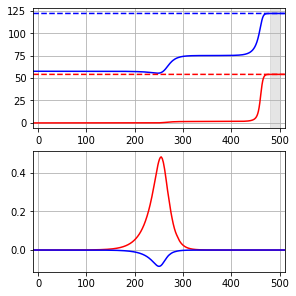

-------  82 0.5750000000000002 0.7000000000000004
set cost params:  0.05 1265.202284950946 0.0
interpolate adjoint :  True True True
initial cost =  1487.7333888700643
RUN  0 , total integrated cost =  1487.7333888700643
Gradient descend method:  None
RUN  1 , total integrated cost =  1487.7333888700643
Control only changes marginally.
RUN  1 , total integrated cost =  1487.7333888700643
Improved over  1  iterations in  0.48499219299992546  seconds by  0.0  percent.
cost splitting :  0.0020730669371235642 [1.14720177 0.02868394]


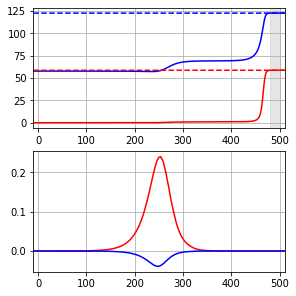

In [11]:
c_var = [0,1]
conv = [None] * len(exc)

tol = 1e-6

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    k = 0
    
    while not conv[i]:
        max_it = int(30)

        weight_ = random.random() * ( cost_uncontrolled[i] -
                                     costnode_[i][0][0][0] ) / sum( costnode_[i][ind_cost][0][:] )
            
        aln.params.duration = dur
        cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
        weights_[i] = cost.getParams()

        setinit(initVars[i], aln)

        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[i][0]
        target_[:,1,:] = target[i][1]

        control0 = aln.getZeroControl()
        control0 = bestControl_[i][:,:,n_pre-1:-n_post+1]

        bestControl_[i], bestState_[i], cost_[i], runtime_, grad_, phi_, phi1_, costnode_[i] = aln.A1(
            control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
            startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
            t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
            prec_variables_ = p_var, transition_time_ = t_pen)
        
        if cost_[i][2] == 0.:
            conv[i] = True

        #print('uncontrolled cost : ', cost_uncontrolled[i])
        print('cost splitting : ', costnode_[i][0][0][0], costnode_[i][ind_cost][0][:2])

        if conv[i]:
            time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
            target_ = aln.getZeroTarget()
            target_[:,0,:] = target[i][0]
            target_[:,1,:] = target[i][1]
        
            fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
            ax[1].plot(time_, bestControl_[i][0,0,:], color = 'red')
            ax[0].plot(time_, bestState_[i][0,0,:], color= 'red')
            ax[1].plot(time_, bestControl_[i][0,1,:], color = 'blue')
            ax[0].plot(time_, bestState_[i][0,1,:], color= 'blue')
            ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
            ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
            ax[0].set_xlim(-dur_pre,dur+dur_post)
            ax[1].set_xlim(-dur_pre,dur+dur_post)
            ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
            plt.show()

        with open(file_,'wb') as f:
            pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)
        
        k += 1

In [12]:
c_var = [0,1]
conv = [None] * len(exc)

tol = 1e-8

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    while not conv[i]:
        max_it = int(30)

        weight_ = random.random() * ( cost_uncontrolled[i] -
                                     costnode_[i][0][0][0] ) / sum( costnode_[i][ind_cost][0][:] )
            
        aln.params.duration = dur
        cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
        weights_[i] = cost.getParams()

        setinit(initVars[i], aln)

        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[i][0]
        target_[:,1,:] = target[i][1]

        control0 = aln.getZeroControl()
        control0 = bestControl_[i][:,:,n_pre-1:-n_post+1]

        bestControl_[i], bestState_[i], cost_[i], runtime_, grad_, phi_, phi1_, costnode_[i] = aln.A1(
            control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
            startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
            t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
            prec_variables_ = p_var, transition_time_ = t_pen)
        
        if cost_[i][3] == 0.:
            conv[i] = True

        #print('uncontrolled cost : ', cost_uncontrolled[i])
        print('cost splitting : ', costnode_[i][0][0][0], costnode_[i][ind_cost][0][:2])

        if conv[i] and False:
            time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
            target_ = aln.getZeroTarget()
            target_[:,0,:] = target[i][0]
            target_[:,1,:] = target[i][1]
        
            fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
            ax[1].plot(time_, bestControl_[i][0,0,:], color = 'red')
            ax[0].plot(time_, bestState_[i][0,0,:], color= 'red')
            ax[1].plot(time_, bestControl_[i][0,1,:], color = 'blue')
            ax[0].plot(time_, bestState_[i][0,1,:], color= 'blue')
            ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
            ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
            ax[0].set_xlim(-dur_pre,dur+dur_post)
            ax[1].set_xlim(-dur_pre,dur+dur_post)
            ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
            plt.show()

        with open(file_,'wb') as f:
            pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

-------  0 0.4000000000000001 0.3500000000000001
set cost params:  0.05 0.3367037553790562 0.0
interpolate adjoint :  True True True
initial cost =  80.80890129097504
RUN  0 , total integrated cost =  80.80890129097504
Gradient descend method:  None
RUN  1 , total integrated cost =  80.80890129097504
Control only changes marginally.
RUN  1 , total integrated cost =  80.80890129097504
Improved over  1  iterations in  1.8680996850016527  seconds by  0.0  percent.
cost splitting :  9.785531520490149e-18 [120. 120.]
-------  1 0.4250000000000001 0.3500000000000001
set cost params:  0.05 5457.210503041893 0.0
interpolate adjoint :  True True True
initial cost =  337.4450322978542
RUN  0 , total integrated cost =  337.4450322978542
Gradient descend method:  None
RUN  1 , total integrated cost =  337.4450322978542
Control only changes marginally.
RUN  1 , total integrated cost =  337.4450322978542
Improved over  1  iterations in  0.7455239410046488  seconds by  0.0  percent.
cost splitting : 

-------  15 0.4500000000000001 0.4500000000000002
set cost params:  0.05 170.49296086487217 0.0
interpolate adjoint :  True True True
initial cost =  349.27796066042345
RUN  0 , total integrated cost =  349.27796066042345
Gradient descend method:  None
RUN  1 , total integrated cost =  349.27796066042345
Control only changes marginally.
RUN  1 , total integrated cost =  349.27796066042345
Improved over  1  iterations in  0.7577404920011759  seconds by  0.0  percent.
cost splitting :  4.199425696433884e-05 [0.7829891  1.26564656]
-------  16 0.47500000000000014 0.4500000000000002
set cost params:  0.05 804.5367571934798 0.0
interpolate adjoint :  True True True
initial cost =  791.7463345261428
RUN  0 , total integrated cost =  791.7463345261428
Gradient descend method:  None
RUN  1 , total integrated cost =  791.7463345261428
Control only changes marginally.
RUN  1 , total integrated cost =  791.7463345261428
Improved over  1  iterations in  0.7395874919602647  seconds by  0.0  percent

-------  28 0.5000000000000002 0.5000000000000002
set cost params:  0.05 0.391084754314191 0.0
interpolate adjoint :  True True True
initial cost =  93.86034103540621
RUN  0 , total integrated cost =  93.86034103540621
Gradient descend method:  None
RUN  1 , total integrated cost =  93.86034103540621
Control only changes marginally.
RUN  1 , total integrated cost =  93.86034103540621
Improved over  1  iterations in  0.6728215949842706  seconds by  0.0  percent.
cost splitting :  4.5438388140730445e-27 [120. 120.]
-------  29 0.5250000000000001 0.5000000000000002
set cost params:  0.05 1867.4756933040826 0.0
interpolate adjoint :  True True True
initial cost =  916.6215891806601
RUN  0 , total integrated cost =  916.6215891806601
Gradient descend method:  None
RUN  1 , total integrated cost =  916.6215530637971
RUN  2 , total integrated cost =  916.6215530637971
Control only changes marginally.
RUN  2 , total integrated cost =  916.6215530637971
Improved over  2  iterations in  0.842327

-------  42 0.4250000000000001 0.5750000000000003
set cost params:  0.05 11.780964804391521 0.0
interpolate adjoint :  True True True
initial cost =  209.14473350479997
RUN  0 , total integrated cost =  209.14473350479997
Gradient descend method:  None
RUN  1 , total integrated cost =  209.14473350479997
Control only changes marginally.
RUN  1 , total integrated cost =  209.14473350479997
Improved over  1  iterations in  0.7865503359935246  seconds by  0.0  percent.
cost splitting :  1.4869127585559385 [8.86687001 8.8795872 ]
-------  43 0.4500000000000001 0.5750000000000003
set cost params:  0.05 18.095091029808604 0.0
interpolate adjoint :  True True True
initial cost =  223.15423910621342
RUN  0 , total integrated cost =  223.15423910621342
Gradient descend method:  None
RUN  1 , total integrated cost =  223.15423910621342
Control only changes marginally.
RUN  1 , total integrated cost =  223.15423910621342
Improved over  1  iterations in  0.574323242995888  seconds by  0.0  percent

RUN  1 , total integrated cost =  61.02448714337084
Control only changes marginally.
RUN  1 , total integrated cost =  61.02448714337084
Improved over  1  iterations in  0.6099966909969226  seconds by  0.0  percent.
cost splitting :  0.0009446365858889871 [11.00067601  6.17545508]
-------  57 0.47500000000000014 0.6250000000000003
set cost params:  0.05 35.43668612058965 0.0
interpolate adjoint :  True True True
initial cost =  450.62251546828145
RUN  0 , total integrated cost =  450.62251546828145
Gradient descend method:  None
RUN  1 , total integrated cost =  450.62251546828145
Control only changes marginally.
RUN  1 , total integrated cost =  450.62251546828145
Improved over  1  iterations in  0.6334972740150988  seconds by  0.0  percent.
cost splitting :  6.605548988386857e-06 [11.02162837  1.69464294]
-------  58 0.5000000000000002 0.6250000000000003
set cost params:  0.05 44.17500021499872 0.0
interpolate adjoint :  True True True
initial cost =  367.7936341802654
RUN  0 , total

-------  72 0.5000000000000002 0.6750000000000004
set cost params:  0.05 56.167237507583316 0.0
interpolate adjoint :  True True True
initial cost =  585.3087928171547
RUN  0 , total integrated cost =  585.3087928171547
Gradient descend method:  None
RUN  1 , total integrated cost =  585.3087928171547
Control only changes marginally.
RUN  1 , total integrated cost =  585.3087928171547
Improved over  1  iterations in  0.6896956189884804  seconds by  0.0  percent.
cost splitting :  7.60729397486758e-06 [9.91089014 0.509932  ]
-------  73 0.5250000000000001 0.6750000000000004
set cost params:  0.05 69.33844279232355 0.0
interpolate adjoint :  True True True
initial cost =  435.8115997736873
RUN  0 , total integrated cost =  435.8115997736873
Gradient descend method:  None
RUN  1 , total integrated cost =  435.8115997736873
Control only changes marginally.
RUN  1 , total integrated cost =  435.8115997736873
Improved over  1  iterations in  0.5763639470096678  seconds by  0.0  percent.
cost

In [31]:
c_var = [0,1]
conv = [None] * len(exc)

tol = 1e-10

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
    
    k = 0
    
    while not conv[i]:
        max_it = int(80)

        weight_ = random.random() * ( cost_uncontrolled[i] -
                                     costnode_[i][0][0][0] ) / sum( costnode_[i][ind_cost][0][:] )
            
        aln.params.duration = dur
        cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
        weights_[i] = cost.getParams()

        setinit(initVars[i], aln)

        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[i][0]
        target_[:,1,:] = target[i][1]

        control0 = aln.getZeroControl()
        control0 = bestControl_[i][:,:,n_pre-1:-n_post+1]

        bestControl_[i], bestState_[i], cost_[i], runtime_, grad_, phi_, phi1_, costnode_[i] = aln.A1(
            control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
            startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
            t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
            prec_variables_ = p_var, transition_time_ = t_pen)
        
        if cost_[i][3] == 0.:
            conv[i] = True

        #print('uncontrolled cost : ', cost_uncontrolled[i])
        print('cost splitting : ', costnode_[i][0][0][0], costnode_[i][ind_cost][0][:2])

        if conv[i] and False:
            time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
            target_ = aln.getZeroTarget()
            target_[:,0,:] = target[i][0]
            target_[:,1,:] = target[i][1]
        
            fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
            ax[1].plot(time_, bestControl_[i][0,0,:], color = 'red')
            ax[0].plot(time_, bestState_[i][0,0,:], color= 'red')
            ax[1].plot(time_, bestControl_[i][0,1,:], color = 'blue')
            ax[0].plot(time_, bestState_[i][0,1,:], color= 'blue')
            ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
            ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
            ax[0].set_xlim(-dur_pre,dur+dur_post)
            ax[1].set_xlim(-dur_pre,dur+dur_post)
            ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
            plt.show()

        with open(file_,'wb') as f:
            pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)
        
        k += 1

-------  0 0.4000000000000001 0.3500000000000001
set cost params:  0.05 0.8893587842411232 0.0
interpolate adjoint :  True True True
initial cost =  213.44610821786557
RUN  0 , total integrated cost =  213.44610821786557
Gradient descend method:  None
RUN  1 , total integrated cost =  213.44610821786557
Control only changes marginally.
RUN  1 , total integrated cost =  213.44610821786557
Improved over  1  iterations in  1.7375141410157084  seconds by  0.0  percent.
cost splitting :  9.785531520490149e-18 [120. 120.]
-------  1 0.4250000000000001 0.3500000000000001
set cost params:  0.05 6042.719908250749 0.0
interpolate adjoint :  True True True
initial cost =  373.6498437683771
RUN  0 , total integrated cost =  373.6498437683771
Gradient descend method:  None
RUN  1 , total integrated cost =  373.64983104805884
RUN  2 , total integrated cost =  373.64983104805884
Control only changes marginally.
RUN  2 , total integrated cost =  373.64983104805884
Improved over  2  iterations in  1.33

RUN  1 , total integrated cost =  44.3374852456561
Control only changes marginally.
RUN  1 , total integrated cost =  44.3374852456561
Improved over  1  iterations in  0.9009366430109367  seconds by  0.0  percent.
cost splitting :  8.174844382568232e-08 [119.99915176 109.25265771]
-------  14 0.4250000000000001 0.4500000000000002
set cost params:  0.05 19.418374896596134 0.0
interpolate adjoint :  True True True
initial cost =  66.45395576289505
RUN  0 , total integrated cost =  66.45395576289505
Gradient descend method:  None
RUN  1 , total integrated cost =  66.45394445299128
RUN  2 , total integrated cost =  66.45394445035461
RUN  3 , total integrated cost =  66.45394445035461
Control only changes marginally.
RUN  3 , total integrated cost =  66.45394445035461
Improved over  3  iterations in  2.0959073629928753  seconds by  1.702312572149367e-05  percent.
cost splitting :  6.177959653011684e-05 [1.19943805 2.22278146]
set cost params:  0.05 121.18703476160877 0.0
interpolate adjoint

RUN  1 , total integrated cost =  786.6783330696496
RUN  2 , total integrated cost =  786.6783330696496
Control only changes marginally.
RUN  2 , total integrated cost =  786.6783330696496
Improved over  2  iterations in  0.8959331479854882  seconds by  0.00033418813137586767  percent.
cost splitting :  0.523332601569689 [0.04526707 0.01630217]
-------  24 0.4000000000000001 0.5000000000000002
set cost params:  0.05 0.01708904347003597 0.0
interpolate adjoint :  True True True
initial cost =  4.073899880763342
RUN  0 , total integrated cost =  4.073899880763342
Gradient descend method:  None
RUN  1 , total integrated cost =  4.073899880763342
Control only changes marginally.
RUN  1 , total integrated cost =  4.073899880763342
Improved over  1  iterations in  0.7713256040005945  seconds by  0.0  percent.
cost splitting :  0.09617623949387752 [119.98913324 118.12197438]
-------  25 0.4250000000000001 0.5000000000000002
set cost params:  0.05 1.95015139534569 0.0
interpolate adjoint :  Tr

RUN  1 , total integrated cost =  104.2803443709912
RUN  2 , total integrated cost =  104.28034437029248
RUN  3 , total integrated cost =  104.28034437029248
Control only changes marginally.
RUN  3 , total integrated cost =  104.28034437029248
Improved over  3  iterations in  1.217343242955394  seconds by  2.023260321948328e-06  percent.
cost splitting :  4.065734639121808e-05 [5.13537912 7.67374679]
set cost params:  0.05 30.099085703496307 0.0
interpolate adjoint :  True True True
initial cost =  385.54298063060776
RUN  0 , total integrated cost =  385.54298063060776
Gradient descend method:  None
RUN  1 , total integrated cost =  385.54297592257063
RUN  2 , total integrated cost =  385.5429759171459
RUN  3 , total integrated cost =  385.5429759171459
Control only changes marginally.
RUN  3 , total integrated cost =  385.5429759171459
Improved over  3  iterations in  1.2872536479844712  seconds by  1.2225515888530936e-06  percent.
cost splitting :  0.0001765467488719027 [5.13537873 7

RUN  1 , total integrated cost =  611.5729726027472
RUN  2 , total integrated cost =  611.5729726027472
Control only changes marginally.
RUN  2 , total integrated cost =  611.5729726027472
Improved over  2  iterations in  0.9178479150286876  seconds by  1.1799991739280813e-07  percent.
cost splitting :  7.336733959178792e-06 [5.36189706 3.57126796]
-------  45 0.5000000000000002 0.5750000000000003
set cost params:  0.05 126.80257596251842 0.0
interpolate adjoint :  True True True
initial cost =  727.0271925473623
RUN  0 , total integrated cost =  727.0271925473623
Gradient descend method:  None
RUN  1 , total integrated cost =  727.0271925395723
RUN  2 , total integrated cost =  727.0271925395723
Control only changes marginally.
RUN  2 , total integrated cost =  727.0271925395723
Improved over  2  iterations in  0.8209782529738732  seconds by  1.071498445526231e-09  percent.
cost splitting :  2.615743403129017e-05 [4.42952463 1.30401182]
-------  46 0.5250000000000001 0.575000000000000

RUN  4 , total integrated cost =  1126.3282872308155
Control only changes marginally.
RUN  4 , total integrated cost =  1126.3282872308155
Improved over  4  iterations in  1.6251847459934652  seconds by  9.785273391571536e-07  percent.
cost splitting :  0.006666649539463479 [0.82008312 0.09917469]
set cost params:  0.05 1026.8054961905111 0.0
interpolate adjoint :  True True True
initial cost =  943.899300901996
RUN  0 , total integrated cost =  943.899300901996
Gradient descend method:  None
RUN  1 , total integrated cost =  943.8992964155574
RUN  2 , total integrated cost =  943.899296392699
RUN  3 , total integrated cost =  943.899296385198
RUN  4 , total integrated cost =  943.899296385198
Control only changes marginally.
RUN  4 , total integrated cost =  943.899296385198
Improved over  4  iterations in  1.7973584060091525  seconds by  4.78525407743291e-07  percent.
cost splitting :  0.0056253632664285645 [0.82008311 0.09917474]
set cost params:  0.05 784.0956105702174 0.0
interpol

RUN  1 , total integrated cost =  655.5356611710478
RUN  2 , total integrated cost =  655.5356611710478
Control only changes marginally.
RUN  2 , total integrated cost =  655.5356611710478
Improved over  2  iterations in  0.9760895220097154  seconds by  6.302096267063462e-08  percent.
cost splitting :  5.900090609427555e-05 [3.4319528  0.42456123]
-------  53 0.5500000000000003 0.6000000000000003
set cost params:  0.05 991.3671695789369 0.0
interpolate adjoint :  True True True
initial cost =  1453.2865417286564
RUN  0 , total integrated cost =  1453.2865417286564
Gradient descend method:  None
RUN  1 , total integrated cost =  1453.2865416456657
RUN  2 , total integrated cost =  1453.2865416456657
Control only changes marginally.
RUN  2 , total integrated cost =  1453.2865416456657
Improved over  2  iterations in  1.1341350289876573  seconds by  5.710560913030349e-09  percent.
cost splitting :  0.0015025690643146658 [1.3429638  0.12297789]
-------  54 0.5750000000000002 0.600000000000

initial cost =  36.47250621284575
RUN  0 , total integrated cost =  36.47250621284575
Gradient descend method:  None
RUN  1 , total integrated cost =  36.472506064895214
RUN  2 , total integrated cost =  36.472506064895214
Control only changes marginally.
RUN  2 , total integrated cost =  36.472506064895214
Improved over  2  iterations in  1.1040222169831395  seconds by  4.056494873339034e-07  percent.
cost splitting :  0.0009443564534492347 [11.00067601  6.17545509]
-------  57 0.47500000000000014 0.6250000000000003
set cost params:  0.05 52.1939137344868 0.0
interpolate adjoint :  True True True
initial cost =  663.7119683186844
RUN  0 , total integrated cost =  663.7119683186844
Gradient descend method:  None
RUN  1 , total integrated cost =  663.7119682507613
RUN  2 , total integrated cost =  663.7119682507613
Control only changes marginally.
RUN  2 , total integrated cost =  663.7119682507613
Improved over  2  iterations in  1.3936184199992567  seconds by  1.0233819125460286e-08  

RUN  1 , total integrated cost =  894.9570425540678
RUN  2 , total integrated cost =  894.9570425540678
Control only changes marginally.
RUN  2 , total integrated cost =  894.9570425540678
Improved over  2  iterations in  0.9717602360178716  seconds by  6.145263853341021e-08  percent.
cost splitting :  0.022368082866990102 [0.56701905 0.02401486]
-------  69 0.4250000000000001 0.6750000000000004
set cost params:  0.05 9.138808055645308 0.0
interpolate adjoint :  True True True
initial cost =  258.0740847121027
RUN  0 , total integrated cost =  258.0740847121027
Gradient descend method:  None
RUN  1 , total integrated cost =  258.0740847121027
Control only changes marginally.
RUN  1 , total integrated cost =  258.0740847121027
Improved over  1  iterations in  0.580512312008068  seconds by  0.0  percent.
cost splitting :  0.4966630800082286 [22.47404334  5.76259868]
-------  70 0.4500000000000001 0.6750000000000004
set cost params:  0.05 22.214317839591256 0.0
interpolate adjoint :  True

set cost params:  0.05 421.7813461999012 0.0
interpolate adjoint :  True True True
initial cost =  495.9667932693819
RUN  0 , total integrated cost =  495.9667932693819
Gradient descend method:  None
RUN  1 , total integrated cost =  495.9667542148554
RUN  2 , total integrated cost =  495.9667541865683
RUN  3 , total integrated cost =  495.9667541865683
Control only changes marginally.
RUN  3 , total integrated cost =  495.9667541865683
Improved over  3  iterations in  2.0047377480077557  seconds by  7.880127085968525e-06  percent.
cost splitting :  0.0014110917970359892 [1.14720162 0.02868415]
set cost params:  0.05 179.95201859035066 0.0
interpolate adjoint :  True True True
initial cost =  211.6030887469523
RUN  0 , total integrated cost =  211.6030887469523
Gradient descend method:  None
RUN  1 , total integrated cost =  211.60307424027772
RUN  2 , total integrated cost =  211.60307422157044
RUN  3 , total integrated cost =  211.60307422132595
RUN  4 , total integrated cost =  211.

In [13]:
c_var = [0,1]
#conv = [None] * len(exc)

tol = 1e-11

for i in i_range:
    print("------- ", i, exc[i], inh[i])
    aln.params.ext_exc_current = exc[i] * 5.
    aln.params.ext_inh_current = inh[i] * 5.
        
    while not conv[i]:
        max_it = int(100)

        weight_ = random.random() * ( cost_uncontrolled[i] -
                                     costnode_[i][0][0][0] ) / sum( costnode_[i][ind_cost][0][:] )
            
        aln.params.duration = dur
        cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
        weights_[i] = cost.getParams()

        setinit(initVars[i], aln)

        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[i][0]
        target_[:,1,:] = target[i][1]

        control0 = aln.getZeroControl()
        control0 = bestControl_[i][:,:,n_pre-1:-n_post+1]

        bestControl_[i], bestState_[i], cost_[i], runtime_, grad_, phi_, phi1_, costnode_[i] = aln.A1(
            control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
            startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
            t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
            prec_variables_ = p_var, transition_time_ = t_pen)
        
        if cost_[i][4] == 0.:
            conv[i] = True

        #print('uncontrolled cost : ', cost_uncontrolled[i])
        print('cost splitting : ', costnode_[i][0][0][0], costnode_[i][ind_cost][0][:2])
        print('total cost = ', costnode_[i][0][0][0]+sum(costnode_[i][ind_cost][0][:2]))

        if conv[i] and False:
            time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
            target_ = aln.getZeroTarget()
            target_[:,0,:] = target[i][0]
            target_[:,1,:] = target[i][1]
        
            fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
            ax[1].plot(time_, bestControl_[i][0,0,:], color = 'red')
            ax[0].plot(time_, bestState_[i][0,0,:], color= 'red')
            ax[1].plot(time_, bestControl_[i][0,1,:], color = 'blue')
            ax[0].plot(time_, bestState_[i][0,1,:], color= 'blue')
            ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
            ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
            ax[0].set_xlim(-dur_pre,dur+dur_post)
            ax[1].set_xlim(-dur_pre,dur+dur_post)
            ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
            plt.show()

        with open(file_,'wb') as f:
            pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

-------  0 0.4000000000000001 0.3500000000000001
-------  1 0.4250000000000001 0.3500000000000001
-------  2 0.4000000000000001 0.3750000000000001
-------  3 0.4250000000000001 0.3750000000000001
-------  4 0.4500000000000001 0.3750000000000001
-------  5 0.4000000000000001 0.40000000000000013
-------  6 0.4250000000000001 0.40000000000000013
-------  7 0.4500000000000001 0.40000000000000013
-------  8 0.47500000000000014 0.40000000000000013
-------  9 0.4000000000000001 0.42500000000000016
-------  10 0.4250000000000001 0.42500000000000016
-------  11 0.4500000000000001 0.42500000000000016
-------  12 0.47500000000000014 0.42500000000000016
-------  13 0.4000000000000001 0.4500000000000002
-------  14 0.4250000000000001 0.4500000000000002
-------  15 0.4500000000000001 0.4500000000000002
-------  16 0.47500000000000014 0.4500000000000002
-------  17 0.5000000000000002 0.4500000000000002
-------  18 0.4000000000000001 0.4750000000000002
-------  19 0.4250000000000001 0.4750000000000002

RUN  1 , total integrated cost =  22.643173786072246
RUN  2 , total integrated cost =  22.643173784633102
RUN  3 , total integrated cost =  22.643173784621375
RUN  4 , total integrated cost =  22.643173784611616
RUN  5 , total integrated cost =  22.643173784600943
RUN  6 , total integrated cost =  22.643173784596076
RUN  7 , total integrated cost =  22.643173784591138
RUN  8 , total integrated cost =  22.643173784585333
RUN  9 , total integrated cost =  22.643173784578703
RUN  10 , total integrated cost =  22.64317378457412
RUN  11 , total integrated cost =  22.643173784569036
RUN  12 , total integrated cost =  22.643173784562702
RUN  13 , total integrated cost =  22.643173784556666
RUN  14 , total integrated cost =  22.643173784552143
RUN  15 , total integrated cost =  22.643173784548207
RUN  16 , total integrated cost =  22.643173784548207
Control only changes marginally.
RUN  16 , total integrated cost =  22.643173784548207
Improved over  16  iterations in  4.8516694258432835  secon

RUN  70 , total integrated cost =  44.410721110012894
RUN  80 , total integrated cost =  44.41072110988798
RUN  90 , total integrated cost =  44.41072110976798
RUN  100 , total integrated cost =  44.41072110963698
RUN  100 , total integrated cost =  44.41072110963698
Improved over  100  iterations in  27.731438267976046  seconds by  6.398729240686407e-06  percent.
cost splitting :  1.2332272679597563e-05 [3.9058623  6.21278632]
total cost =  10.118660944704756
set cost params:  0.05 37.62970609131164 0.0
interpolate adjoint :  True True True
initial cost =  380.7617739436894
RUN  0 , total integrated cost =  380.7617739436894
Gradient descend method:  None
RUN  1 , total integrated cost =  380.76176517310574
RUN  2 , total integrated cost =  380.7617651638312
RUN  3 , total integrated cost =  380.7617651638312
Control only changes marginally.
RUN  3 , total integrated cost =  380.7617651638312
Improved over  3  iterations in  1.2159475488588214  seconds by  2.3058664879727075e-06  perc

RUN  1 , total integrated cost =  138.3718081792415
Control only changes marginally.
RUN  1 , total integrated cost =  138.3718081792415
Improved over  1  iterations in  0.8095902600325644  seconds by  0.0  percent.
cost splitting :  1.8070952975878875e-06 [3.77506716 3.2057189 ]
total cost =  6.980787863571834
-------  39 0.5000000000000002 0.5500000000000003
set cost params:  0.05 152.20173318723914 0.0
interpolate adjoint :  True True True
initial cost =  659.1818852311347
RUN  0 , total integrated cost =  659.1818852311347
Gradient descend method:  None
RUN  1 , total integrated cost =  659.1818846104466
RUN  2 , total integrated cost =  659.1818846104466
Control only changes marginally.
RUN  2 , total integrated cost =  659.1818846104466
Improved over  2  iterations in  1.701568131800741  seconds by  9.416038437848329e-08  percent.
cost splitting :  1.446973508965267e-05 [3.04662452 1.28435037]
total cost =  4.330989354732193
-------  40 0.5250000000000001 0.5500000000000003
set c

RUN  1 , total integrated cost =  69.76687363112248
RUN  2 , total integrated cost =  69.76687363111549
RUN  3 , total integrated cost =  69.76687363111549
Control only changes marginally.
RUN  3 , total integrated cost =  69.76687363111549
Improved over  3  iterations in  1.8383271091151983  seconds by  8.739091725828985e-07  percent.
cost splitting :  4.724210438575721e-05 [ 8.1699292  10.31878595]
total cost =  18.488762386917017
-------  49 0.4500000000000001 0.6000000000000003
set cost params:  0.05 12.71853334077248 0.0
interpolate adjoint :  True True True
initial cost =  187.15364717839574
RUN  0 , total integrated cost =  187.15364717839574
Gradient descend method:  None
RUN  1 , total integrated cost =  187.15364717543898
RUN  2 , total integrated cost =  187.15364717543898
Control only changes marginally.
RUN  2 , total integrated cost =  187.15364717543898
Improved over  2  iterations in  1.1637515008915216  seconds by  1.5798633512531524e-09  percent.
cost splitting :  0.0

RUN  1 , total integrated cost =  419.92830275164005
RUN  2 , total integrated cost =  419.9283027480267
RUN  3 , total integrated cost =  419.9283027480267
Control only changes marginally.
RUN  3 , total integrated cost =  419.9283027480267
Improved over  3  iterations in  1.5413128519430757  seconds by  4.333280259061212e-07  percent.
cost splitting :  0.00027855918499050246 [1.89774229 0.1264054 ]
total cost =  2.024426254348182
-------  61 0.5750000000000002 0.6250000000000003
set cost params:  0.05 5419.29389376725 0.0
interpolate adjoint :  True True True
initial cost =  1709.5685123980236
RUN  0 , total integrated cost =  1709.5685123980236
Gradient descend method:  None
RUN  1 , total integrated cost =  1709.5558625530236
RUN  2 , total integrated cost =  1709.5558577747322
RUN  3 , total integrated cost =  1709.5558577355087
RUN  4 , total integrated cost =  1709.5558577350537
RUN  5 , total integrated cost =  1709.5558577350182
RUN  6 , total integrated cost =  1709.555857735

-------  71 0.47500000000000014 0.6750000000000004
set cost params:  0.05 13.541999886488288 0.0
interpolate adjoint :  True True True
initial cost =  209.50161614325765
RUN  0 , total integrated cost =  209.50161614325765
Gradient descend method:  None
RUN  1 , total integrated cost =  209.50161613860047
RUN  2 , total integrated cost =  209.50161613860047
Control only changes marginally.
RUN  2 , total integrated cost =  209.50161613860047
Improved over  2  iterations in  1.1553130140528083  seconds by  2.222975581389619e-09  percent.
cost splitting :  0.0005141916113980843 [14.60137458  0.86913142]
total cost =  15.471020186671634
-------  72 0.5000000000000002 0.6750000000000004
set cost params:  0.05 14.548213587478378 0.0
interpolate adjoint :  True True True
initial cost =  151.60434643338033
RUN  0 , total integrated cost =  151.60434643338033
Gradient descend method:  None
RUN  1 , total integrated cost =  151.6043463236857
RUN  2 , total integrated cost =  151.6043463236505
R

initial cost =  381.7629364332455
RUN  0 , total integrated cost =  381.7629364332455
Gradient descend method:  None
RUN  1 , total integrated cost =  381.76293642391624
RUN  2 , total integrated cost =  381.762936422691
RUN  3 , total integrated cost =  381.76293642043146
RUN  4 , total integrated cost =  381.7629364183414
RUN  5 , total integrated cost =  381.7629364179258
RUN  6 , total integrated cost =  381.7629364174951
RUN  7 , total integrated cost =  381.7629363558013
RUN  8 , total integrated cost =  381.76293630015687
RUN  9 , total integrated cost =  381.7629363000071
RUN  10 , total integrated cost =  381.7629362999742
RUN  11 , total integrated cost =  381.7629362999742
Control only changes marginally.
RUN  11 , total integrated cost =  381.7629362999742
Improved over  11  iterations in  3.513227201066911  seconds by  3.4909433566099324e-08  percent.
cost splitting :  0.007873861785818883 [22.44758039  0.4459421 ]
total cost =  22.901396349815933
set cost params:  0.05 17

-------  0 0.4000000000000001 0.3500000000000001
-------  1 0.4250000000000001 0.3500000000000001
-------  2 0.4000000000000001 0.3750000000000001
-------  3 0.4250000000000001 0.3750000000000001
-------  4 0.4500000000000001 0.3750000000000001
-------  5 0.4000000000000001 0.40000000000000013
-------  6 0.4250000000000001 0.40000000000000013
-------  7 0.4500000000000001 0.40000000000000013
-------  8 0.47500000000000014 0.40000000000000013
-------  9 0.4000000000000001 0.42500000000000016
-------  10 0.4250000000000001 0.42500000000000016
-------  11 0.4500000000000001 0.42500000000000016
-------  12 0.47500000000000014 0.42500000000000016
-------  13 0.4000000000000001 0.4500000000000002
-------  14 0.4250000000000001 0.4500000000000002
-------  15 0.4500000000000001 0.4500000000000002
-------  16 0.47500000000000014 0.4500000000000002
-------  17 0.5000000000000002 0.4500000000000002
-------  18 0.4000000000000001 0.4750000000000002
-------  19 0.4250000000000001 0.4750000000000002

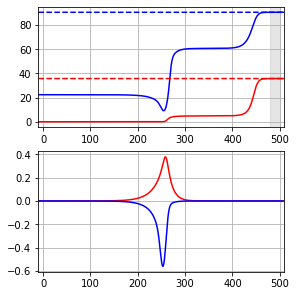

-------  21 0.47500000000000014 0.4750000000000002
-------  22 0.5000000000000002 0.4750000000000002
-------  23 0.5250000000000001 0.4750000000000002
-------  24 0.4000000000000001 0.5000000000000002
-------  25 0.4250000000000001 0.5000000000000002
-------  26 0.4500000000000001 0.5000000000000002
-------  27 0.47500000000000014 0.5000000000000002
-------  28 0.5000000000000002 0.5000000000000002
-------  29 0.5250000000000001 0.5000000000000002
-------  30 0.4250000000000001 0.5250000000000002
-------  31 0.4500000000000001 0.5250000000000002
-------  32 0.47500000000000014 0.5250000000000002
-------  33 0.5000000000000002 0.5250000000000002
-------  34 0.5250000000000001 0.5250000000000002
-------  35 0.5500000000000003 0.5250000000000002
-------  36 0.4250000000000001 0.5500000000000003
-------  37 0.4500000000000001 0.5500000000000003
-------  38 0.47500000000000014 0.5500000000000003
-------  39 0.5000000000000002 0.5500000000000003
-------  40 0.5250000000000001 0.5500000000000

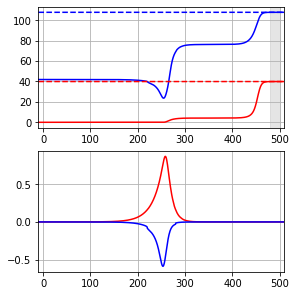

-------  51 0.5000000000000002 0.6000000000000003
-------  52 0.5250000000000001 0.6000000000000003
-------  53 0.5500000000000003 0.6000000000000003
-------  54 0.5750000000000002 0.6000000000000003
-------  55 0.4250000000000001 0.6250000000000003
-------  56 0.4500000000000001 0.6250000000000003
-------  57 0.47500000000000014 0.6250000000000003
-------  58 0.5000000000000002 0.6250000000000003
-------  59 0.5250000000000001 0.6250000000000003
-------  60 0.5500000000000003 0.6250000000000003
-------  61 0.5750000000000002 0.6250000000000003
-------  62 0.4250000000000001 0.6500000000000004
-------  63 0.4500000000000001 0.6500000000000004
-------  64 0.47500000000000014 0.6500000000000004
-------  65 0.5000000000000002 0.6500000000000004
-------  66 0.5250000000000001 0.6500000000000004
-------  67 0.5500000000000003 0.6500000000000004
-------  68 0.5750000000000002 0.6500000000000004
-------  69 0.4250000000000001 0.6750000000000004
-------  70 0.4500000000000001 0.675000000000000

In [16]:
for i in i_range:
    print("------- ", i, exc[i], inh[i])
    
    if i not in [20,50]:
        continue
    
    aln.params.duration = dur + dur_pre + dur_post

    time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[i][0]
    target_[:,1,:] = target[i][1]

    fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
    ax[1].plot(time_, bestControl_[i][0,0,:], color = 'red')
    ax[0].plot(time_, bestState_[i][0,0,:], color= 'red')
    ax[1].plot(time_, bestControl_[i][0,1,:], color = 'blue')
    ax[0].plot(time_, bestState_[i][0,1,:], color= 'blue')
    ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
    ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
    ax[0].set_xlim(-dur_pre,dur+dur_post)
    ax[1].set_xlim(-dur_pre,dur+dur_post)
    ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
    plt.show()